In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
import numpy as np

Mounted at /content/drive
/content/drive/MyDrive/TA


In [ ]:
import pandas as pd
df09_08 = pd.read_csv("/content/drive/MyDrive/TA/FFT RECTANGULAR DONE/chb09_08.csv")
df09_08

FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0      0.002803  0.001300  0.002995  0.000287  0.002749  0.003123  0.002046   
1      0.002631  0.000560  0.001479  0.000128  0.002892  0.001544  0.001083   
2      0.004366  0.001162  0.001424  0.000935  0.004842  0.001920  0.001851   
3      0.005186  0.001642  0.003375  0.001253  0.004958  0.002071  0.003029   
4      0.006555  0.002633  0.006533  0.004579  0.006062  0.003431  0.001989   
...         ...       ...       ...       ...       ...       ...       ...   
20219  0.000006  0.000031  0.000153  0.000026  0.000019  0.000055  0.000121   
20220  0.000024  0.000047  0.000144  0.000042  0.000039  0.000075  0.000114   
20221  0.000006  0.000031  0.000153  0.000026  0.000019  0.000055  0.000121   
20222  0.000024  0.000047  0.000144  0.000042  0.000039  0.000075  0.000114   
20223  0.000006  0.000031  0.000153  0.000026  0.000019  0.000055  0.000121   

          P3-O1    FP2-F4     F4-C4  ...     P8-O2     FZ-CZ     CZ-PZ  \
0      0.000802  0.001896  0.001805  ...  0.000406  0.000490  0.003963   
1      0.001931  0.000783  0.002026  ...  0.000290  0.004933  0.004754   
2      0.002023  0.007919  0.003275  ...  0.003054  0.005307  0.008747   
3      0.001639  0.006668  0.004180  ...  0.004524  0.008834  0.010366   
4      0.002174  0.016784  0.003874  ...  0.003854  0.008670  0.007579   
...         ...       ...       ...  ...       ...       ...       ...   
20219  0.000048  0.000016  0.000056  ...  0.000031  0.000057  0.000076   
20220  0.000059  0.000026  0.000053  ...  0.000041  0.000056  0.000072   
20221  0.000048  0.000015  0.000056  ...  0.000031  0.000057  0.000076   
20222  0.000059  0.000026  0.000053  ...  0.000041  0.000056  0.000072   
20223  0.000048  0.000015  0.000056  ...  0.000031  0.000057  0.000076   

          P7-T7    T7-FT9  FT9-FT10   FT10-T8   T8-P8-1       seizure  \
0      0.001695  0.000968  0.001141  0.000885  0.000941        kejang   
1      0.001479  0.000929  0.001491  0.001569  0.000808        kejang   
2      0.001424  0.000681  0.001926  0.002094  0.002784        kejang   
3      0.003375  0.002181  0.006048  0.005167  0.004246        kejang   
4      0.006533  0.004461  0.006174  0.005178  0.005483        kejang   
...         ...       ...       ...       ...       ...           ...   
20219  0.000153  0.000050  0.000010  0.000034  0.000022  tidak kejang   
20220  0.000144  0.000070  0.000050  0.000047  0.000010  tidak kejang   
20221  0.000153  0.000050  0.000009  0.000034  0.000022  tidak kejang   
20222  0.000144  0.000070  0.000050  0.000047  0.000010  tidak kejang   
20223  0.000154  0.000050  0.000009  0.000034  0.000022  tidak kejang   

        frekuensi  
0        0.000000  
1        0.012658  
2        0.025316  
3        0.037975  
4        0.050633  
...           ...  
20219  127.936709  
20220  127.949367  
20221  127.962025  
20222  127.974684  
20223  127.987342  

[20224 rows x 25 columns]

# GRID HANNING FFT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA


FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0        0.000782  0.000756  0.000241  0.000352  0.001678  0.000133  0.000238   
1        0.000791  0.000756  0.000256  0.000372  0.001686  0.000136  0.000259   
2        0.000760  0.000750  0.000265  0.000373  0.001661  0.000128  0.000266   
3        0.000754  0.000751  0.000249  0.000359  0.001648  0.000135  0.000253   
4        0.000824  0.000777  0.000249  0.000375  0.001711  0.000161  0.000258   
...           ...       ...       ...       ...       ...       ...       ...   
2807035  0.000063  0.000082  0.000014  0.000007  0.000010  0.000399  0.000453   
2807036  0.000037  0.000011  0.000019  0.000031  0.000060  0.000715  0.000737   
2807037  0.000063  0.000082  0.000014  0.000007  0.000010  0.000399  0.000453   
2807038  0.000037  0.000011  0.000019  0.000031  0.000060  0.000715  0.000737   
2807039  0.000063  0.000082  0.000014  0.000007  0.000010  0.000399  0.000453   

            P3-O1    FP2-F4     F4-C4  ...     P8-O2     FZ-CZ     CZ-PZ  \
0        0.000647  0.000334  0.000693  ...  0.000513  0.000014  0.000870   
1        0.000664  0.000329  0.000707  ...  0.000453  0.000036  0.000879   
2        0.000673  0.000347  0.000718  ...  0.000546  0.000069  0.000896   
3        0.000658  0.000355  0.000700  ...  0.000563  0.000076  0.000868   
4        0.000670  0.000341  0.000692  ...  0.000456  0.000113  0.000884   
...           ...       ...       ...  ...       ...       ...       ...   
2807035  0.000045  0.000031  0.000017  ...  0.000052  0.000040  0.000007   
2807036  0.000048  0.000102  0.000025  ...  0.000032  0.000036  0.000002   
2807037  0.000045  0.000031  0.000017  ...  0.000052  0.000040  0.000007   
2807038  0.000048  0.000102  0.000025  ...  0.000032  0.000036  0.000002   
2807039  0.000045  0.000031  0.000017  ...  0.000052  0.000040  0.000007   

            P7-T7    T7-FT9  FT9-FT10       FT10-T8   T8-P8-1       seizure  \
0        0.000256  0.000245  0.000865  6.405581e-04  0.000043        kejang   
1        0.000256  0.000259  0.000898  6.308364e-04  0.000033        kejang   
2        0.000265  0.000256  0.000885  6.329942e-04  0.000025        kejang   
3        0.000249  0.000238  0.000848  6.962496e-04  0.000044        kejang   
4        0.000249  0.000260  0.000880  6.893149e-04  0.000046        kejang   
...           ...       ...       ...           ...       ...           ...   
2807035  0.000014  0.000107  0.000013  5.398507e-05  0.000054  tidak kejang   
2807036  0.000019  0.000047  0.000055  6.291731e-07  0.000036  tidak kejang   
2807037  0.000014  0.000107  0.000013  5.398505e-05  0.000054  tidak kejang   
2807038  0.000019  0.000047  0.000055  6.291713e-07  0.000036  tidak kejang   
2807039  0.000014  0.000107  0.000013  5.398504e-05  0.000054  tidak kejang   

          frekuensi  
0          0.000000  
1          0.025000  
2          0.050000  
3          0.075000  
4          0.100000  
...             ...  
2807035  127.926471  
2807036  127.941176  
2807037  127.955882  
2807038  127.970588  
2807039  127.985294  

[2807040 rows x 25 columns]

In [ ]:

# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']


In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 4]
}

# Grid Search CV dengan cv=5
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
# ========================
best_model = RandomForestClassifier(**best_params, random_state=42)

# Latih ulang model di data training
best_model.fit(X_train, y_train)


In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import classification_report

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ====================
# Confusion Matrix - Data Latih
# ====================
import seaborn as sns
cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================
import seaborn as sns
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

In [ ]:
# Membaca file CSV (ganti 'nama_file.csv' dengan nama file Anda)
df = pd.read_csv('/content/drive/MyDrive/TA/FILTERING RECTANGULAR DONE/chb09_08.csv')
df

#SAMPEL TIDAK DI FILTERING (chb05_22)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

# Import data filtering
df = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb09_08.csv")

# Memisahkan data berdasarkan label
TA1 = df[df['seizure'] == 'kejang']
TA2 = df[df['seizure'] == 'tidak kejang']

# Menampilkan jumlah data di masing-masing kategori
print("Jumlah data kejang:", len(TA1))
print("Jumlah data tidak kejang:", len(TA2))

# Menyimpan data ke file CSV
TA1.to_csv("/content/drive/MyDrive/TA/KEJANG chb09_08.csv", index=False)
TA2.to_csv("/content/drive/MyDrive/TA/NO KEJANG chb09_08.csv", index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA
Jumlah data kejang: 20224
Jumlah data tidak kejang: 20224


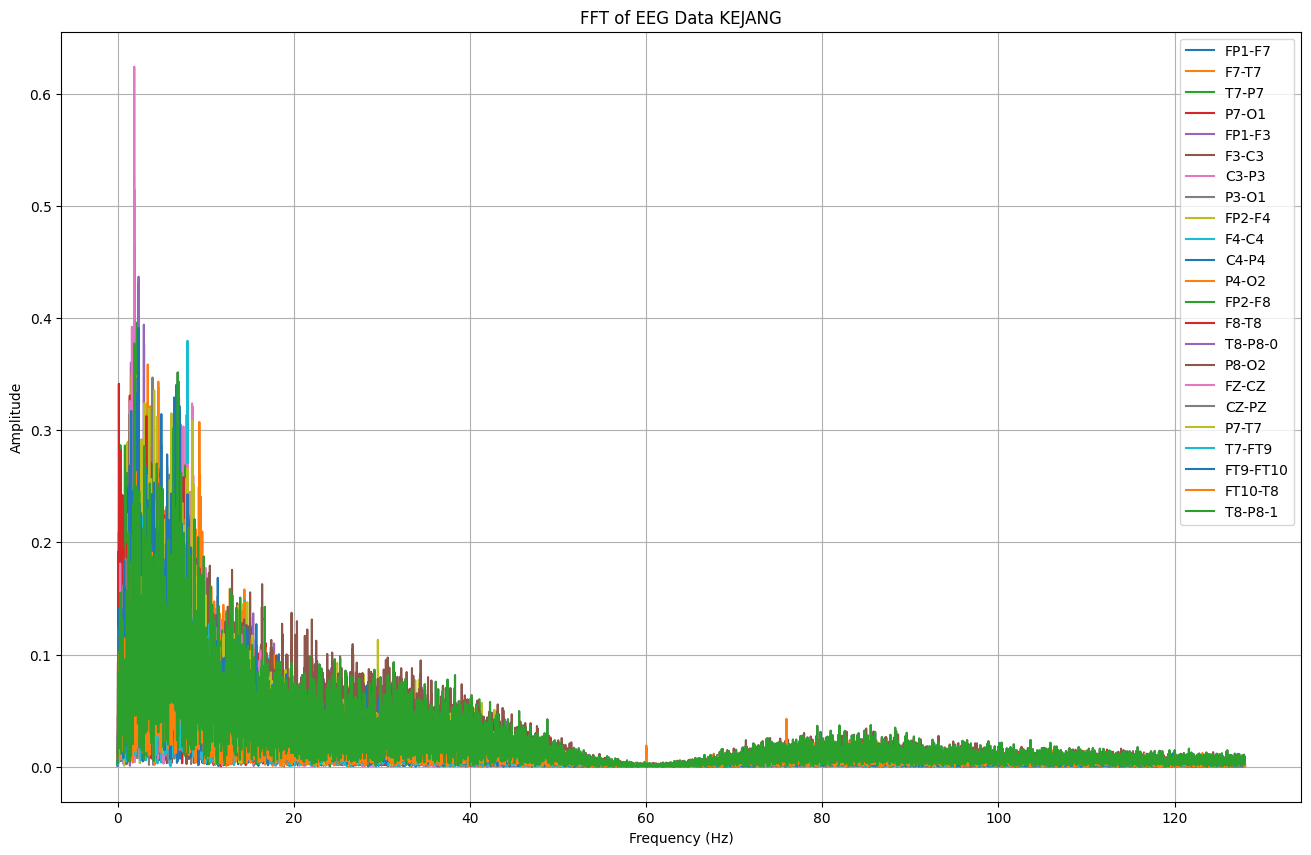

Data setelah FFT berhasil disimpan dalam file CSV:          FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0      0.017610  0.005360  0.000965  0.001888  0.013924  0.001661  0.001111   
1      0.016514  0.004205  0.008767  0.003319  0.014825  0.008338  0.005457   
2      0.027023  0.004656  0.008653  0.007831  0.026672  0.006101  0.006938   
3      0.032155  0.009111  0.012987  0.004081  0.027586  0.005233  0.007344   
4      0.040446  0.018551  0.023961  0.028418  0.034374  0.009562  0.000915   
...         ...       ...       ...       ...       ...       ...       ...   
10107  0.001280  0.001608  0.002907  0.002259  0.000562  0.001549  0.000759   
10108  0.003803  0.001780  0.002611  0.000610  0.000874  0.001203  0.001447   
10109  0.001018  0.002320  0.004266  0.002062  0.000762  0.002870  0.001052   
10110  0.004022  0.005953  0.003638  0.000977  0.002101  0.001910  0.001422   
10111  0.002245  0.003820  0.000648  0.001041  0.001836  0.001984  0.000708   



In [ ]:
TA1 = pd.read_csv("/content/drive/MyDrive/TA/KEJANG chb09_08.csv")

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
sampling_rate = 256

# Step 10: Hitung FFT data EEG -> Simpan hasil ke CSV
# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = []
for channel in channels:
    if channel in TA1.columns:
        signal = TA1[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals)

# Mengubah fitur FFT menjadi DataFrame
TA_1 = pd.DataFrame(fft_features).T
TA_1.columns = channels
TA_1['seizure'] = TA1['seizure']
TA_1['frekuensi'] = fft_freqs  # Masukkan frekuensi sebagai kolom pertama


# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in TA_1.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(TA1[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data KEJANG')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data KEJANG setelah FFT ke file CSV
TA_1.to_csv("/content/drive/MyDrive/TA/KEJANG chb09_08.csv", index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {TA_1}")

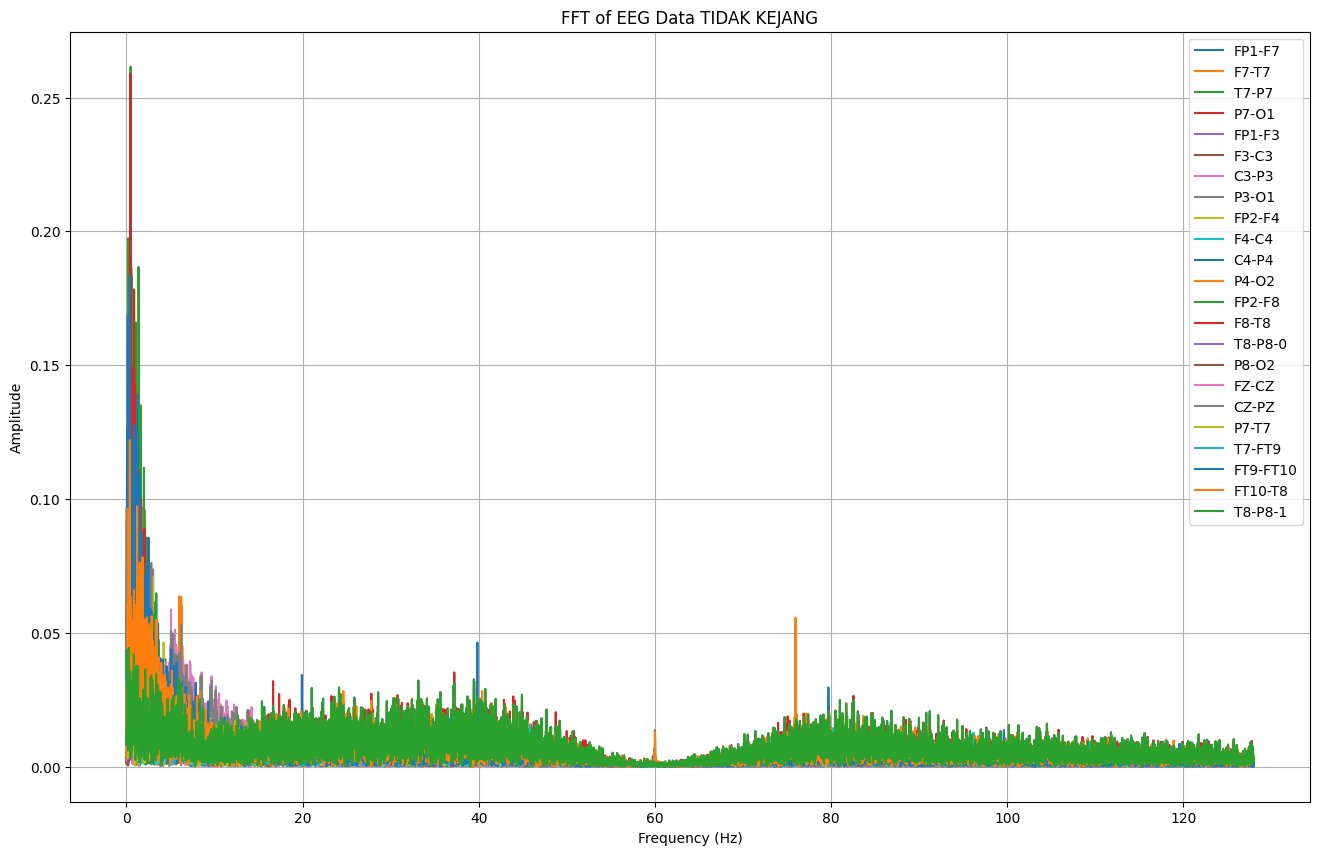

Data setelah FFT berhasil disimpan dalam file CSV:          FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0      0.012134  0.004645  0.019786  0.010321  0.023924  0.002412  0.003046   
1      0.018996  0.020969  0.022023  0.008195  0.024140  0.013797  0.004131   
2      0.038537  0.027626  0.025201  0.001002  0.040735  0.025446  0.008785   
3      0.054393  0.020350  0.018374  0.004024  0.059697  0.035799  0.008092   
4      0.049881  0.027408  0.006731  0.008640  0.064255  0.038015  0.006466   
...         ...       ...       ...       ...       ...       ...       ...   
10107  0.001183  0.001568  0.001301  0.000908  0.000817  0.000924  0.000621   
10108  0.001471  0.002670  0.003081  0.001587  0.000203  0.001538  0.000211   
10109  0.000544  0.002893  0.002195  0.000948  0.000268  0.000707  0.000835   
10110  0.000890  0.003480  0.003723  0.000278  0.000518  0.000526  0.000060   
10111  0.001236  0.002161  0.001593  0.001067  0.000298  0.000782  0.001046   



In [ ]:
TA2 = pd.read_csv("/content/drive/MyDrive/TA/NO KEJANG chb09_08.csv")

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
sampling_rate = 256

# Step 10: Hitung FFT data EEG -> Simpan hasil ke CSV
# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = []
for channel in channels:
    if channel in TA2.columns:
        signal = TA2[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals)

# Mengubah fitur FFT menjadi DataFrame
TA_2 = pd.DataFrame(fft_features).T
TA_2.columns = channels
TA_2['seizure'] = TA2['seizure']
TA_2['frekuensi'] = fft_freqs

# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in TA_2.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(TA2[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data TIDAK KEJANG')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data TIDAK KEJANG setelah FFT ke file CSV
TA_2.to_csv("/content/drive/MyDrive/TA/NO KEJANG chb09_08.csv", index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {TA_2}")


Data berhasil digabung dan disimpan sebagai df_gabungan.csv!
Jumlah data seizure dan tidak seizure:
seizure
kejang          10112
tidak kejang    10112
Name: count, dtype: int64


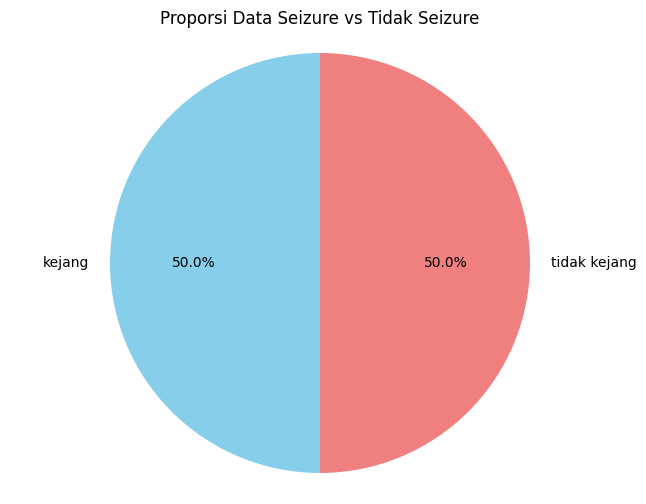

In [ ]:
# Menggabungkan data KEJANG & TIDAK KEJANG
TA_gabungan = pd.concat([TA_1, TA_2], ignore_index=True)

# Menyimpan kembali data gabungan ke file CSV
TA_gabungan.to_csv("/content/drive/MyDrive/TA/FFT chb09_08.csv", index=False)

print("Data berhasil digabung dan disimpan sebagai df_gabungan.csv!")

# Menghitung jumlah masing-masing label (seizure dan tidak seizure)
seizure_counts = TA_gabungan['seizure'].value_counts()

# Menampilkan jumlah data seizure dan tidak seizure
print("Jumlah data seizure dan tidak seizure:")
print(seizure_counts)

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(seizure_counts, labels=seizure_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proporsi Data Seizure vs Tidak Seizure')
plt.axis('equal')  # Menjaga proporsi lingkaran tetap
plt.show()

# MEAN BERDASARKAN DETIK

In [ ]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv('/content/drive/MyDrive/TA/FILTERING RECTANGULAR DONE/chb09_08.csv')

# Konversi kolom 'Time' ke integer (detik penuh)
df['second'] = df['Time'].astype(int)

# Hitung rata-rata 'FP1-F7' per detik
mean_per_second = df.groupby('second')['FP1-F7'].mean().reset_index()

# Tampilkan hasil
print(mean_per_second)

# Jika ingin menyimpan ke file CSV:
# mean_per_second.to_csv('mean_FP1-F7_per_second.csv', index=False)


     second        FP1-F7
0      2912 -1.328731e-06
1      2913 -5.770015e-07
2      2914  2.791449e-07
3      2915  2.167782e-06
4      2916 -1.170848e-07
..      ...           ...
153    3065 -4.149944e-06
154    3066 -7.081137e-06
155    3067  1.750508e-06
156    3068  4.603144e-06
157    3069  5.704877e-07

[158 rows x 2 columns]


In [ ]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HAMMING DONE/chb09_08.csv')

# Konversi kolom 'Time' ke integer (detik penuh)
df['second'] = df['Time'].astype(int)

# Hitung rata-rata 'FP1-F7' per detik
mean_per_second = df.groupby('second')['FP1-F7'].mean().reset_index()

# Tampilkan hasil
print(mean_per_second)

# Jika ingin menyimpan ke file CSV:
# mean_per_second.to_csv('mean_FP1-F7_per_second.csv', index=False)


     second        FP1-F7
0      2912  3.882637e-08
1      2913  7.063787e-07
2      2914 -5.790374e-07
3      2915 -1.363420e-06
4      2916 -4.971494e-07
..      ...           ...
153    3065 -1.601502e-06
154    3066  8.120493e-07
155    3067 -5.080678e-07
156    3068 -1.090003e-06
157    3069  4.731222e-07

[158 rows x 2 columns]


In [ ]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HANNING DONE/chb09_08.csv')

# Konversi kolom 'Time' ke integer (detik penuh)
df['second'] = df['Time'].astype(int)

# Hitung rata-rata 'FP1-F7' per detik
mean_per_second = df.groupby('second')['FP1-F7'].mean().reset_index()

# Tampilkan hasil
print(mean_per_second)

# Jika ingin menyimpan ke file CSV:
# mean_per_second.to_csv('mean_FP1-F7_per_second.csv', index=False)


     second        FP1-F7
0      2912 -3.780524e-08
1      2913 -7.018619e-07
2      2914 -3.836691e-07
3      2915  1.543950e-06
4      2916 -1.899056e-06
..      ...           ...
153    3065 -1.262620e-06
154    3066  1.327351e-06
155    3067 -1.565951e-06
156    3068  5.851990e-07
157    3069  1.895085e-06

[158 rows x 2 columns]


In [ ]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv('/content/drive/MyDrive/TA/FILTERING BLACKMAN DONE/chb09_08.csv')

# Konversi kolom 'Time' ke integer (detik penuh)
df['second'] = df['Time'].astype(int)

# Hitung rata-rata 'FP1-F7' per detik
mean_per_second = df.groupby('second')['FP1-F7'].mean().reset_index()

# Tampilkan hasil
print(mean_per_second)

# Jika ingin menyimpan ke file CSV:
# mean_per_second.to_csv('mean_FP1-F7_per_second.csv', index=False)


     second        FP1-F7
0      2912  4.687234e-09
1      2913  1.120985e-07
2      2914 -1.600442e-07
3      2915  9.092188e-07
4      2916 -1.571140e-06
..      ...           ...
153    3065  4.491744e-06
154    3066 -1.741820e-06
155    3067  9.370689e-07
156    3068  7.382726e-11
157    3069 -2.769441e-06

[158 rows x 2 columns]


# MAX BERDASARKAN DETIK

In [ ]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv('/content/drive/MyDrive/TA/FILTERING RECTANGULAR DONE/chb09_08.csv')

# Konversi kolom 'Time' ke integer (detik penuh)
df['second'] = df['Time'].astype(int)

# Hitung nilai maksimum 'FP1-F7' per detik
max_per_second = df.groupby('second')['FP1-F7'].max().reset_index()

# Tampilkan hasil
print(max_per_second)

# Jika ingin menyimpan ke file CSV:
# max_per_second.to_csv('max_FP1-F7_per_second.csv', index=False)


     second    FP1-F7
0      2912  0.000034
1      2913  0.000095
2      2914  0.000117
3      2915  0.000203
4      2916  0.000093
..      ...       ...
153    3065  0.000068
154    3066  0.000033
155    3067  0.000094
156    3068  0.000079
157    3069  0.000062

[158 rows x 2 columns]


In [ ]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HAMMING DONE/chb09_08.csv')

# Konversi kolom 'Time' ke integer (detik penuh)
df['second'] = df['Time'].astype(int)

# Hitung nilai maksimum 'FP1-F7' per detik
max_per_second = df.groupby('second')['FP1-F7'].max().reset_index()

# Tampilkan hasil
print(max_per_second)

# Jika ingin menyimpan ke file CSV:
# max_per_second.to_csv('max_FP1-F7_per_second.csv', index=False)


     second        FP1-F7
0      2912  1.900023e-07
1      2913  3.461297e-05
2      2914  9.438923e-05
3      2915  1.169091e-04
4      2916  1.981615e-04
..      ...           ...
153    3065  5.938593e-05
154    3066  7.248931e-05
155    3067  4.200110e-05
156    3068  9.200443e-05
157    3069  4.742161e-05

[158 rows x 2 columns]


In [ ]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HANNING DONE/chb09_08.csv')

# Konversi kolom 'Time' ke integer (detik penuh)
df['second'] = df['Time'].astype(int)

# Hitung nilai maksimum 'FP1-F7' per detik
max_per_second = df.groupby('second')['FP1-F7'].max().reset_index()

# Tampilkan hasil
print(max_per_second)

# Jika ingin menyimpan ke file CSV:
# max_per_second.to_csv('max_FP1-F7_per_second.csv', index=False)


     second        FP1-F7
0      2912  8.110999e-08
1      2913  3.360354e-05
2      2914  9.392409e-05
3      2915  1.237531e-04
4      2916  1.967670e-04
..      ...           ...
153    3065  6.011433e-05
154    3066  7.246113e-05
155    3067  3.601517e-05
156    3068  8.681488e-05
157    3069  7.210737e-05

[158 rows x 2 columns]


In [ ]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv('/content/drive/MyDrive/TA/FILTERING BLACKMAN DONE/chb09_08.csv')

# Konversi kolom 'Time' ke integer (detik penuh)
df['second'] = df['Time'].astype(int)

# Hitung nilai maksimum 'FP1-F7' per detik
max_per_second = df.groupby('second')['FP1-F7'].max().reset_index()

# Tampilkan hasil
print(max_per_second)

# Jika ingin menyimpan ke file CSV:
# max_per_second.to_csv('max_FP1-F7_per_second.csv', index=False)


     second        FP1-F7
0      2912  1.632331e-08
1      2913  4.836024e-07
2      2914  2.513296e-05
3      2915  9.326614e-05
4      2916  1.248358e-04
..      ...           ...
153    3065  6.815097e-05
154    3066  5.643974e-05
155    3067  7.266233e-05
156    3068  4.392250e-05
157    3069  8.522876e-05

[158 rows x 2 columns]


# statistik filtering

In [ ]:
import pandas as pd
import numpy as np

# Baca file CSV
rectangular = pd.read_csv('/content/drive/MyDrive/TA/LABEL/chb09_08.csv')

# Pisahkan kolom numerik EEG saja (tanpa 'Time' dan 'seizure')
eeg_columns = rectangular.drop(columns=["Time", "seizure"]).columns
eeg_data = rectangular[eeg_columns]

# Hitung statistik per channel
mean_values = eeg_data.mean()
max_values = eeg_data.max()
min_values = eeg_data.min()
std_values = eeg_data.std()
energy_values = (eeg_data ** 2).sum()  # Energi per channel = jumlah kuadrat nilai-nilai

# Gabungkan semua hasil dalam satu DataFrame
stats_rectangular = pd.DataFrame({
    "Mean": mean_values,
    "Max": max_values,
    "Min": min_values,
    "Std": std_values,
    "Energy": energy_values
})

# Tampilkan statistik per channel
print("Statistik per Channel:")
print(stats_rectangular)

print("\nStatistik Global:")

# Hitung statistik global (semua channel digabung)
all_values = eeg_data.values.flatten()
mean_all = all_values.mean()
max_all = all_values.max()
min_all = all_values.min()
std_all = all_values.std()
energy_all = np.sum(all_values ** 2)

# Tampilkan hasil global
print("Mean:", mean_all)
print("Max :", max_all)
print("Min :", min_all)
print("Std :", std_all)
print("Energy:", energy_all)

print("\nStatistik Channel FP1-F7:")

# Hitung statistik hanya untuk channel FP1-F7
fp1_f7 = rectangular["FP1-F7"]
mean_fp1_f7 = fp1_f7.mean()
max_fp1_f7 = fp1_f7.max()
min_fp1_f7 = fp1_f7.min()
std_fp1_f7 = fp1_f7.std()
energy_fp1_f7 = np.sum(fp1_f7 ** 2)

# Tampilkan hasil channel FP1-F7
print("Mean   :", mean_fp1_f7)
print("Max    :", max_fp1_f7)
print("Min    :", min_fp1_f7)
print("Std    :", std_fp1_f7)
print("Energy :", energy_fp1_f7)


Statistik per Channel:
                  Mean       Max       Min       Std    Energy
FP1-F7    7.353538e-07  0.001360 -0.000956  0.000179  0.001299
F7-T7     1.766781e-08  0.001253 -0.001050  0.000178  0.001288
T7-P7     5.130137e-07  0.001237 -0.001123  0.000200  0.001616
P7-O1     2.084976e-07  0.001086 -0.000918  0.000145  0.000850
FP1-F3    9.357371e-07  0.001384 -0.001284  0.000211  0.001801
F3-C3     1.006746e-07  0.000999 -0.001088  0.000183  0.001355
C3-P3     1.027708e-07  0.001128 -0.000897  0.000163  0.001079
P3-O1     3.321046e-07  0.001007 -0.000943  0.000168  0.001136
FP2-F4    6.438366e-07  0.001407 -0.001158  0.000211  0.001803
F4-C4    -3.450488e-07  0.001626 -0.001191  0.000187  0.001420
C4-P4     6.946956e-07  0.000729 -0.000848  0.000128  0.000663
P4-O2     3.634990e-07  0.001146 -0.001088  0.000193  0.001512
FP2-F8    4.120686e-07  0.001292 -0.001186  0.000215  0.001868
F8-T8     5.831633e-07  0.001454 -0.001213  0.000211  0.001805
T8-P8-0   3.990955e-07  0.001184

In [ ]:
import pandas as pd
import numpy as np

# Baca file CSV
rectangular = pd.read_csv('/content/drive/MyDrive/TA/FILTERING RECTANGULAR DONE/chb09_08.csv')

# Pisahkan kolom numerik EEG saja (tanpa 'Time' dan 'seizure')
eeg_columns = rectangular.drop(columns=["Time", "seizure"]).columns
eeg_data = rectangular[eeg_columns]

# Hitung statistik per channel
mean_values = eeg_data.mean()
max_values = eeg_data.max()
min_values = eeg_data.min()
std_values = eeg_data.std()
energy_values = (eeg_data ** 2).sum()  # Energi per channel = jumlah kuadrat nilai-nilai

# Gabungkan semua hasil dalam satu DataFrame
stats_rectangular = pd.DataFrame({
    "Mean": mean_values,
    "Max": max_values,
    "Min": min_values,
    "Std": std_values,
    "Energy": energy_values
})

# Tampilkan statistik per channel
print("Statistik per Channel:")
print(stats_rectangular)

print("\nStatistik Global:")

# Hitung statistik global (semua channel digabung)
all_values = eeg_data.values.flatten()
mean_all = all_values.mean()
max_all = all_values.max()
min_all = all_values.min()
std_all = all_values.std()
energy_all = np.sum(all_values ** 2)

# Tampilkan hasil global
print("Mean:", mean_all)
print("Max :", max_all)
print("Min :", min_all)
print("Std :", std_all)
print("Energy:", energy_all)

print("\nStatistik Channel FP1-F7:")

# Hitung statistik hanya untuk channel FP1-F7
fp1_f7 = rectangular["FP1-F7"]
mean_fp1_f7 = fp1_f7.mean()
max_fp1_f7 = fp1_f7.max()
min_fp1_f7 = fp1_f7.min()
std_fp1_f7 = fp1_f7.std()
energy_fp1_f7 = np.sum(fp1_f7 ** 2)

# Tampilkan hasil channel FP1-F7
print("Mean   :", mean_fp1_f7)
print("Max    :", max_fp1_f7)
print("Min    :", min_fp1_f7)
print("Std    :", std_fp1_f7)
print("Energy :", energy_fp1_f7)


Statistik per Channel:
                  Mean       Max       Min       Std    Energy
FP1-F7   -1.243525e-07  0.001346 -0.001048  0.000173  0.001211
F7-T7    -3.658418e-10  0.001169 -0.001044  0.000176  0.001258
T7-P7    -7.928751e-08  0.001200 -0.001134  0.000199  0.001600
P7-O1    -3.838454e-08  0.000986 -0.000924  0.000143  0.000828
FP1-F3   -1.605038e-07  0.001289 -0.001214  0.000206  0.001718
F3-C3    -1.143323e-08  0.001003 -0.001094  0.000183  0.001355
C3-P3    -1.619124e-08  0.001176 -0.000956  0.000163  0.001079
P3-O1    -5.366951e-08  0.001005 -0.000966  0.000165  0.001104
FP2-F4   -9.036895e-08  0.001491 -0.001243  0.000204  0.001679
F4-C4     5.716663e-08  0.001624 -0.001211  0.000185  0.001392
C4-P4    -1.140101e-07  0.000713 -0.000923  0.000124  0.000623
P4-O2    -6.469586e-08  0.001162 -0.001123  0.000190  0.001466
FP2-F8   -1.128805e-08  0.001318 -0.001055  0.000200  0.001617
F8-T8    -1.440478e-07  0.001439 -0.000949  0.000194  0.001521
T8-P8-0  -6.147872e-08  0.001171

In [ ]:
import pandas as pd
import numpy as np

# Baca file CSV
hamming = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HAMMING DONE/chb09_08.csv')

# Pisahkan kolom numerik EEG saja (tanpa 'Time' dan 'seizure')
eeg_columns = hamming.drop(columns=["Time", "seizure"]).columns
eeg_data = hamming[eeg_columns]

# Hitung statistik per channel
mean_values = eeg_data.mean()
max_values = eeg_data.max()
min_values = eeg_data.min()
std_values = eeg_data.std()
energy_values = (eeg_data ** 2).sum()  # Energi per channel = jumlah kuadrat nilai-nilai

# Gabungkan semua hasil dalam satu DataFrame
stats_hamming = pd.DataFrame({
    "Mean": mean_values,
    "Max": max_values,
    "Min": min_values,
    "Std": std_values,
    "Energy": energy_values
})

# Tampilkan statistik per channel
print("Statistik per Channel:")
print(stats_hamming)

print("\nStatistik Global:")

# Hitung statistik global (semua channel digabung)
all_values = eeg_data.values.flatten()
mean_all = all_values.mean()
max_all = all_values.max()
min_all = all_values.min()
std_all = all_values.std()
energy_all = np.sum(all_values ** 2)

# Tampilkan hasil global
print("Mean:", mean_all)
print("Max :", max_all)
print("Min :", min_all)
print("Std :", std_all)
print("Energy:", energy_all)

print("\nStatistik Channel FP1-F7:")

# Hitung statistik hanya untuk channel FP1-F7
fp1_f7 = hamming["FP1-F7"]
mean_fp1_f7 = fp1_f7.mean()
max_fp1_f7 = fp1_f7.max()
min_fp1_f7 = fp1_f7.min()
std_fp1_f7 = fp1_f7.std()
energy_fp1_f7 = np.sum(fp1_f7 ** 2)

# Tampilkan hasil channel FP1-F7
print("Mean   :", mean_fp1_f7)
print("Max    :", max_fp1_f7)
print("Min    :", min_fp1_f7)
print("Std    :", std_fp1_f7)
print("Energy :", energy_fp1_f7)


Statistik per Channel:
                  Mean       Max       Min       Std    Energy
FP1-F7   -2.338288e-09  0.001307 -0.001026  0.000171  0.001184
F7-T7    -2.929551e-09  0.001161 -0.001038  0.000175  0.001234
T7-P7     3.882577e-09  0.001185 -0.001117  0.000196  0.001561
P7-O1    -1.880927e-09  0.000971 -0.000912  0.000142  0.000814
FP1-F3    1.611862e-09  0.001284 -0.001197  0.000204  0.001686
F3-C3    -9.658191e-11  0.000998 -0.001086  0.000181  0.001319
C3-P3    -5.349157e-09  0.001159 -0.000947  0.000162  0.001055
P3-O1     7.883481e-10  0.000999 -0.000951  0.000164  0.001088
FP2-F4   -3.515717e-10  0.001488 -0.001256  0.000202  0.001646
F4-C4    -4.629515e-10  0.001612 -0.001195  0.000183  0.001361
C4-P4    -5.150128e-09  0.000719 -0.000948  0.000123  0.000613
P4-O2     3.474281e-09  0.001139 -0.001113  0.000189  0.001439
FP2-F8    5.863820e-10  0.001309 -0.001021  0.000197  0.001578
F8-T8     2.992185e-09  0.001413 -0.000926  0.000192  0.001490
T8-P8-0  -6.685759e-09  0.001164

In [ ]:
import pandas as pd
import numpy as np

# Baca file CSV
hanning = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HANNING DONE/chb09_08.csv')

# Pisahkan kolom numerik EEG saja (tanpa 'Time' dan 'seizure')
eeg_columns = hanning.drop(columns=["Time", "seizure"]).columns
eeg_data = hanning[eeg_columns]

# Hitung statistik per channel
mean_values = eeg_data.mean()
max_values = eeg_data.max()
min_values = eeg_data.min()
std_values = eeg_data.std()
energy_values = (eeg_data ** 2).sum()  # Energi per channel = jumlah kuadrat nilai-nilai

# Gabungkan semua hasil dalam satu DataFrame
stats_hanning = pd.DataFrame({
    "Mean": mean_values,
    "Max": max_values,
    "Min": min_values,
    "Std": std_values,
    "Energy": energy_values
})

# Tampilkan statistik per channel
print("Statistik per Channel:")
print(stats_hanning)

print("\nStatistik Global:")

# Hitung statistik global (semua channel digabung)
all_values = eeg_data.values.flatten()
mean_all = all_values.mean()
max_all = all_values.max()
min_all = all_values.min()
std_all = all_values.std()
energy_all = np.sum(all_values ** 2)

# Tampilkan hasil global
print("Mean:", mean_all)
print("Max :", max_all)
print("Min :", min_all)
print("Std :", std_all)
print("Energy:", energy_all)

print("\nStatistik Channel FP1-F7:")

# Hitung statistik hanya untuk channel FP1-F7
fp1_f7 = hanning["FP1-F7"]
mean_fp1_f7 = fp1_f7.mean()
max_fp1_f7 = fp1_f7.max()
min_fp1_f7 = fp1_f7.min()
std_fp1_f7 = fp1_f7.std()
energy_fp1_f7 = np.sum(fp1_f7 ** 2)

# Tampilkan hasil channel FP1-F7
print("Mean   :", mean_fp1_f7)
print("Max    :", max_fp1_f7)
print("Min    :", min_fp1_f7)
print("Std    :", std_fp1_f7)
print("Energy :", energy_fp1_f7)


Statistik per Channel:
                  Mean       Max       Min       Std    Energy
FP1-F7    1.539894e-08  0.001312 -0.000989  0.000171  0.001182
F7-T7    -6.631902e-09  0.001183 -0.001036  0.000175  0.001233
T7-P7     3.281148e-09  0.001188 -0.001126  0.000196  0.001561
P7-O1     9.197267e-09  0.000989 -0.000915  0.000142  0.000813
FP1-F3    1.042717e-08  0.001310 -0.001201  0.000204  0.001684
F3-C3     5.788446e-09  0.000995 -0.001088  0.000180  0.001317
C3-P3     8.163717e-09  0.001146 -0.000940  0.000161  0.001055
P3-O1    -3.157529e-09  0.000995 -0.000952  0.000164  0.001087
FP2-F4    1.153722e-08  0.001467 -0.001236  0.000202  0.001643
F4-C4     8.789144e-10  0.001607 -0.001181  0.000183  0.001359
C4-P4     1.152270e-08  0.000722 -0.000941  0.000123  0.000612
P4-O2    -7.397763e-09  0.001167 -0.001106  0.000189  0.001439
FP2-F8    1.292548e-08  0.001324 -0.001031  0.000197  0.001575
F8-T8     4.251529e-09  0.001401 -0.000927  0.000192  0.001488
T8-P8-0  -1.131160e-09  0.001166

In [ ]:
import pandas as pd
import numpy as np

# Baca file CSV
blackman = pd.read_csv('/content/drive/MyDrive/TA/FILTERING BLACKMAN DONE/chb09_08.csv')

# Pisahkan kolom numerik EEG saja (tanpa 'Time' dan 'seizure')
eeg_columns = blackman.drop(columns=["Time", "seizure"]).columns
eeg_data = blackman[eeg_columns]

# Hitung statistik per channel
mean_values = eeg_data.mean()
max_values = eeg_data.max()
min_values = eeg_data.min()
std_values = eeg_data.std()
energy_values = (eeg_data ** 2).sum()  # Energi per channel = jumlah kuadrat nilai-nilai

# Gabungkan semua hasil dalam satu DataFrame
stats_blackman = pd.DataFrame({
    "Mean": mean_values,
    "Max": max_values,
    "Min": min_values,
    "Std": std_values,
    "Energy": energy_values
})

# Tampilkan statistik per channel
print("Statistik per Channel:")
print(stats_blackman)

print("\nStatistik Global:")

# Hitung statistik global (semua channel digabung)
all_values = eeg_data.values.flatten()
mean_all = all_values.mean()
max_all = all_values.max()
min_all = all_values.min()
std_all = all_values.std()
energy_all = np.sum(all_values ** 2)

# Tampilkan hasil global
print("Mean:", mean_all)
print("Max :", max_all)
print("Min :", min_all)
print("Std :", std_all)
print("Energy:", energy_all)

print("\nStatistik Channel FP1-F7:")

# Hitung statistik hanya untuk channel FP1-F7
fp1_f7 = blackman["FP1-F7"]
mean_fp1_f7 = fp1_f7.mean()
max_fp1_f7 = fp1_f7.max()
min_fp1_f7 = fp1_f7.min()
std_fp1_f7 = fp1_f7.std()
energy_fp1_f7 = np.sum(fp1_f7 ** 2)

# Tampilkan hasil channel FP1-F7
print("Mean   :", mean_fp1_f7)
print("Max    :", max_fp1_f7)
print("Min    :", min_fp1_f7)
print("Std    :", std_fp1_f7)
print("Energy :", energy_fp1_f7)


Statistik per Channel:
                  Mean       Max       Min       Std    Energy
FP1-F7   -1.125480e-08  0.001305 -0.000986  0.000171  0.001189
F7-T7     2.599642e-09  0.001182 -0.001040  0.000175  0.001237
T7-P7     2.891616e-09  0.001192 -0.001124  0.000197  0.001563
P7-O1    -4.331665e-09  0.000991 -0.000914  0.000142  0.000816
FP1-F3   -5.099117e-09  0.001308 -0.001201  0.000204  0.001691
F3-C3    -5.261984e-09  0.000995 -0.001088  0.000181  0.001322
C3-P3    -1.178812e-08  0.001146 -0.000941  0.000162  0.001057
P3-O1     1.231848e-08  0.000997 -0.000951  0.000164  0.001091
FP2-F4   -1.201542e-08  0.001468 -0.001243  0.000202  0.001652
F4-C4    -5.017093e-10  0.001605 -0.001181  0.000184  0.001365
C4-P4     9.250433e-10  0.000722 -0.000958  0.000123  0.000615
P4-O2    -5.331169e-09  0.001166 -0.001108  0.000189  0.001442
FP2-F8    1.050794e-09  0.001325 -0.001020  0.000198  0.001584
F8-T8    -1.556264e-08  0.001396 -0.000926  0.000192  0.001496
T8-P8-0  -2.239151e-09  0.001163

# BERDASARKAN WINDOW

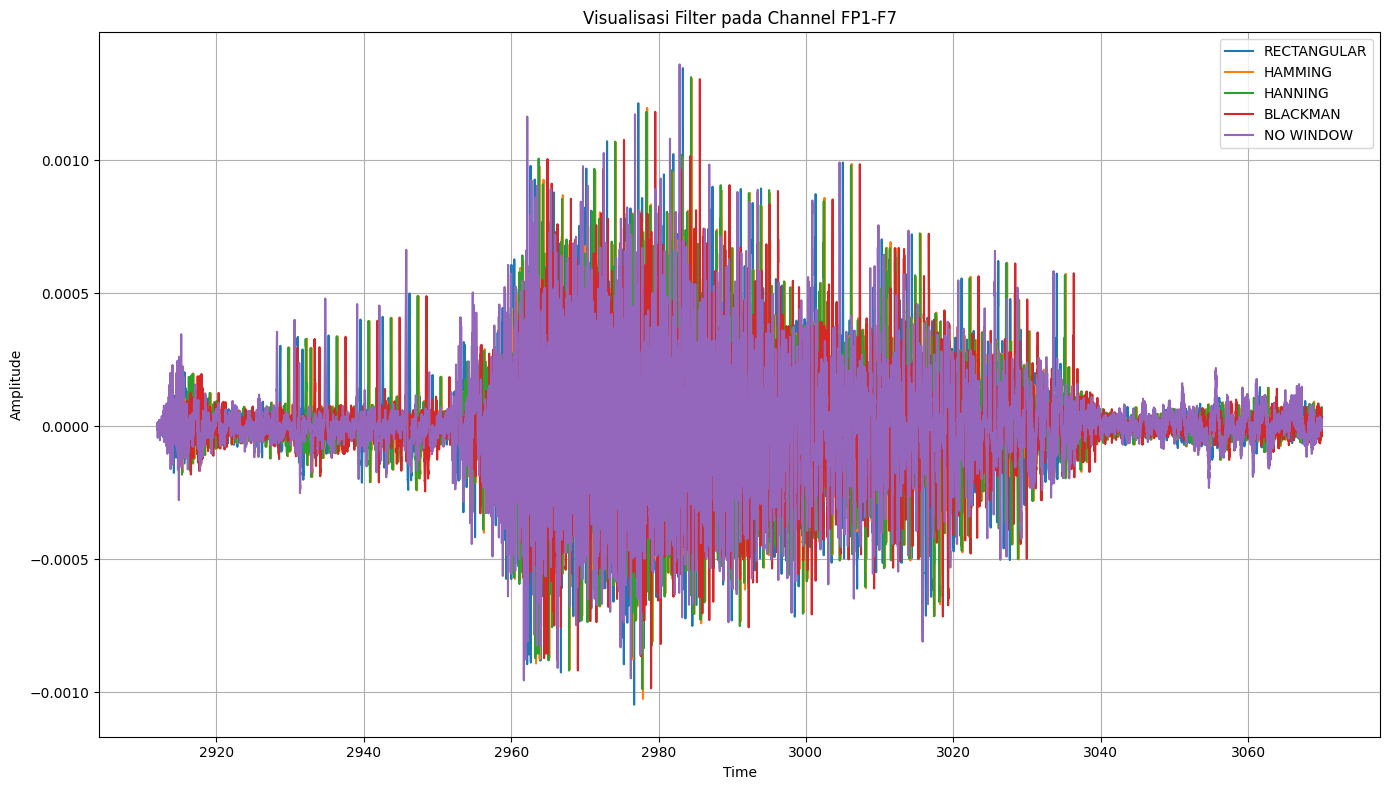

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV (ganti 'nama_file.csv' dengan nama file Anda)
# Membaca file Excel
df_rectangular = pd.read_csv('/content/drive/MyDrive/TA/FILTERING RECTANGULAR DONE/chb09_08.csv')
df_hamming = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HAMMING DONE/chb09_08.csv')
df_hanning = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HANNING DONE/chb09_08.csv')
df_blackman = pd.read_csv('/content/drive/MyDrive/TA/FILTERING BLACKMAN DONE/chb09_08.csv')
df_nofilter = pd.read_csv('/content/drive/MyDrive/TA/LABEL/chb09_08.csv')

plt.figure(figsize=(14, 8))

plt.plot(df_rectangular['Time'], df_rectangular['FP1-F7'], label='RECTANGULAR')
plt.plot(df_hamming['Time'], df_hamming['FP1-F7'], label='HAMMING')
plt.plot(df_hanning['Time'], df_hanning['FP1-F7'], label='HANNING')
plt.plot(df_blackman['Time'], df_blackman['FP1-F7'], label='BLACKMAN')
plt.plot(df_nofilter['Time'], df_nofilter['FP1-F7'], label='NO WINDOW')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Visualisasi Filter pada Channel FP1-F7')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

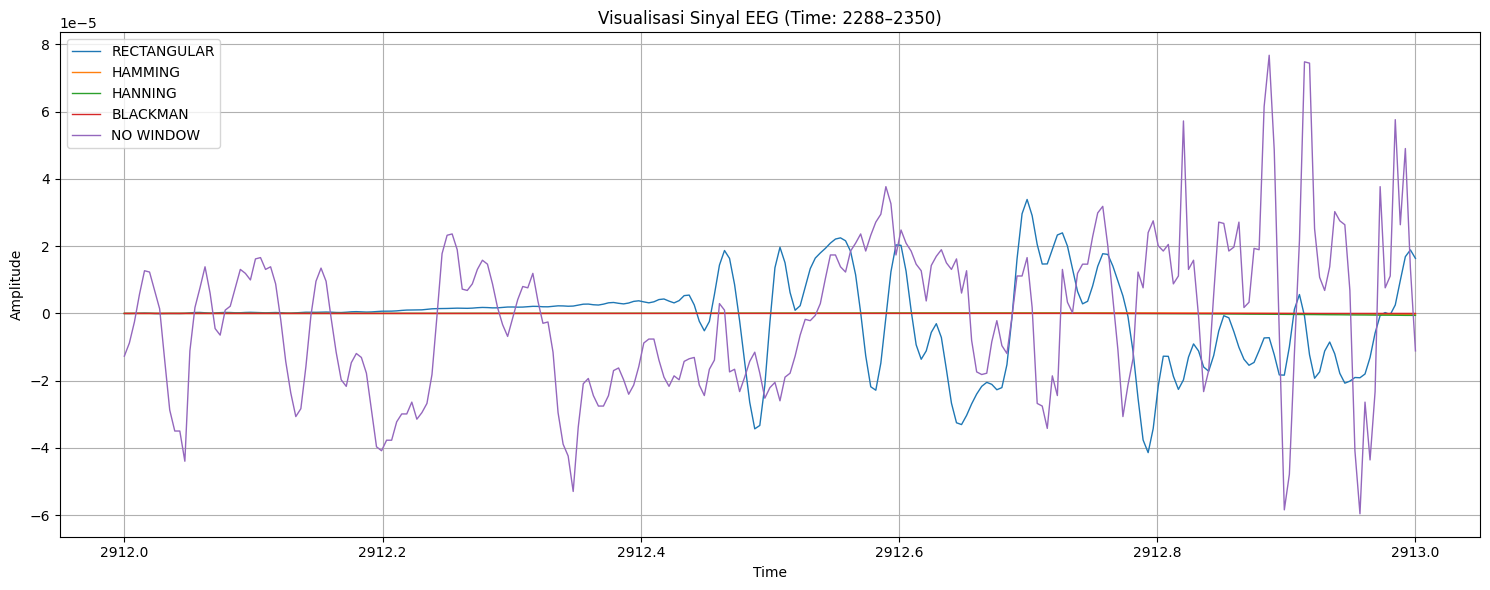

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df_rectangular = pd.read_csv('/content/drive/MyDrive/TA/FILTERING RECTANGULAR DONE/chb09_08.csv')
df_hamming = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HAMMING DONE/chb09_08.csv')
df_hanning = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HANNING DONE/chb09_08.csv')
df_blackman = pd.read_csv('/content/drive/MyDrive/TA/FILTERING BLACKMAN DONE/chb09_08.csv')
df_nofilter = pd.read_csv('/content/drive/MyDrive/TA/LABEL/chb09_08.csv')

# Pastikan kolom 'Time' bertipe numerik
df_rectangular['Time'] = pd.to_numeric(df_rectangular['Time'])
df_hamming['Time'] = pd.to_numeric(df_hamming['Time'])
df_hanning['Time'] = pd.to_numeric(df_hanning['Time'])
df_blackman['Time'] = pd.to_numeric(df_blackman['Time'])
df_nofilter['Time'] = pd.to_numeric(df_nofilter['Time'])

# Filter data untuk time antara 2300 dan 2350
df_filtered_rectangular = df_rectangular[(df_rectangular['Time'] >= 2912) & (df_rectangular['Time'] <= 2913)]
df_filtered_hamming = df_hamming[(df_hamming['Time'] >= 2912) & (df_hamming['Time'] <= 2913)]
df_filtered_hanning = df_hanning[(df_hanning['Time'] >= 2912) & (df_hanning['Time'] <= 2913)]
df_filtered_blackman = df_blackman[(df_blackman['Time'] >= 2912) & (df_blackman['Time'] <= 2913)]
df_filtered_nofilter = df_nofilter[(df_nofilter['Time'] >= 2912) & (df_nofilter['Time'] <= 2913)]

# Plot data
plt.figure(figsize=(15, 6))

plt.plot(df_filtered_rectangular['Time'], df_filtered_rectangular['FP1-F7'], label='RECTANGULAR', linewidth=1)
plt.plot(df_filtered_hamming['Time'], df_filtered_hamming['FP1-F7'], label='HAMMING', linewidth=1)
plt.plot(df_filtered_hanning['Time'], df_filtered_hanning['FP1-F7'], label='HANNING', linewidth=1)
plt.plot(df_filtered_blackman['Time'], df_filtered_blackman['FP1-F7'], label='BLACKMAN', linewidth=1)
plt.plot(df_filtered_nofilter['Time'], df_filtered_nofilter['FP1-F7'], label='NO WINDOW', linewidth=1)


plt.title('Visualisasi Sinyal EEG (Time: 2288–2350)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


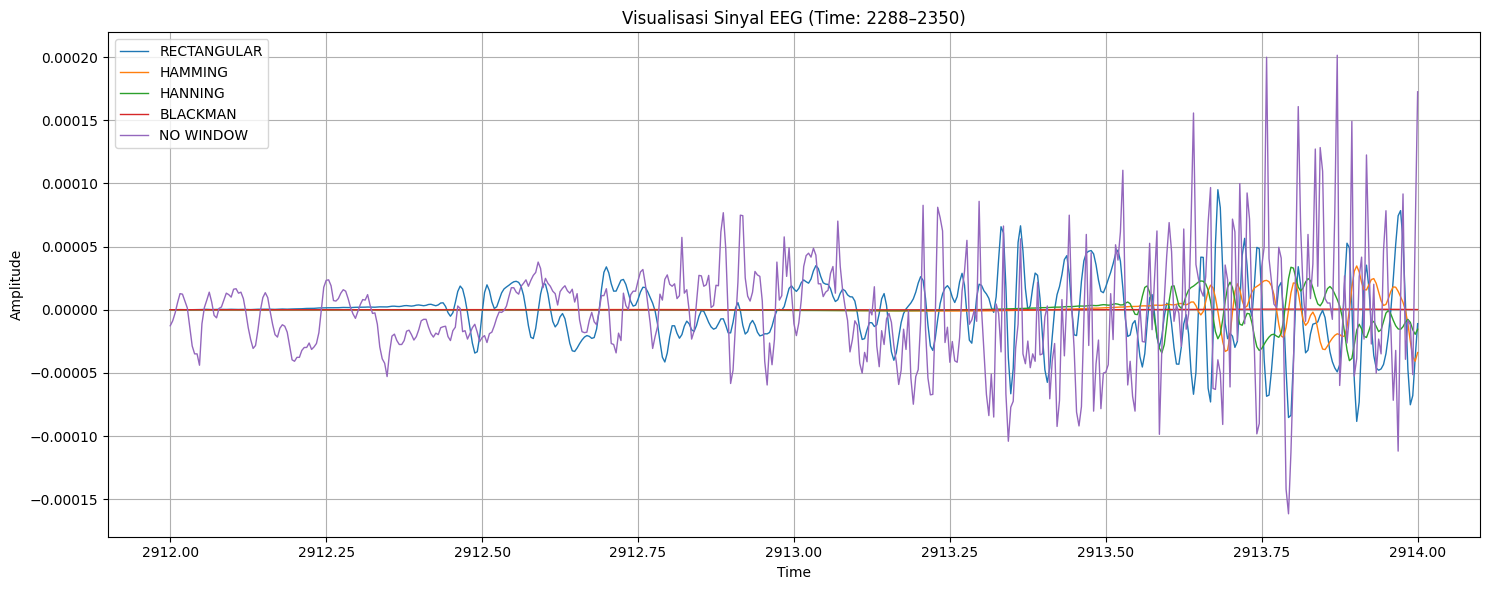

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df_rectangular = pd.read_csv('/content/drive/MyDrive/TA/FILTERING RECTANGULAR DONE/chb09_08.csv')
df_hamming = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HAMMING DONE/chb09_08.csv')
df_hanning = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HANNING DONE/chb09_08.csv')
df_blackman = pd.read_csv('/content/drive/MyDrive/TA/FILTERING BLACKMAN DONE/chb09_08.csv')
df_nofilter = pd.read_csv('/content/drive/MyDrive/TA/LABEL/chb09_08.csv')

# Pastikan kolom 'Time' bertipe numerik
df_rectangular['Time'] = pd.to_numeric(df_rectangular['Time'])
df_hamming['Time'] = pd.to_numeric(df_hamming['Time'])
df_hanning['Time'] = pd.to_numeric(df_hanning['Time'])
df_blackman['Time'] = pd.to_numeric(df_blackman['Time'])
df_nofilter['Time'] = pd.to_numeric(df_nofilter['Time'])

# Filter data untuk time antara 2300 dan 2350
df_filtered_rectangular = df_rectangular[(df_rectangular['Time'] >= 2912) & (df_rectangular['Time'] <= 2914)]
df_filtered_hamming = df_hamming[(df_hamming['Time'] >= 2912) & (df_hamming['Time'] <= 2914)]
df_filtered_hanning = df_hanning[(df_hanning['Time'] >= 2912) & (df_hanning['Time'] <= 2914)]
df_filtered_blackman = df_blackman[(df_blackman['Time'] >= 2912) & (df_blackman['Time'] <= 2914)]
df_filtered_nofilter = df_nofilter[(df_nofilter['Time'] >= 2912) & (df_nofilter['Time'] <= 2914)]

# Plot data
plt.figure(figsize=(15, 6))

plt.plot(df_filtered_rectangular['Time'], df_filtered_rectangular['FP1-F7'], label='RECTANGULAR', linewidth=1)
plt.plot(df_filtered_hamming['Time'], df_filtered_hamming['FP1-F7'], label='HAMMING', linewidth=1)
plt.plot(df_filtered_hanning['Time'], df_filtered_hanning['FP1-F7'], label='HANNING', linewidth=1)
plt.plot(df_filtered_blackman['Time'], df_filtered_blackman['FP1-F7'], label='BLACKMAN', linewidth=1)
plt.plot(df_filtered_nofilter['Time'], df_filtered_nofilter['FP1-F7'], label='NO WINDOW', linewidth=1)


plt.title('Visualisasi Sinyal EEG (Time: 2288–2350)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


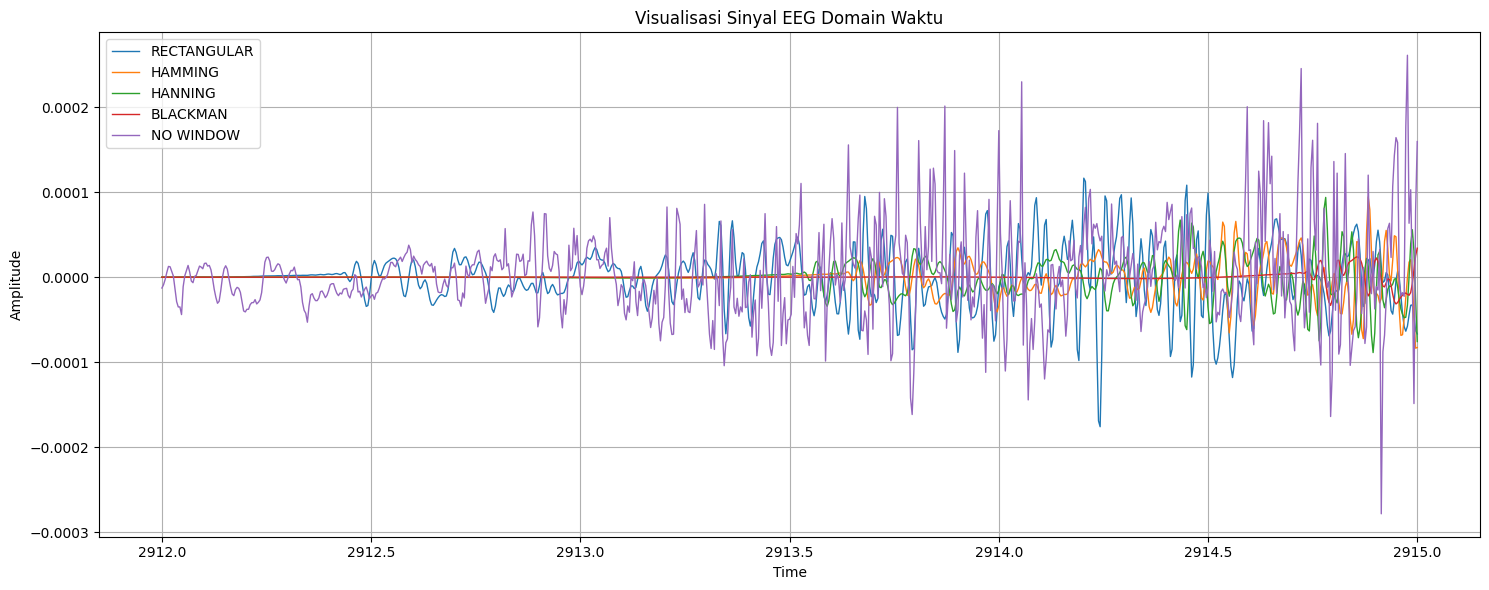

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df_rectangular = pd.read_csv('/content/drive/MyDrive/TA/FILTERING RECTANGULAR DONE/chb09_08.csv')
df_hamming = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HAMMING DONE/chb09_08.csv')
df_hanning = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HANNING DONE/chb09_08.csv')
df_blackman = pd.read_csv('/content/drive/MyDrive/TA/FILTERING BLACKMAN DONE/chb09_08.csv')
df_nofilter = pd.read_csv('/content/drive/MyDrive/TA/LABEL/chb09_08.csv')

# Pastikan kolom 'Time' bertipe numerik
df_rectangular['Time'] = pd.to_numeric(df_rectangular['Time'])
df_hamming['Time'] = pd.to_numeric(df_hamming['Time'])
df_hanning['Time'] = pd.to_numeric(df_hanning['Time'])
df_blackman['Time'] = pd.to_numeric(df_blackman['Time'])
df_nofilter['Time'] = pd.to_numeric(df_nofilter['Time'])

# Filter data untuk time antara 2300 dan 2350
df_filtered_rectangular = df_rectangular[(df_rectangular['Time'] >= 2912) & (df_rectangular['Time'] <= 2915)]
df_filtered_hamming = df_hamming[(df_hamming['Time'] >= 2912) & (df_hamming['Time'] <= 2915)]
df_filtered_hanning = df_hanning[(df_hanning['Time'] >= 2912) & (df_hanning['Time'] <= 2915)]
df_filtered_blackman = df_blackman[(df_blackman['Time'] >= 2912) & (df_blackman['Time'] <= 2915)]
df_filtered_nofilter = df_nofilter[(df_nofilter['Time'] >= 2912) & (df_nofilter['Time'] <= 2915)]

# Plot data
plt.figure(figsize=(15, 6))

plt.plot(df_filtered_rectangular['Time'], df_filtered_rectangular['FP1-F7'], label='RECTANGULAR', linewidth=1)
plt.plot(df_filtered_hamming['Time'], df_filtered_hamming['FP1-F7'], label='HAMMING', linewidth=1)
plt.plot(df_filtered_hanning['Time'], df_filtered_hanning['FP1-F7'], label='HANNING', linewidth=1)
plt.plot(df_filtered_blackman['Time'], df_filtered_blackman['FP1-F7'], label='BLACKMAN', linewidth=1)
plt.plot(df_filtered_nofilter['Time'], df_filtered_nofilter['FP1-F7'], label='NO WINDOW', linewidth=1)


plt.title('Visualisasi Sinyal EEG Domain Waktu')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


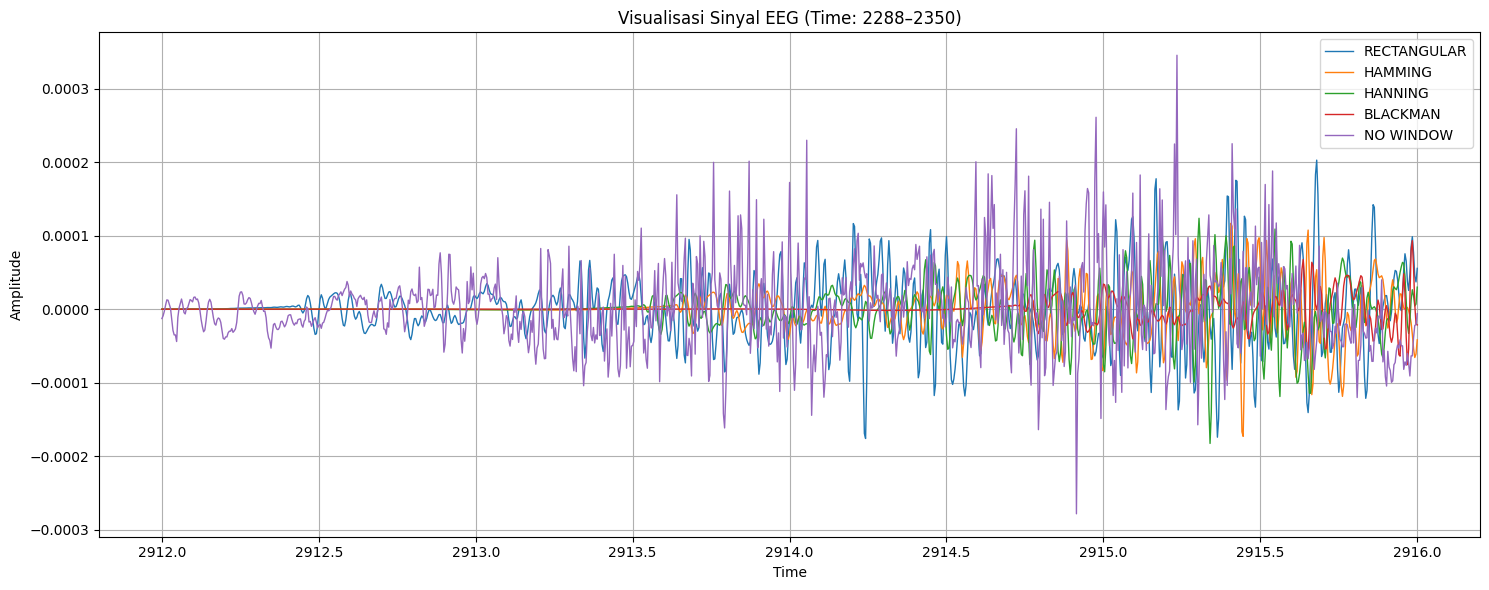

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df_rectangular = pd.read_csv('/content/drive/MyDrive/TA/FILTERING RECTANGULAR DONE/chb09_08.csv')
df_hamming = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HAMMING DONE/chb09_08.csv')
df_hanning = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HANNING DONE/chb09_08.csv')
df_blackman = pd.read_csv('/content/drive/MyDrive/TA/FILTERING BLACKMAN DONE/chb09_08.csv')
df_nofilter = pd.read_csv('/content/drive/MyDrive/TA/LABEL/chb09_08.csv')

# Pastikan kolom 'Time' bertipe numerik
df_rectangular['Time'] = pd.to_numeric(df_rectangular['Time'])
df_hamming['Time'] = pd.to_numeric(df_hamming['Time'])
df_hanning['Time'] = pd.to_numeric(df_hanning['Time'])
df_blackman['Time'] = pd.to_numeric(df_blackman['Time'])
df_nofilter['Time'] = pd.to_numeric(df_nofilter['Time'])

# Filter data untuk time antara 2300 dan 2350
df_filtered_rectangular = df_rectangular[(df_rectangular['Time'] >= 2912) & (df_rectangular['Time'] <= 2916)]
df_filtered_hamming = df_hamming[(df_hamming['Time'] >= 2912) & (df_hamming['Time'] <= 2916)]
df_filtered_hanning = df_hanning[(df_hanning['Time'] >= 2912) & (df_hanning['Time'] <= 2916)]
df_filtered_blackman = df_blackman[(df_blackman['Time'] >= 2912) & (df_blackman['Time'] <= 2916)]
df_filtered_nofilter = df_nofilter[(df_nofilter['Time'] >= 2912) & (df_nofilter['Time'] <= 2916)]

# Plot data
plt.figure(figsize=(15, 6))

plt.plot(df_filtered_rectangular['Time'], df_filtered_rectangular['FP1-F7'], label='RECTANGULAR', linewidth=1)
plt.plot(df_filtered_hamming['Time'], df_filtered_hamming['FP1-F7'], label='HAMMING', linewidth=1)
plt.plot(df_filtered_hanning['Time'], df_filtered_hanning['FP1-F7'], label='HANNING', linewidth=1)
plt.plot(df_filtered_blackman['Time'], df_filtered_blackman['FP1-F7'], label='BLACKMAN', linewidth=1)
plt.plot(df_filtered_nofilter['Time'], df_filtered_nofilter['FP1-F7'], label='NO WINDOW', linewidth=1)


plt.title('Visualisasi Sinyal EEG (Time: 2288–2350)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


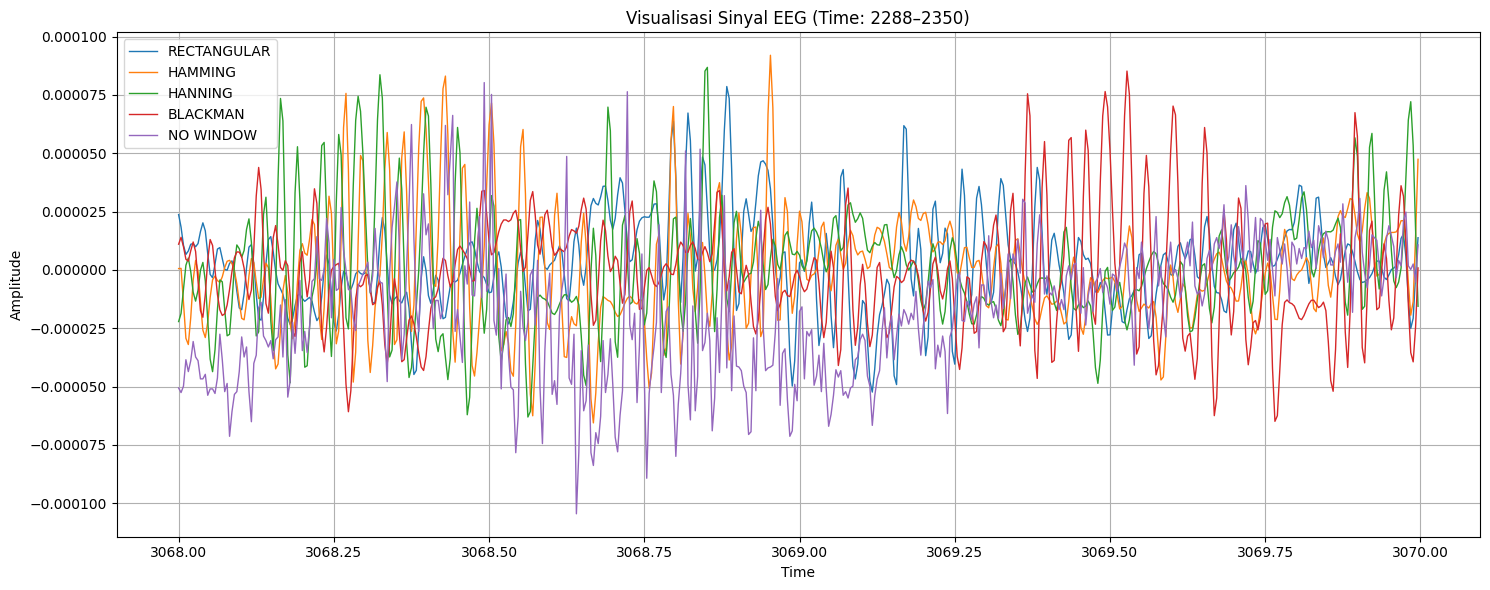

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df_rectangular = pd.read_csv('/content/drive/MyDrive/TA/FILTERING RECTANGULAR DONE/chb09_08.csv')
df_hamming = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HAMMING DONE/chb09_08.csv')
df_hanning = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HANNING DONE/chb09_08.csv')
df_blackman = pd.read_csv('/content/drive/MyDrive/TA/FILTERING BLACKMAN DONE/chb09_08.csv')
df_nofilter = pd.read_csv('/content/drive/MyDrive/TA/LABEL/chb09_08.csv')

# Pastikan kolom 'Time' bertipe numerik
df_rectangular['Time'] = pd.to_numeric(df_rectangular['Time'])
df_hamming['Time'] = pd.to_numeric(df_hamming['Time'])
df_hanning['Time'] = pd.to_numeric(df_hanning['Time'])
df_blackman['Time'] = pd.to_numeric(df_blackman['Time'])
df_nofilter['Time'] = pd.to_numeric(df_nofilter['Time'])

# Filter data untuk time antara 2300 dan 2350
df_filtered_rectangular = df_rectangular[(df_rectangular['Time'] >= 3068) & (df_rectangular['Time'] <= 3070)]
df_filtered_hamming = df_hamming[(df_hamming['Time'] >= 3068) & (df_hamming['Time'] <= 3070)]
df_filtered_hanning = df_hanning[(df_hanning['Time'] >= 3068) & (df_hanning['Time'] <= 3070)]
df_filtered_blackman = df_blackman[(df_blackman['Time'] >= 3068) & (df_blackman['Time'] <= 3070)]
df_filtered_nofilter = df_nofilter[(df_nofilter['Time'] >= 3068) & (df_nofilter['Time'] <= 3070)]

# Plot data
plt.figure(figsize=(15, 6))

plt.plot(df_filtered_rectangular['Time'], df_filtered_rectangular['FP1-F7'], label='RECTANGULAR', linewidth=1)
plt.plot(df_filtered_hamming['Time'], df_filtered_hamming['FP1-F7'], label='HAMMING', linewidth=1)
plt.plot(df_filtered_hanning['Time'], df_filtered_hanning['FP1-F7'], label='HANNING', linewidth=1)
plt.plot(df_filtered_blackman['Time'], df_filtered_blackman['FP1-F7'], label='BLACKMAN', linewidth=1)
plt.plot(df_filtered_nofilter['Time'], df_filtered_nofilter['FP1-F7'], label='NO WINDOW', linewidth=1)


plt.title('Visualisasi Sinyal EEG (Time: 2288–2350)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


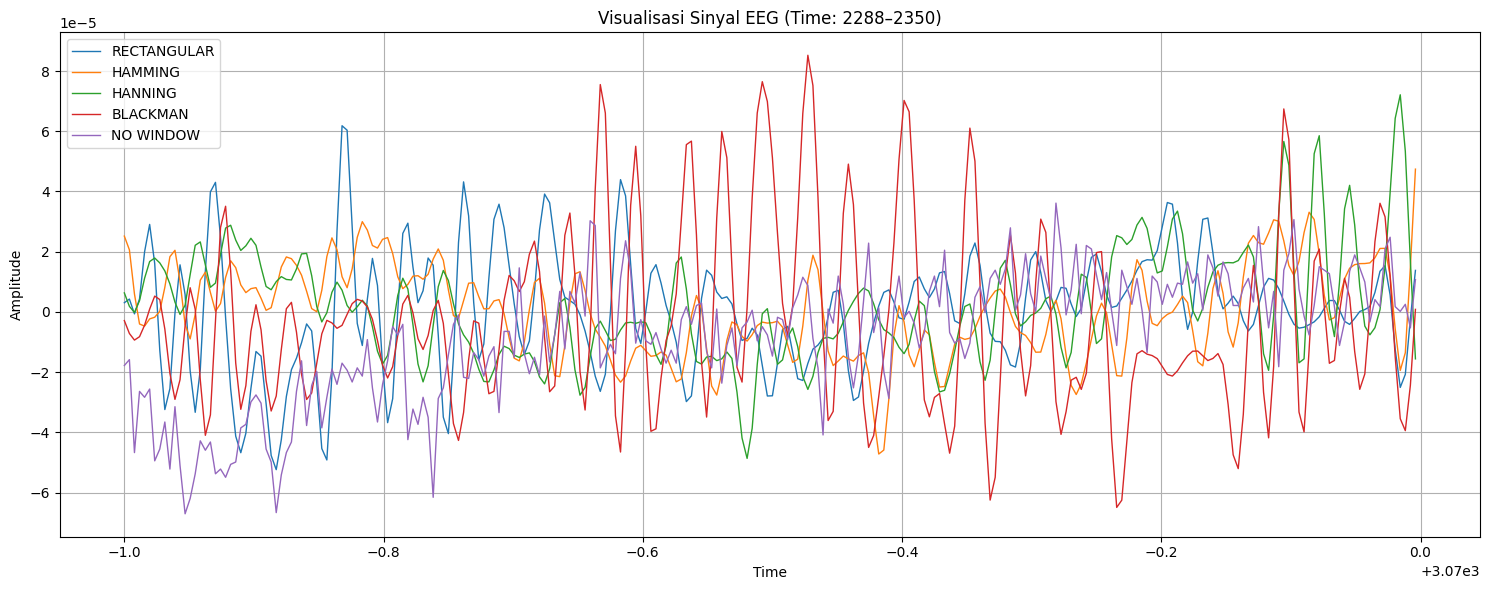

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df_rectangular = pd.read_csv('/content/drive/MyDrive/TA/FILTERING RECTANGULAR DONE/chb09_08.csv')
df_hamming = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HAMMING DONE/chb09_08.csv')
df_hanning = pd.read_csv('/content/drive/MyDrive/TA/FILTERING HANNING DONE/chb09_08.csv')
df_blackman = pd.read_csv('/content/drive/MyDrive/TA/FILTERING BLACKMAN DONE/chb09_08.csv')
df_nofilter = pd.read_csv('/content/drive/MyDrive/TA/LABEL/chb09_08.csv')

# Pastikan kolom 'Time' bertipe numerik
df_rectangular['Time'] = pd.to_numeric(df_rectangular['Time'])
df_hamming['Time'] = pd.to_numeric(df_hamming['Time'])
df_hanning['Time'] = pd.to_numeric(df_hanning['Time'])
df_blackman['Time'] = pd.to_numeric(df_blackman['Time'])
df_nofilter['Time'] = pd.to_numeric(df_nofilter['Time'])

# Filter data untuk time antara 2300 dan 2350
df_filtered_rectangular = df_rectangular[(df_rectangular['Time'] >= 3069) & (df_rectangular['Time'] <= 3070)]
df_filtered_hamming = df_hamming[(df_hamming['Time'] >= 3069) & (df_hamming['Time'] <= 3070)]
df_filtered_hanning = df_hanning[(df_hanning['Time'] >= 3069) & (df_hanning['Time'] <= 3070)]
df_filtered_blackman = df_blackman[(df_blackman['Time'] >= 3069) & (df_blackman['Time'] <= 3070)]
df_filtered_nofilter = df_nofilter[(df_nofilter['Time'] >= 3069) & (df_nofilter['Time'] <= 3070)]

# Plot data
plt.figure(figsize=(15, 6))

plt.plot(df_filtered_rectangular['Time'], df_filtered_rectangular['FP1-F7'], label='RECTANGULAR', linewidth=1)
plt.plot(df_filtered_hamming['Time'], df_filtered_hamming['FP1-F7'], label='HAMMING', linewidth=1)
plt.plot(df_filtered_hanning['Time'], df_filtered_hanning['FP1-F7'], label='HANNING', linewidth=1)
plt.plot(df_filtered_blackman['Time'], df_filtered_blackman['FP1-F7'], label='BLACKMAN', linewidth=1)
plt.plot(df_filtered_nofilter['Time'], df_filtered_nofilter['FP1-F7'], label='NO WINDOW', linewidth=1)


plt.title('Visualisasi Sinyal EEG (Time: 2288–2350)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#FFT

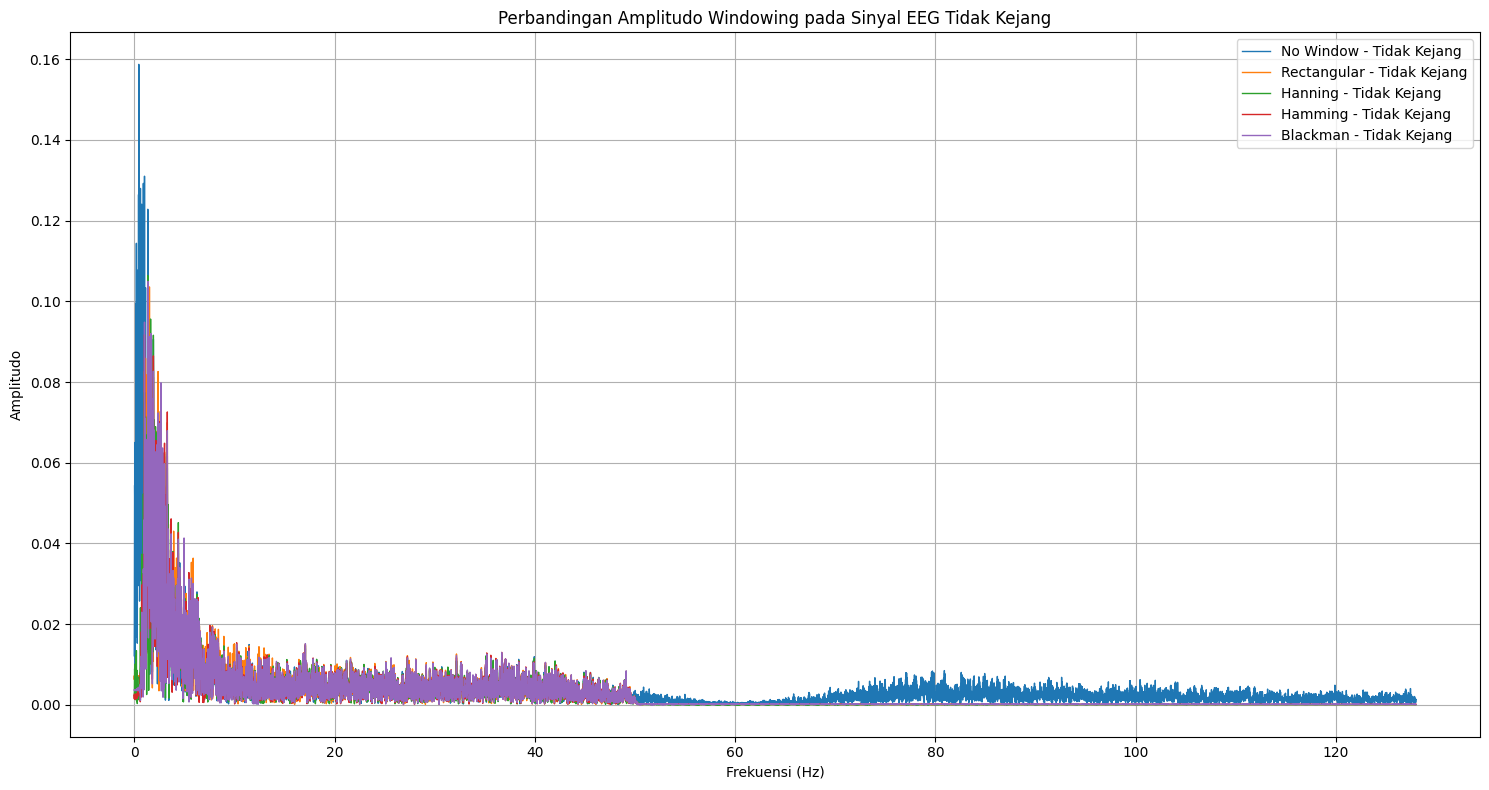

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df_rectangular = pd.read_csv('/content/drive/MyDrive/TA/FFT RECTANGULAR DONE/chb09_08.csv')
df_hamming = pd.read_csv('/content/drive/MyDrive/TA/FFT HAMMING DONE/chb09_08.csv')
df_hanning = pd.read_csv('/content/drive/MyDrive/TA/FFT HANNING DONE/chb09_08.csv')
df_blackman = pd.read_csv('/content/drive/MyDrive/TA/FFT BLACKMAN DONE/chb09_08.csv')
df_nofilter = pd.read_csv('/content/drive/MyDrive/TA/FFT chb09_08.csv')

# Memisahkan data berdasarkan kondisi kejang
df_kejang_rectangular = df_rectangular[df_rectangular['seizure'] == 'kejang']
df_tidak_kejang_rectangular = df_rectangular[df_rectangular['seizure'] == 'tidak kejang']

df_kejang_hamming = df_hamming[df_hamming['seizure'] == 'kejang']
df_tidak_kejang_hamming = df_hamming[df_hamming['seizure'] == 'tidak kejang']

df_kejang_hanning = df_hanning[df_hanning['seizure'] == 'kejang']
df_tidak_kejang_hanning = df_hanning[df_hanning['seizure'] == 'tidak kejang']

df_kejang_blackman = df_blackman[df_blackman['seizure'] == 'kejang']
df_tidak_kejang_blackman = df_blackman[df_blackman['seizure'] == 'tidak kejang']

df_kejang_nofilter = df_nofilter[df_nofilter['seizure'] == 'kejang']
df_tidak_kejang_nofilter = df_nofilter[df_nofilter['seizure'] == 'tidak kejang']

# Plotting
plt.figure(figsize=(15, 8))

# Visualisasi amplitudo untuk masing-masing window saat tidak kejang
plt.plot(df_tidak_kejang_nofilter['frekuensi'], df_tidak_kejang_nofilter['FP1-F7'], label='No Window - Tidak Kejang', linewidth=1)
plt.plot(df_tidak_kejang_blackman['frekuensi'], df_tidak_kejang_blackman['FP1-F7'], label='Rectangular - Tidak Kejang', linewidth=1)
plt.plot(df_tidak_kejang_rectangular['frekuensi'], df_tidak_kejang_rectangular['FP1-F7'], label='Hanning - Tidak Kejang', linewidth=1)
plt.plot(df_tidak_kejang_hanning['frekuensi'], df_tidak_kejang_hanning['FP1-F7'], label='Hamming - Tidak Kejang', linewidth=1)
plt.plot(df_tidak_kejang_hamming['frekuensi'], df_tidak_kejang_hamming['FP1-F7'], label='Blackman - Tidak Kejang', linewidth=1)

# Konfigurasi plot
plt.title('Perbandingan Amplitudo Windowing pada Sinyal EEG Tidak Kejang')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

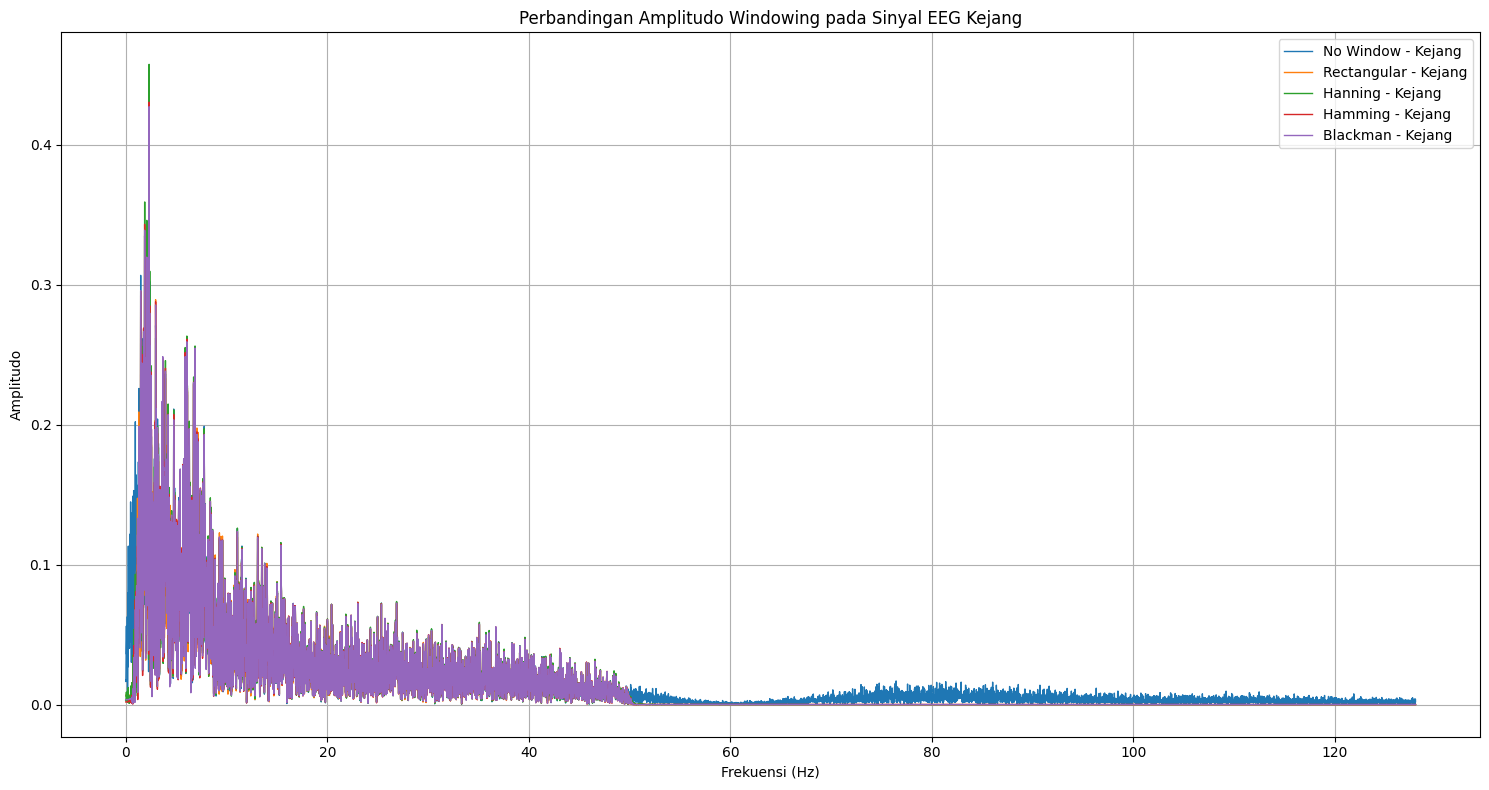

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df_rectangular = pd.read_csv('/content/drive/MyDrive/TA/FFT RECTANGULAR DONE/chb09_08.csv')
df_hamming = pd.read_csv('/content/drive/MyDrive/TA/FFT HAMMING DONE/chb09_08.csv')
df_hanning = pd.read_csv('/content/drive/MyDrive/TA/FFT HANNING DONE/chb09_08.csv')
df_blackman = pd.read_csv('/content/drive/MyDrive/TA/FFT BLACKMAN DONE/chb09_08.csv')
df_nofilter = pd.read_csv('/content/drive/MyDrive/TA/FFT chb09_08.csv')

# Memisahkan data berdasarkan kondisi kejang
df_kejang_rectangular = df_rectangular[df_rectangular['seizure'] == 'kejang']
df_tidak_kejang_rectangular = df_rectangular[df_rectangular['seizure'] == 'tidak kejang']

df_kejang_hamming = df_hamming[df_hamming['seizure'] == 'kejang']
df_tidak_kejang_hamming = df_hamming[df_hamming['seizure'] == 'tidak kejang']

df_kejang_hanning = df_hanning[df_hanning['seizure'] == 'kejang']
df_tidak_kejang_hanning = df_hanning[df_hanning['seizure'] == 'tidak kejang']

df_kejang_blackman = df_blackman[df_blackman['seizure'] == 'kejang']
df_tidak_kejang_blackman = df_blackman[df_blackman['seizure'] == 'tidak kejang']

df_kejang_nofilter = df_nofilter[df_nofilter['seizure'] == 'kejang']
df_tidak_kejang_nofilter = df_nofilter[df_nofilter['seizure'] == 'tidak kejang']

# Plotting
plt.figure(figsize=(15, 8))

# Visualisasi amplitudo untuk masing-masing window saat kejang
plt.plot(df_kejang_nofilter['frekuensi'], df_kejang_nofilter['FP1-F7'], label='No Window - Kejang', linewidth=1)
plt.plot(df_kejang_blackman['frekuensi'], df_kejang_blackman['FP1-F7'], label='Rectangular - Kejang', linewidth=1)
plt.plot(df_kejang_rectangular['frekuensi'], df_kejang_rectangular['FP1-F7'], label='Hanning - Kejang', linewidth=1)
plt.plot(df_kejang_hanning['frekuensi'], df_kejang_hanning['FP1-F7'], label='Hamming - Kejang', linewidth=1)
plt.plot(df_kejang_hamming['frekuensi'], df_kejang_hamming['FP1-F7'], label='Blackman - Kejang', linewidth=1)

# Konfigurasi plot
plt.title('Perbandingan Amplitudo Windowing pada Sinyal EEG Kejang')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

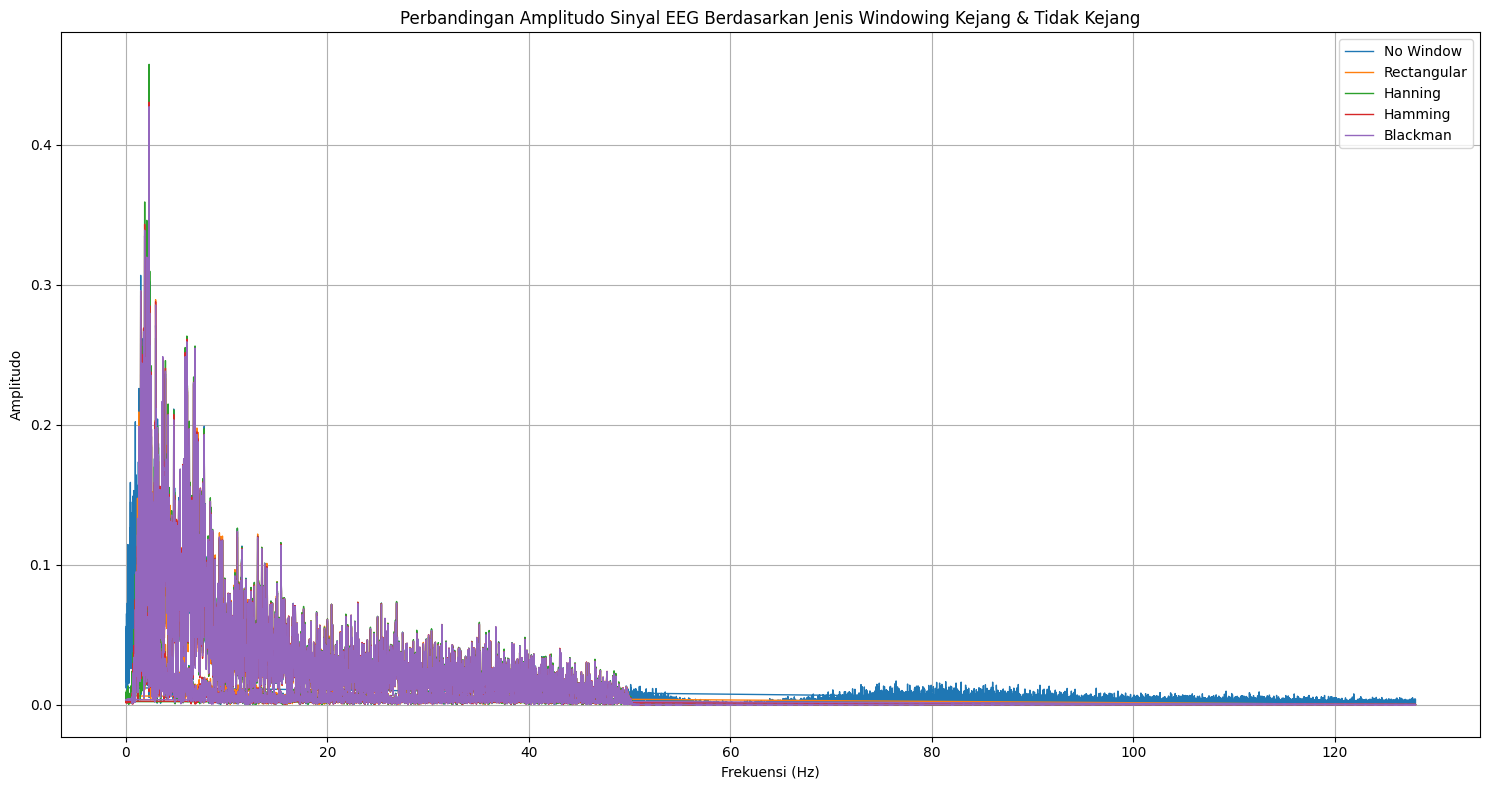

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df_rectangular = pd.read_csv('/content/drive/MyDrive/TA/FFT RECTANGULAR DONE/chb09_08.csv')
df_hamming = pd.read_csv('/content/drive/MyDrive/TA/FFT HAMMING DONE/chb09_08.csv')
df_hanning = pd.read_csv('/content/drive/MyDrive/TA/FFT HANNING DONE/chb09_08.csv')
df_blackman = pd.read_csv('/content/drive/MyDrive/TA/FFT BLACKMAN DONE/chb09_08.csv')
df_nofilter = pd.read_csv('/content/drive/MyDrive/TA/FFT chb09_08.csv')

# Plotting semua jenis window dalam satu grafik
plt.figure(figsize=(15, 8))

plt.plot(df_nofilter['frekuensi'], df_nofilter['FP1-F7'], label='No Window', linewidth=1)
plt.plot(df_blackman['frekuensi'], df_blackman['FP1-F7'], label='Rectangular', linewidth=1)
plt.plot(df_rectangular['frekuensi'], df_rectangular['FP1-F7'], label='Hanning', linewidth=1)
plt.plot(df_hanning['frekuensi'], df_hanning['FP1-F7'], label='Hamming', linewidth=1)
plt.plot(df_hamming['frekuensi'], df_hamming['FP1-F7'], label='Blackman', linewidth=1)

# Konfigurasi tampilan
plt.title('Perbandingan Amplitudo Sinyal EEG Berdasarkan Jenis Windowing Kejang & Tidak Kejang')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


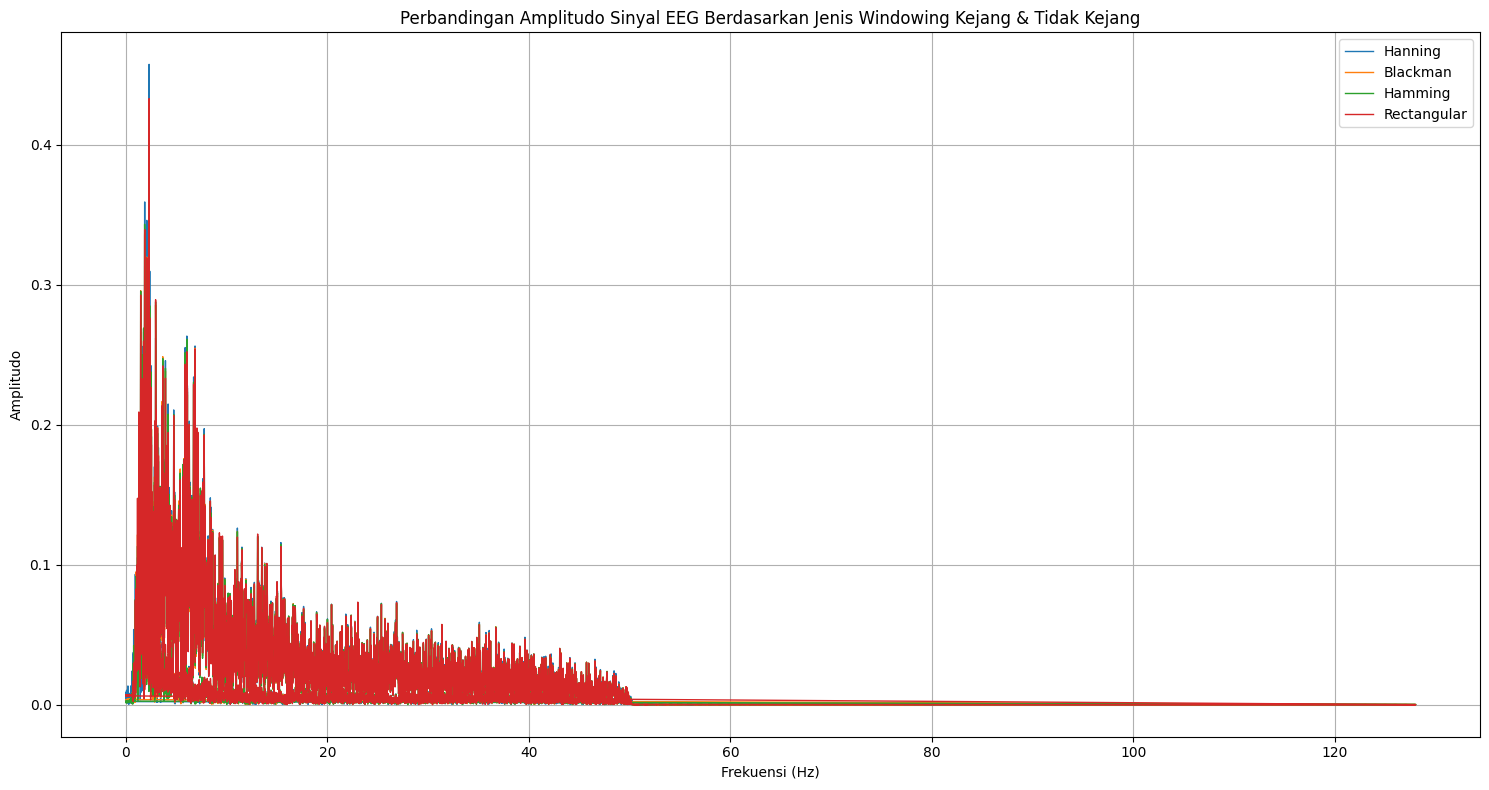

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df_rectangular = pd.read_csv('/content/drive/MyDrive/TA/FFT RECTANGULAR DONE/chb09_08.csv')
df_hamming = pd.read_csv('/content/drive/MyDrive/TA/FFT HAMMING DONE/chb09_08.csv')
df_hanning = pd.read_csv('/content/drive/MyDrive/TA/FFT HANNING DONE/chb09_08.csv')
df_blackman = pd.read_csv('/content/drive/MyDrive/TA/FFT BLACKMAN DONE/chb09_08.csv')

# Plotting semua jenis window dalam satu grafik
plt.figure(figsize=(15, 8))

plt.plot(df_rectangular['frekuensi'], df_rectangular['FP1-F7'], label='Hanning', linewidth=1)
plt.plot(df_hamming['frekuensi'], df_hamming['FP1-F7'], label='Blackman', linewidth=1)
plt.plot(df_hanning['frekuensi'], df_hanning['FP1-F7'], label='Hamming', linewidth=1)
plt.plot(df_blackman['frekuensi'], df_blackman['FP1-F7'], label='Rectangular', linewidth=1)

# Konfigurasi tampilan
plt.title('Perbandingan Amplitudo Sinyal EEG Berdasarkan Jenis Windowing Kejang & Tidak Kejang')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Misalnya data sudah dimuat ke dalam df
df_rectangular = pd.read_csv('/content/drive/MyDrive/TA/FFT RECTANGULAR DONE/chb09_08.csv')

# Menghitung statistik deskriptif untuk kolom FP1-F7 HANNING
mean_rectangular = df_rectangular['FP1-F7'].mean()
max_rectangular = df_rectangular['FP1-F7'].max()
min_rectangular = df_rectangular['FP1-F7'].min()
std_rectangular = df_rectangular['FP1-F7'].std()
energy_rectangular = np.sum(df_rectangular['FP1-F7']**2)

# Menampilkan hasilnya
print("Statistik FP1-F7 RECTANGULAR:")
print(f"Mean      : {mean_rectangular}")
print(f"Max       : {max_rectangular}")
print(f"Min       : {min_rectangular}")
print(f"Std Dev   : {std_rectangular}")
print(f"Energi    : {energy_rectangular}")

Statistik FP1-F7 RECTANGULAR:
Mean      : 0.008433142715114111
Max       : 0.4573173126899866
Min       : 4.197505276396703e-07
Std Dev   : 0.023121322394438353
Energi    : 12.24941412262352


In [ ]:
# Misalnya data sudah dimuat ke dalam df
df_hamming = pd.read_csv('/content/drive/MyDrive/TA/FFT HAMMING DONE/chb09_08.csv')

# Menghitung statistik deskriptif untuk kolom FP1-F7 HANNING
mean_hamming = df_hamming['FP1-F7'].mean()
max_hamming = df_hamming['FP1-F7'].max()
min_hamming = df_hamming['FP1-F7'].min()
std_hamming = df_hamming['FP1-F7'].std()
energy_hamming = np.sum(df_hamming['FP1-F7']**2)

# Menampilkan hasilnya
print("Statistik FP1-F7 HAMMING:")
print(f"Mean      : {mean_hamming}")
print(f"Max       : {max_hamming}")
print(f"Min       : {min_hamming}")
print(f"Std Dev   : {std_hamming}")
print(f"Energi    : {energy_hamming}")

Statistik FP1-F7 HAMMING:
Mean      : 0.008410166403568047
Max       : 0.4270678748365448
Min       : 4.489612608567784e-06
Std Dev   : 0.02283342689513227
Energi    : 11.974033856164546


In [ ]:
# Misalnya data sudah dimuat ke dalam df
df_hanning = pd.read_csv('/content/drive/MyDrive/TA/FFT HANNING DONE/chb09_08.csv')

# Menghitung statistik deskriptif untuk kolom FP1-F7 HANNING
mean_hanning = df_hanning['FP1-F7'].mean()
max_hanning = df_hanning['FP1-F7'].max()
min_hanning = df_hanning['FP1-F7'].min()
std_hanning = df_hanning['FP1-F7'].std()
energy_hanning = np.sum(df_hanning['FP1-F7']**2)

# Menampilkan hasilnya
print("Statistik FP1-F7 HANNING:")
print(f"Mean      : {mean_hanning}")
print(f"Max       : {max_hanning}")
print(f"Min       : {min_hanning}")
print(f"Std Dev   : {std_hanning}")
print(f"Energi    : {energy_hanning}")

Statistik FP1-F7 HAMMING:
Mean      : 0.008424197813881595
Max       : 0.4303226418346806
Min       : 1.9580544270335217e-05
Std Dev   : 0.022807519227055935
Energi    : 11.954898268495755


In [ ]:
# Misalnya data sudah dimuat ke dalam df
df_blackman = pd.read_csv('/content/drive/MyDrive/TA/FFT BLACKMAN DONE/chb09_08.csv')

# Menghitung statistik deskriptif untuk kolom FP1-F7 HANNING
mean_blackman = df_blackman['FP1-F7'].mean()
max_blackman = df_blackman['FP1-F7'].max()
min_blackman = df_blackman['FP1-F7'].min()
std_blackman = df_blackman['FP1-F7'].std()
energy_blackman = np.sum(df_blackman['FP1-F7']**2)

# Menampilkan hasilnya
print("Statistik FP1-F7 BLACKMAN:")
print(f"Mean      : {mean_blackman}")
print(f"Max       : {max_blackman}")
print(f"Min       : {min_blackman}")
print(f"Std Dev   : {std_blackman}")
print(f"Energi    : {energy_blackman}")

Statistik FP1-F7 BLACKMAN:
Mean      : 0.008448488876541607
Max       : 0.4328248322895961
Min       : 1.600405452274106e-05
Std Dev   : 0.022867527288754266
Energi    : 12.01861582034116


In [ ]:
# Misalnya data sudah dimuat ke dalam df
df_nofilter = pd.read_csv('/content/drive/MyDrive/TA/FFT chb09_08.csv')

# Menghitung statistik deskriptif untuk kolom FP1-F7 HANNING
mean_nofilter = df_nofilter['FP1-F7'].mean()
max_nofilter = df_nofilter['FP1-F7'].max()
min_nofilter = df_nofilter['FP1-F7'].min()
std_nofilter = df_nofilter['FP1-F7'].std()
energy_nofilter = np.sum(df_nofilter['FP1-F7']**2)

# Menampilkan hasilnya
print("Statistik FP1-F7 RECTANGULAR:")
print(f"Mean      : {mean_nofilter}")
print(f"Max       : {max_nofilter}")
print(f"Min       : {min_nofilter}")
print(f"Std Dev   : {std_nofilter}")
print(f"Energi    : {energy_nofilter}")

Statistik FP1-F7 RECTANGULAR:
Mean      : 0.010465124325758675
Max       : 0.4306185305772251
Min       : 1.1209652758108753e-05
Std Dev   : 0.023243500903297645
Energi    : 13.140593499721975


In [ ]:
import pandas as pd
import numpy as np

# Baca data dari file CSV
df_rectangular = pd.read_csv('/content/drive/MyDrive/TA/FFT RECTANGULAR DONE/chb09_08.csv')

# Filter data kejang dan tidak kejang
df_kejang = df_rectangular[df_rectangular["seizure"] == "kejang"]
df_tidak_kejang = df_rectangular[df_rectangular["seizure"] == "tidak kejang"]

# Kolom EEG yang dianalisis
kolom_eeg = 'FP1-F7'

# Statistik untuk kondisi kejang
mean_kejang = df_kejang[kolom_eeg].mean()
max_kejang = df_kejang[kolom_eeg].max()
min_kejang = df_kejang[kolom_eeg].min()
std_kejang = df_kejang[kolom_eeg].std()
energy_kejang = np.sum(df_kejang[kolom_eeg] ** 2)

# Statistik untuk kondisi tidak kejang
mean_tidak_kejang = df_tidak_kejang[kolom_eeg].mean()
max_tidak_kejang = df_tidak_kejang[kolom_eeg].max()
min_tidak_kejang = df_tidak_kejang[kolom_eeg].min()
std_tidak_kejang = df_tidak_kejang[kolom_eeg].std()
energy_tidak_kejang = np.sum(df_tidak_kejang[kolom_eeg] ** 2)

# Tampilkan hasil
print("=== Statistik FP1-F7 RECTANGULAR ===")
print("\n>> Kondisi Kejang:")
print(f"Mean      : {mean_kejang}")
print(f"Max       : {max_kejang}")
print(f"Min       : {min_kejang}")
print(f"Std Dev   : {std_kejang}")
print(f"Energi    : {energy_kejang}")

print("\n>> Kondisi Tidak Kejang:")
print(f"Mean      : {mean_tidak_kejang}")
print(f"Max       : {max_tidak_kejang}")
print(f"Min       : {min_tidak_kejang}")
print(f"Std Dev   : {std_tidak_kejang}")
print(f"Energi    : {energy_tidak_kejang}")


=== Statistik FP1-F7 RECTANGULAR ===

>> Kondisi Kejang:
Mean      : 0.01417390719826012
Max       : 0.4573173126899866
Min       : 4.197505276396703e-07
Std Dev   : 0.03094096689112926
Energi    : 11.711196655467734

>> Kondisi Tidak Kejang:
Mean      : 0.0026923782319681045
Max       : 0.1063950180066192
Min       : 5.863835392814943e-07
Std Dev   : 0.006780948785248119
Energi    : 0.5382174671557866


In [ ]:
import pandas as pd
import numpy as np

# Baca data dari file CSV
df_hamming = pd.read_csv('/content/drive/MyDrive/TA/FFT HAMMING DONE/chb09_08.csv')

# Filter data kejang dan tidak kejang
df_kejang = df_hamming[df_hamming["seizure"] == "kejang"]
df_tidak_kejang = df_hamming[df_hamming["seizure"] == "tidak kejang"]

# Kolom EEG yang dianalisis
kolom_eeg = 'FP1-F7'

# Statistik untuk kondisi kejang
mean_kejang = df_kejang[kolom_eeg].mean()
max_kejang = df_kejang[kolom_eeg].max()
min_kejang = df_kejang[kolom_eeg].min()
std_kejang = df_kejang[kolom_eeg].std()
energy_kejang = np.sum(df_kejang[kolom_eeg] ** 2)

# Statistik untuk kondisi tidak kejang
mean_tidak_kejang = df_tidak_kejang[kolom_eeg].mean()
max_tidak_kejang = df_tidak_kejang[kolom_eeg].max()
min_tidak_kejang = df_tidak_kejang[kolom_eeg].min()
std_tidak_kejang = df_tidak_kejang[kolom_eeg].std()
energy_tidak_kejang = np.sum(df_tidak_kejang[kolom_eeg] ** 2)

# Tampilkan hasil
print("=== Statistik FP1-F7 HAMMING ===")
print("\n>> Kondisi Kejang:")
print(f"Mean      : {mean_kejang}")
print(f"Max       : {max_kejang}")
print(f"Min       : {min_kejang}")
print(f"Std Dev   : {std_kejang}")
print(f"Energi    : {energy_kejang}")

print("\n>> Kondisi Tidak Kejang:")
print(f"Mean      : {mean_tidak_kejang}")
print(f"Max       : {max_tidak_kejang}")
print(f"Min       : {min_tidak_kejang}")
print(f"Std Dev   : {std_tidak_kejang}")
print(f"Energi    : {energy_tidak_kejang}")


=== Statistik FP1-F7 HAMMING ===

>> Kondisi Kejang:
Mean      : 0.014038888662715028
Max       : 0.4270678748365448
Min       : 3.6936470569757626e-05
Std Dev   : 0.030465118570002354
Energi    : 11.377234270803834

>> Kondisi Tidak Kejang:
Mean      : 0.002781444144421069
Max       : 0.1049263415439464
Min       : 4.489612608567784e-06
Std Dev   : 0.007161535223774722
Energi    : 0.5967995853607115


In [ ]:
import pandas as pd
import numpy as np

# Baca data dari file CSV
df_hanning = pd.read_csv('/content/drive/MyDrive/TA/FFT HANNING DONE/chb09_08.csv')

# Filter data kejang dan tidak kejang
df_kejang = df_hanning[df_hanning["seizure"] == "kejang"]
df_tidak_kejang = df_hanning[df_hanning["seizure"] == "tidak kejang"]

# Kolom EEG yang dianalisis
kolom_eeg = 'FP1-F7'

# Statistik untuk kondisi kejang
mean_kejang = df_kejang[kolom_eeg].mean()
max_kejang = df_kejang[kolom_eeg].max()
min_kejang = df_kejang[kolom_eeg].min()
std_kejang = df_kejang[kolom_eeg].std()
energy_kejang = np.sum(df_kejang[kolom_eeg] ** 2)

# Statistik untuk kondisi tidak kejang
mean_tidak_kejang = df_tidak_kejang[kolom_eeg].mean()
max_tidak_kejang = df_tidak_kejang[kolom_eeg].max()
min_tidak_kejang = df_tidak_kejang[kolom_eeg].min()
std_tidak_kejang = df_tidak_kejang[kolom_eeg].std()
energy_tidak_kejang = np.sum(df_tidak_kejang[kolom_eeg] ** 2)

# Tampilkan hasil
print("=== Statistik FP1-F7 HANNING ===")
print("\n>> Kondisi Kejang:")
print(f"Mean      : {mean_kejang}")
print(f"Max       : {max_kejang}")
print(f"Min       : {min_kejang}")
print(f"Std Dev   : {std_kejang}")
print(f"Energi    : {energy_kejang}")

print("\n>> Kondisi Tidak Kejang:")
print(f"Mean      : {mean_tidak_kejang}")
print(f"Max       : {max_tidak_kejang}")
print(f"Min       : {min_tidak_kejang}")
print(f"Std Dev   : {std_tidak_kejang}")
print(f"Energi    : {energy_tidak_kejang}")


=== Statistik FP1-F7 HANNING ===

>> Kondisi Kejang:
Mean      : 0.014055049224377378
Max       : 0.4303226418346806
Min       : 4.3002653117818135e-05
Std Dev   : 0.030448065574396468
Energi    : 11.371322434390258

>> Kondisi Tidak Kejang:
Mean      : 0.0027933464033858143
Max       : 0.1047273866197255
Min       : 1.9580544270335217e-05
Std Dev   : 0.007064939468627762
Energi    : 0.5835758341054985


In [ ]:
import pandas as pd
import numpy as np

# Baca data dari file CSV
df_blackman = pd.read_csv('/content/drive/MyDrive/TA/FFT BLACKMAN DONE/chb09_08.csv')

# Filter data kejang dan tidak kejang
df_kejang = df_blackman[df_blackman["seizure"] == "kejang"]
df_tidak_kejang = df_blackman[df_blackman["seizure"] == "tidak kejang"]

# Kolom EEG yang dianalisis
kolom_eeg = 'FP1-F7'

# Statistik untuk kondisi kejang
mean_kejang = df_kejang[kolom_eeg].mean()
max_kejang = df_kejang[kolom_eeg].max()
min_kejang = df_kejang[kolom_eeg].min()
std_kejang = df_kejang[kolom_eeg].std()
energy_kejang = np.sum(df_kejang[kolom_eeg] ** 2)

# Statistik untuk kondisi tidak kejang
mean_tidak_kejang = df_tidak_kejang[kolom_eeg].mean()
max_tidak_kejang = df_tidak_kejang[kolom_eeg].max()
min_tidak_kejang = df_tidak_kejang[kolom_eeg].min()
std_tidak_kejang = df_tidak_kejang[kolom_eeg].std()
energy_tidak_kejang = np.sum(df_tidak_kejang[kolom_eeg] ** 2)

# Tampilkan hasil
print("=== Statistik FP1-F7 BLACKMAN ===")
print("\n>> Kondisi Kejang:")
print(f"Mean      : {mean_kejang}")
print(f"Max       : {max_kejang}")
print(f"Min       : {min_kejang}")
print(f"Std Dev   : {std_kejang}")
print(f"Energi    : {energy_kejang}")

print("\n>> Kondisi Tidak Kejang:")
print(f"Mean      : {mean_tidak_kejang}")
print(f"Max       : {max_tidak_kejang}")
print(f"Min       : {min_tidak_kejang}")
print(f"Std Dev   : {std_tidak_kejang}")
print(f"Energi    : {energy_tidak_kejang}")


=== Statistik FP1-F7 BLACKMAN ===

>> Kondisi Kejang:
Mean      : 0.014037916025805364
Max       : 0.4328248322895961
Min       : 1.600405452274106e-05
Std Dev   : 0.03047175343769954
Energi    : 11.38104608591616

>> Kondisi Tidak Kejang:
Mean      : 0.00285906172727785
Max       : 0.1047211803550902
Min       : 3.625914616615864e-05
Std Dev   : 0.007408238514332027
Energi    : 0.637569734425


In [ ]:
import pandas as pd
import numpy as np

# Baca data dari file CSV
df_nofilter = pd.read_csv('/content/drive/MyDrive/TA/FFT chb09_08.csv')

# Filter data kejang dan tidak kejang
df_kejang = df_nofilter[df_nofilter["seizure"] == "kejang"]
df_tidak_kejang = df_nofilter[df_nofilter["seizure"] == "tidak kejang"]

# Kolom EEG yang dianalisis
kolom_eeg = 'FP1-F7'

# Statistik untuk kondisi kejang
mean_kejang = df_kejang[kolom_eeg].mean()
max_kejang = df_kejang[kolom_eeg].max()
min_kejang = df_kejang[kolom_eeg].min()
std_kejang = df_kejang[kolom_eeg].std()
energy_kejang = np.sum(df_kejang[kolom_eeg] ** 2)

# Statistik untuk kondisi tidak kejang
mean_tidak_kejang = df_tidak_kejang[kolom_eeg].mean()
max_tidak_kejang = df_tidak_kejang[kolom_eeg].max()
min_tidak_kejang = df_tidak_kejang[kolom_eeg].min()
std_tidak_kejang = df_tidak_kejang[kolom_eeg].std()
energy_tidak_kejang = np.sum(df_tidak_kejang[kolom_eeg] ** 2)

# Tampilkan hasil
print("=== Statistik FP1-F7 NOFILTER ===")
print("\n>> Kondisi Kejang:")
print(f"Mean      : {mean_kejang}")
print(f"Max       : {max_kejang}")
print(f"Min       : {min_kejang}")
print(f"Std Dev   : {std_kejang}")
print(f"Energi    : {energy_kejang}")

print("\n>> Kondisi Tidak Kejang:")
print(f"Mean      : {mean_tidak_kejang}")
print(f"Max       : {max_tidak_kejang}")
print(f"Min       : {min_tidak_kejang}")
print(f"Std Dev   : {std_tidak_kejang}")
print(f"Energi    : {energy_tidak_kejang}")


=== Statistik FP1-F7 NOFILTER ===

>> Kondisi Kejang:
Mean      : 0.016719175904486145
Max       : 0.4306185305772251
Min       : 1.1209652758108753e-05
Std Dev   : 0.03040162394968254
Energi    : 12.17179599144258

>> Kondisi Tidak Kejang:
Mean      : 0.004211072747031203
Max       : 0.1587528061080216
Min       : 2.100297682372912e-05
Std Dev   : 0.008836362576319829
Energi    : 0.9687975082793947


# FREKUENSI BULAT

In [ ]:
import pandas as pd

# Membaca file Excel
df_rectangular = pd.read_csv('/content/drive/MyDrive/TA/FFT RECTANGULAR DONE/chb09_08.csv')

# Pilih kolom yang diinginkan
kolom_dipilih = ['FP1-F7', 'frekuensi', 'seizure']
df_rectangular = df_rectangular[kolom_dipilih]

# Filter hanya baris dengan frekuensi bulat antara 0 hingga 128
df_frekuensi_bulat_rectangular = df_rectangular[(df_rectangular['frekuensi'] % 1 == 0) & (df_rectangular['frekuensi'] >= 0) & (df_rectangular['frekuensi'] <= 128)]

# Menampilkan hasil filter
print(df_frekuensi_bulat_rectangular)


         FP1-F7  frekuensi       seizure
0      0.002803        0.0        kejang
79     0.032318        1.0        kejang
158    0.265987        2.0        kejang
237    0.213876        3.0        kejang
316    0.132581        4.0        kejang
...         ...        ...           ...
19829  0.000024      123.0  tidak kejang
19908  0.000024      124.0  tidak kejang
19987  0.000024      125.0  tidak kejang
20066  0.000024      126.0  tidak kejang
20145  0.000024      127.0  tidak kejang

[256 rows x 3 columns]


In [ ]:
import pandas as pd

# Membaca file Excel
df_hamming = pd.read_csv('/content/drive/MyDrive/TA/FFT HAMMING DONE/chb09_08.csv')

# Pilih kolom yang diinginkan
kolom_dipilih = ['FP1-F7', 'frekuensi', 'seizure']
df_hamming = df_hamming[kolom_dipilih]

# Filter hanya baris dengan frekuensi bulat antara 0 hingga 128
df_frekuensi_bulat_hamming = df_hamming[(df_hamming['frekuensi'] % 1 == 0) & (df_hamming['frekuensi'] >= 0) & (df_hamming['frekuensi'] <= 128)]

# Menampilkan hasil filter
print(df_frekuensi_bulat_hamming)


         FP1-F7  frekuensi       seizure
0      0.003586        0.0        kejang
79     0.036293        1.0        kejang
158    0.246629        2.0        kejang
237    0.211311        3.0        kejang
316    0.131578        4.0        kejang
...         ...        ...           ...
19829  0.000105      123.0  tidak kejang
19908  0.000105      124.0  tidak kejang
19987  0.000105      125.0  tidak kejang
20066  0.000105      126.0  tidak kejang
20145  0.000105      127.0  tidak kejang

[256 rows x 3 columns]


In [ ]:
import pandas as pd

# Membaca file Excel
df_hanning = pd.read_csv('/content/drive/MyDrive/TA/FFT HANNING DONE/chb09_08.csv')

# Pilih kolom yang diinginkan
kolom_dipilih = ['FP1-F7', 'frekuensi', 'seizure']
df_hanning = df_hanning[kolom_dipilih]

# Filter hanya baris dengan frekuensi bulat antara 0 hingga 128
df_frekuensi_bulat_hanning = df_hanning[(df_hanning['frekuensi'] % 1 == 0) & (df_hanning['frekuensi'] >= 0) & (df_hanning['frekuensi'] <= 128)]

# Menampilkan hasil filter
print(df_frekuensi_bulat_hanning)


         FP1-F7  frekuensi       seizure
0      0.001941        0.0        kejang
79     0.038294        1.0        kejang
158    0.241759        2.0        kejang
237    0.213529        3.0        kejang
316    0.127801        4.0        kejang
...         ...        ...           ...
19829  0.000091      123.0  tidak kejang
19908  0.000091      124.0  tidak kejang
19987  0.000091      125.0  tidak kejang
20066  0.000090      126.0  tidak kejang
20145  0.000090      127.0  tidak kejang

[256 rows x 3 columns]


In [ ]:
import pandas as pd

# Membaca file Excel
df_blackman = pd.read_csv('/content/drive/MyDrive/TA/FFT BLACKMAN DONE/chb09_08.csv')

# Pilih kolom yang diinginkan
kolom_dipilih = ['FP1-F7', 'frekuensi', 'seizure']
df_blackman = df_blackman[kolom_dipilih]

# Filter hanya baris dengan frekuensi bulat antara 0 hingga 128
df_frekuensi_bulat_blackman = df_blackman[(df_blackman['frekuensi'] % 1 == 0) & (df_blackman['frekuensi'] >= 0) & (df_blackman['frekuensi'] <= 128)]

# Menampilkan hasil filter
print(df_frekuensi_bulat_blackman)


         FP1-F7  frekuensi       seizure
0      0.006750        0.0        kejang
79     0.028647        1.0        kejang
158    0.250508        2.0        kejang
237    0.210546        3.0        kejang
316    0.143534        4.0        kejang
...         ...        ...           ...
19829  0.000051      123.0  tidak kejang
19908  0.000051      124.0  tidak kejang
19987  0.000050      125.0  tidak kejang
20066  0.000050      126.0  tidak kejang
20145  0.000050      127.0  tidak kejang

[256 rows x 3 columns]


In [ ]:
import pandas as pd

# Membaca file Excel
df_nofilter = pd.read_csv('/content/drive/MyDrive/TA/FFT chb09_08.csv')

# Pilih kolom yang diinginkan
kolom_dipilih = ['FP1-F7', 'frekuensi', 'seizure']
df_nofilter = df_nofilter[kolom_dipilih]

# Filter hanya baris dengan frekuensi bulat antara 0 hingga 128
df_frekuensi_bulat_nofilter = df_nofilter[(df_nofilter['frekuensi'] % 1 == 0) & (df_nofilter['frekuensi'] >= 0) & (df_nofilter['frekuensi'] <= 128)]

# Menampilkan hasil filter
print(df_frekuensi_bulat_nofilter)




         FP1-F7  frekuensi       seizure
0      0.017610        0.0        kejang
79     0.065885        1.0        kejang
158    0.255294        2.0        kejang
237    0.217222        3.0        kejang
316    0.126323        4.0        kejang
...         ...        ...           ...
19829  0.001059      123.0  tidak kejang
19908  0.001339      124.0  tidak kejang
19987  0.002650      125.0  tidak kejang
20066  0.000702      126.0  tidak kejang
20145  0.001632      127.0  tidak kejang

[256 rows x 3 columns]


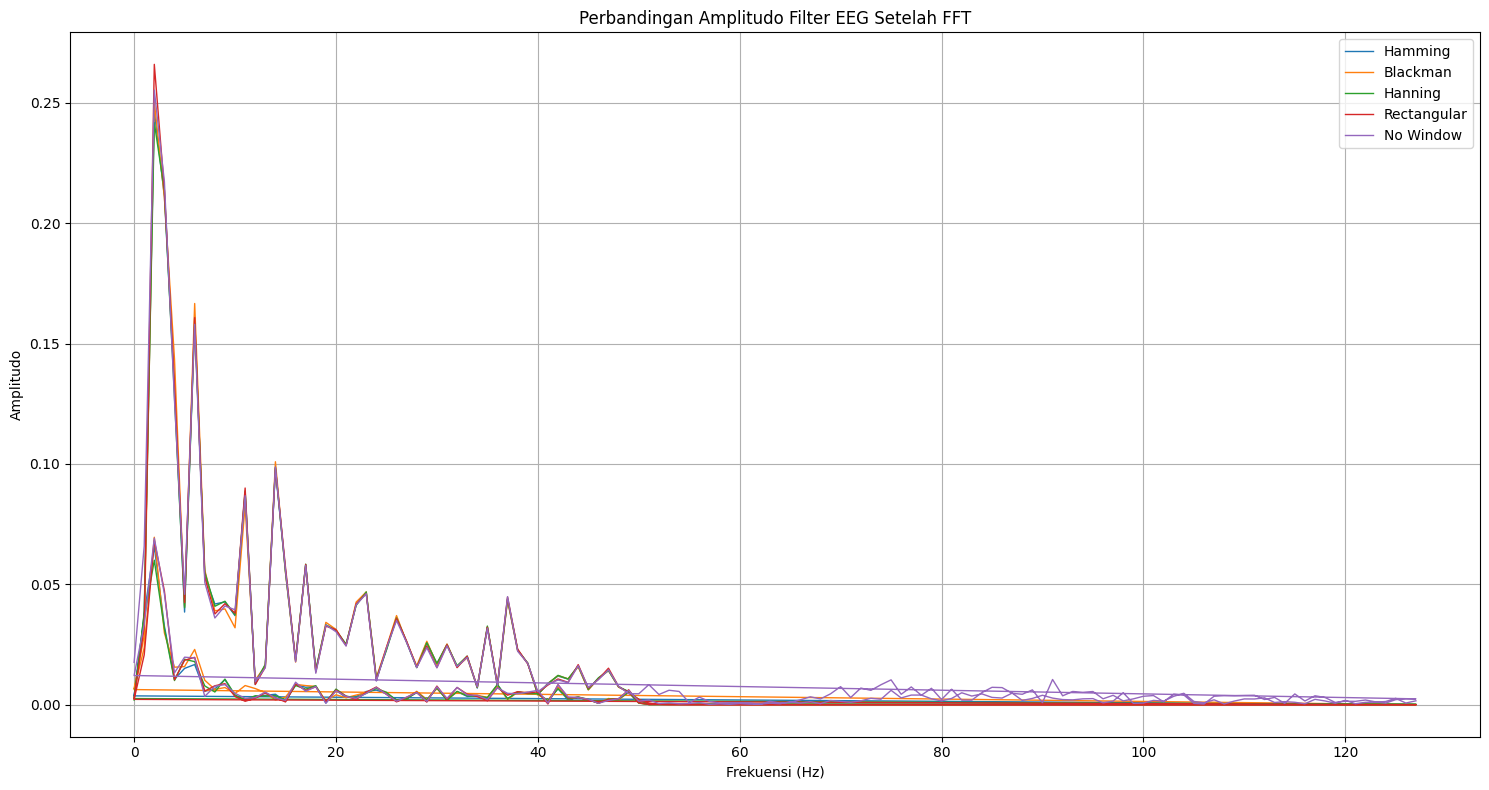

In [ ]:
import matplotlib.pyplot as plt

df_frekuensi_bulat = pd.read_excel('/content/drive/MyDrive/TA/GABUNGAN chb09_08.xlsx')


# Misalnya data hasil filter sudah dalam dataframe bernama df_frekuensi_bulat
plt.figure(figsize=(15, 8))

# Plot masing-masing kolom terhadap frekuensi
plt.plot(df_frekuensi_bulat['frekuensi'], df_frekuensi_bulat['FP1-F7 HAMMING'], label='Hamming', linewidth=1)
plt.plot(df_frekuensi_bulat['frekuensi'], df_frekuensi_bulat['FP1-F7 BLACKMAN'], label='Blackman', linewidth=1)
plt.plot(df_frekuensi_bulat['frekuensi'], df_frekuensi_bulat['FP1-F7 HANNING'], label='Hanning', linewidth=1)
plt.plot(df_frekuensi_bulat['frekuensi'], df_frekuensi_bulat['FP1-F7 RECTANGULAR'], label='Rectangular', linewidth=1)
plt.plot(df_frekuensi_bulat['frekuensi'], df_frekuensi_bulat['FP1-F7 NOFILTER'], label='No Window', linewidth=1)

# Tambahan konfigurasi tampilan
plt.title('Perbandingan Amplitudo Filter EEG Setelah FFT')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Baca data dari file
hanning = pd.read_excel('/content/drive/MyDrive/TA/GABUNGAN chb09_08.xlsx')

# Pisahkan kolom numerik EEG saja (tanpa 'frekuensi' dan 'seizure')
eeg_columns = hanning.drop(columns=["frekuensi", "seizure"]).columns

# Hitung statistik
mean_values = hanning[eeg_columns].mean()
max_values = hanning[eeg_columns].max()
min_values = hanning[eeg_columns].min()
std_values = hanning[eeg_columns].std()

# Hitung energi: jumlah kuadrat dari setiap kolom
energy_values = (hanning[eeg_columns] ** 2).sum()

# Gabungkan semua hasil dalam satu DataFrame
stats_hanning = pd.DataFrame({
    "Mean": mean_values,
    "Max": max_values,
    "Min": min_values,
    "Std": std_values,
    "Energy": energy_values
})

# Tampilkan hasil
print(stats_hanning)


                        Mean       Max       Min       Std    Energy
FP1-F7 NOFILTER     0.011079  0.255294  0.000155  0.027187  0.219894
FP1-F7 BLACKMAN     0.009314  0.250508  0.000043  0.027489  0.214896
FP1-F7 HANNING      0.009221  0.241759  0.000090  0.026864  0.205801
FP1-F7 HAMMING      0.009225  0.246629  0.000075  0.027099  0.209052
FP1-F7 RECTANGULAR  0.009280  0.265987  0.000012  0.027946  0.221195


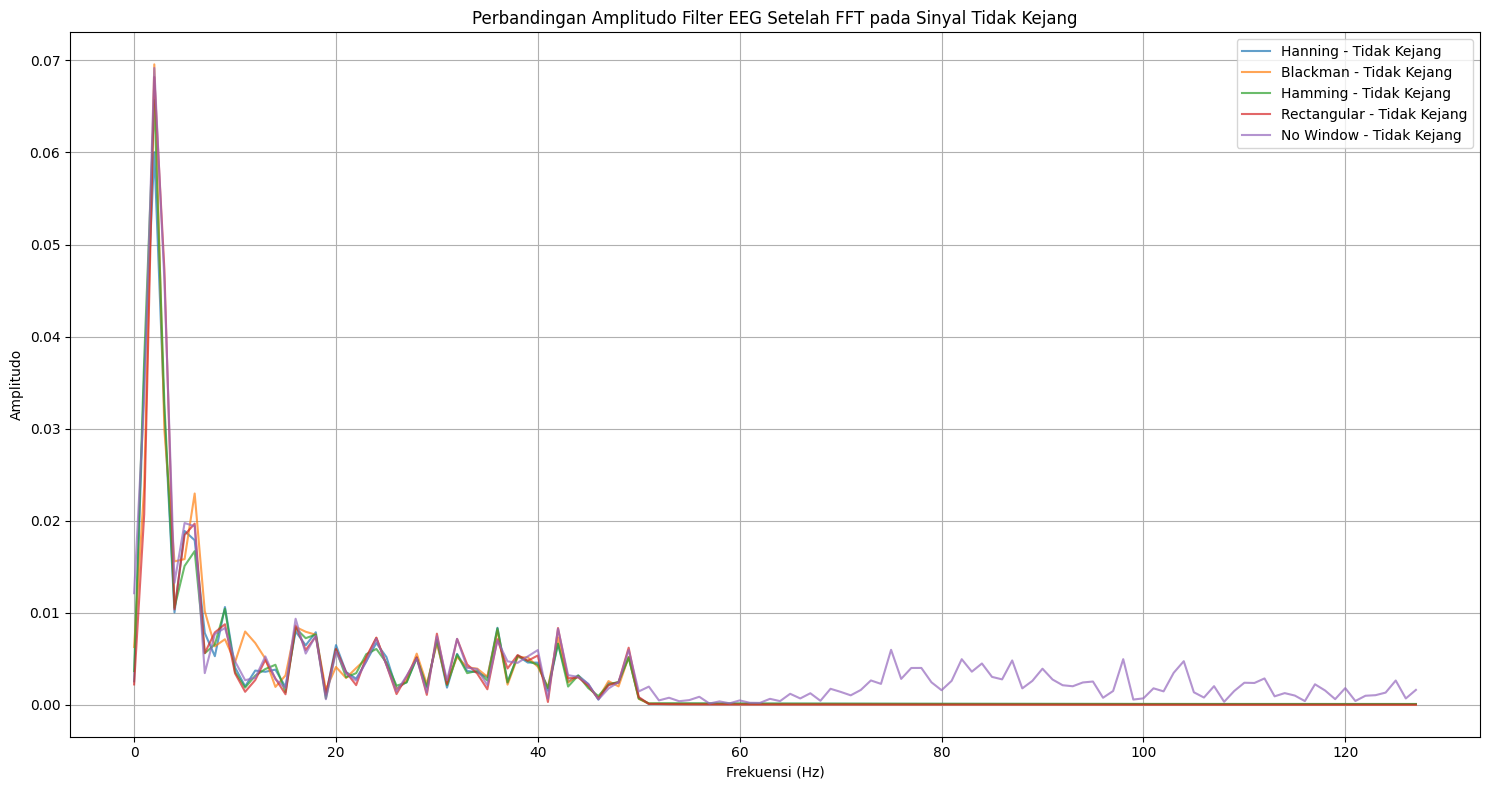

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df = pd.read_excel('/content/drive/MyDrive/TA/GABUNGAN chb09_08.xlsx')
df

# Memisahkan data berdasarkan kondisi kejang
df_kejang = df[df['seizure'] == 'kejang']
df_tidak_kejang = df[df['seizure'] == 'tidak kejang']

# Plotting
plt.figure(figsize=(15, 8))


# Visualisasi amplitudo untuk masing-masing window saat tidak kejang
plt.plot(df_tidak_kejang['frekuensi'], df_tidak_kejang['FP1-F7 HANNING'], label='Hanning - Tidak Kejang', alpha=0.7)
plt.plot(df_tidak_kejang['frekuensi'], df_tidak_kejang['FP1-F7 BLACKMAN'], label='Blackman - Tidak Kejang', alpha=0.7)
plt.plot(df_tidak_kejang['frekuensi'], df_tidak_kejang['FP1-F7 HAMMING'], label='Hamming - Tidak Kejang', alpha=0.7)
plt.plot(df_tidak_kejang['frekuensi'], df_tidak_kejang['FP1-F7 RECTANGULAR'], label='Rectangular - Tidak Kejang', alpha=0.7)
plt.plot(df_tidak_kejang['frekuensi'], df_tidak_kejang['FP1-F7 NOFILTER'], label='No Window - Tidak Kejang', alpha=0.7)

# Konfigurasi plot
plt.title('Perbandingan Amplitudo Filter EEG Setelah FFT pada Sinyal Tidak Kejang')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Baca data dari file
hanning = pd.read_excel('/content/drive/MyDrive/TA/GABUNGAN chb09_08.xlsx')

# Filter hanya baris dengan seizure == "tidak kejang"
hanning_tidak_kejang = hanning[hanning["seizure"] == "tidak kejang"]

# Pisahkan kolom numerik EEG saja (tanpa 'frekuensi' dan 'seizure')
eeg_columns = hanning_tidak_kejang.drop(columns=["frekuensi", "seizure"]).columns

# Hitung statistik
mean_values = hanning_tidak_kejang[eeg_columns].mean()
max_values = hanning_tidak_kejang[eeg_columns].max()
min_values = hanning_tidak_kejang[eeg_columns].min()
std_values = hanning_tidak_kejang[eeg_columns].std()

# Hitung energi: jumlah kuadrat dari setiap kolom
energy_values = (hanning_tidak_kejang[eeg_columns] ** 2).sum()

# Gabungkan semua hasil dalam satu DataFrame
stats_hanning = pd.DataFrame({
    "Mean": mean_values,
    "Max": max_values,
    "Min": min_values,
    "Std": std_values,
    "Energy": energy_values
})

# Tampilkan hasil
print(stats_hanning)


                        Mean       Max       Min       Std    Energy
FP1-F7 NOFILTER     0.004235  0.069178  0.000155  0.008056  0.010538
FP1-F7 BLACKMAN     0.003015  0.069573  0.000050  0.007587  0.008474
FP1-F7 HANNING      0.002887  0.060032  0.000090  0.007214  0.007676
FP1-F7 HAMMING      0.002918  0.065676  0.000105  0.007588  0.008403
FP1-F7 RECTANGULAR  0.002915  0.068188  0.000024  0.007982  0.009179


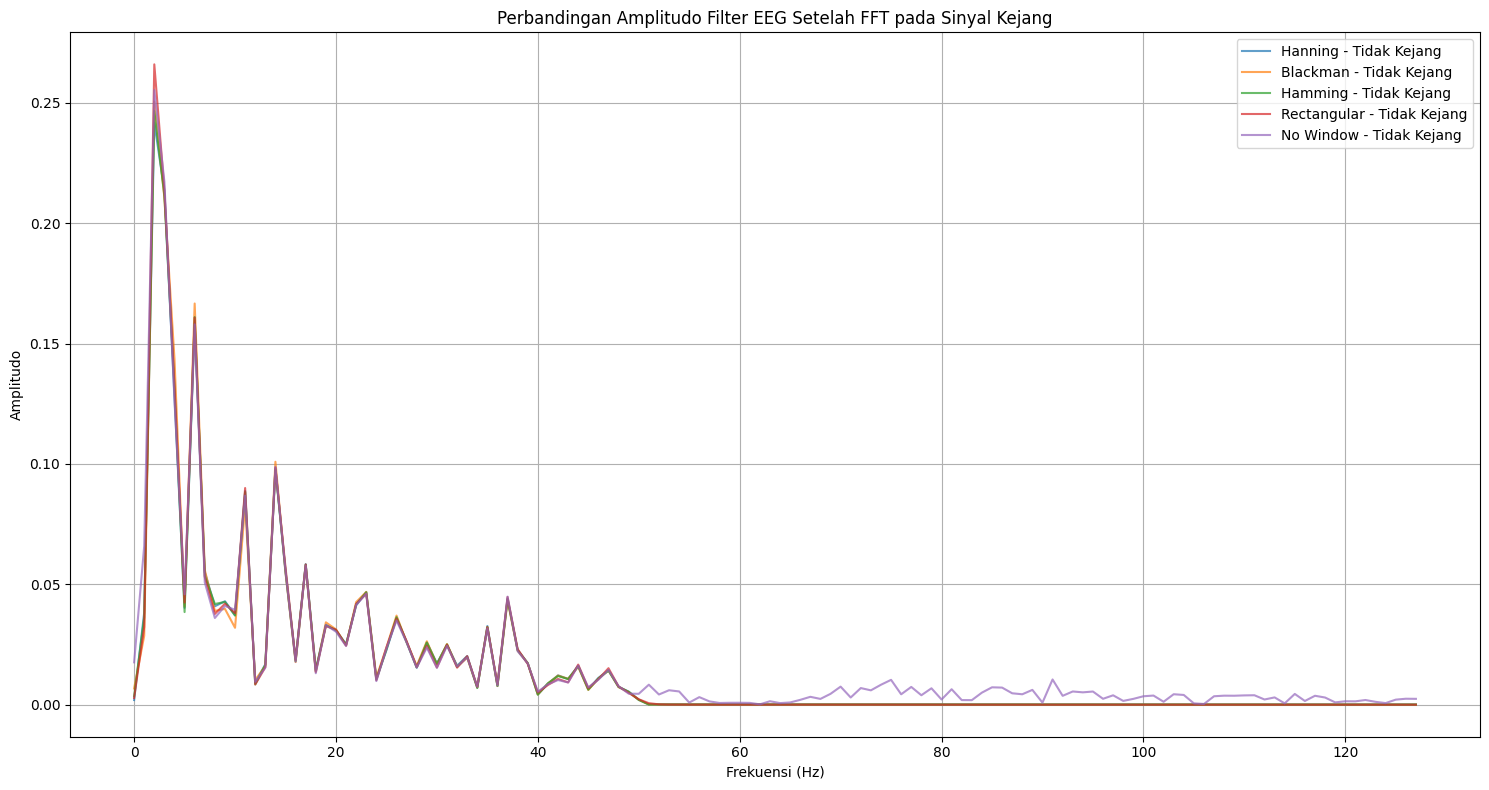

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya data sudah dimuat ke dalam df
df = pd.read_excel('/content/drive/MyDrive/TA/GABUNGAN chb09_08.xlsx')
df

# Memisahkan data berdasarkan kondisi kejang
df_kejang = df[df['seizure'] == 'kejang']
df_tidak_kejang = df[df['seizure'] == 'tidak kejang']

# Plotting
plt.figure(figsize=(15, 8))


# Visualisasi amplitudo untuk masing-masing window saat tidak kejang
plt.plot(df_kejang['frekuensi'], df_kejang['FP1-F7 HANNING'], label='Hanning - Tidak Kejang', alpha=0.7)
plt.plot(df_kejang['frekuensi'], df_kejang['FP1-F7 BLACKMAN'], label='Blackman - Tidak Kejang', alpha=0.7)
plt.plot(df_kejang['frekuensi'], df_kejang['FP1-F7 HAMMING'], label='Hamming - Tidak Kejang', alpha=0.7)
plt.plot(df_kejang['frekuensi'], df_kejang['FP1-F7 RECTANGULAR'], label='Rectangular - Tidak Kejang', alpha=0.7)
plt.plot(df_kejang['frekuensi'], df_kejang['FP1-F7 NOFILTER'], label='No Window - Tidak Kejang', alpha=0.7)

# Konfigurasi plot
plt.title('Perbandingan Amplitudo Filter EEG Setelah FFT pada Sinyal Kejang')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Baca data dari file
hanning = pd.read_excel("/content/drive/MyDrive/TA/GABUNGAN chb09_08.xlsx")

# Filter hanya baris dengan seizure == "kejang"
hanning_kejang = hanning[hanning["seizure"] == "kejang"]

# Pisahkan kolom numerik EEG saja (tanpa 'frekuensi' dan 'seizure')
eeg_columns = hanning_kejang.drop(columns=["frekuensi", "seizure"]).columns

# Hitung statistik
mean_values = hanning_kejang[eeg_columns].mean()
max_values = hanning_kejang[eeg_columns].max()
min_values = hanning_kejang[eeg_columns].min()
std_values = hanning_kejang[eeg_columns].std()

# Hitung energi: jumlah kuadrat dari setiap kolom
energy_values = (hanning_kejang[eeg_columns] ** 2).sum()

# Gabungkan semua hasil dalam satu DataFrame
stats_hanning = pd.DataFrame({
    "Mean": mean_values,
    "Max": max_values,
    "Min": min_values,
    "Std": std_values,
    "Energy": energy_values
})

# Tampilkan hasil
print(stats_hanning)


                        Mean       Max       Min       Std    Energy
FP1-F7 NOFILTER     0.017923  0.255294  0.000162  0.036397  0.209356
FP1-F7 BLACKMAN     0.015614  0.250508  0.000043  0.037144  0.206422
FP1-F7 HANNING      0.015555  0.241759  0.000104  0.036279  0.198125
FP1-F7 HAMMING      0.015532  0.246629  0.000075  0.036562  0.200649
FP1-F7 RECTANGULAR  0.015646  0.265987  0.000012  0.037719  0.212015


# rata-rata gelombang kejang & tidak kejang


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
import numpy as np

Mounted at /content/drive
/content/drive/MyDrive/TA


Rata-rata Amplitudo Delta (Kejang): 1.4248
Rata-rata Amplitudo Theta (Kejang): 0.7584
Rata-rata Amplitudo Alpha (Kejang): 0.4053
Rata-rata Amplitudo Beta (Kejang): 0.2246
Rata-rata Amplitudo Gamma (Kejang): 0.1454
Rata-rata Amplitudo Delta (Normal): 0.6452
Rata-rata Amplitudo Theta (Normal): 0.2746
Rata-rata Amplitudo Alpha (Normal): 0.1461
Rata-rata Amplitudo Beta (Normal): 0.1077
Rata-rata Amplitudo Gamma (Normal): 0.0894


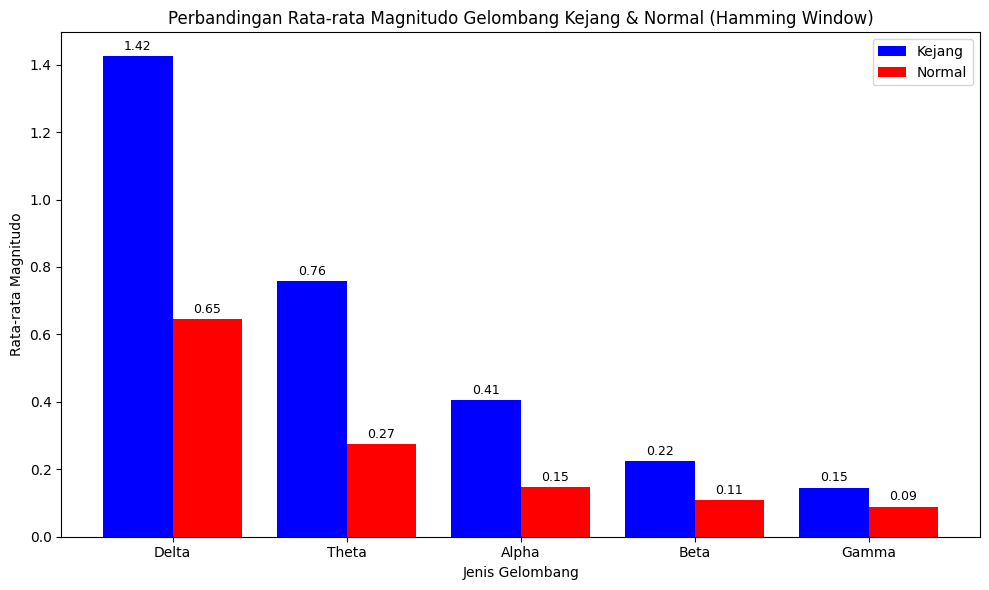

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_mean(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.mean(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai rata-rata untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_mean1 = {band: get_band_mean(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_mean2 = {band: get_band_mean(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, mean_val in band_mean1.items():
    print(f"Rata-rata Amplitudo {band} (Kejang): {mean_val:.4f}")
for band, mean_val in band_mean2.items():
    print(f"Rata-rata Amplitudo {band} (Normal): {mean_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Data bar
means_kejang = list(band_mean1.values())
means_normal = list(band_mean2.values())

# Plot bar
bars1 = plt.bar(index, means_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, means_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai rata-rata di atas bar
for i, val in enumerate(means_kejang):
    plt.text(i, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(means_normal):
    plt.text(i + bar_width, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan layout
plt.xlabel("Jenis Gelombang")
plt.ylabel("Rata-rata Magnitudo")
plt.title("Perbandingan Rata-rata Magnitudo Gelombang Kejang & Normal (Hamming Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()


Rata-rata Amplitudo Delta (Kejang): 1.4198
Rata-rata Amplitudo Theta (Kejang): 0.7585
Rata-rata Amplitudo Alpha (Kejang): 0.4054
Rata-rata Amplitudo Beta (Kejang): 0.2247
Rata-rata Amplitudo Gamma (Kejang): 0.1454
Rata-rata Amplitudo Delta (Normal): 0.6412
Rata-rata Amplitudo Theta (Normal): 0.2745
Rata-rata Amplitudo Alpha (Normal): 0.1460
Rata-rata Amplitudo Beta (Normal): 0.1077
Rata-rata Amplitudo Gamma (Normal): 0.0894


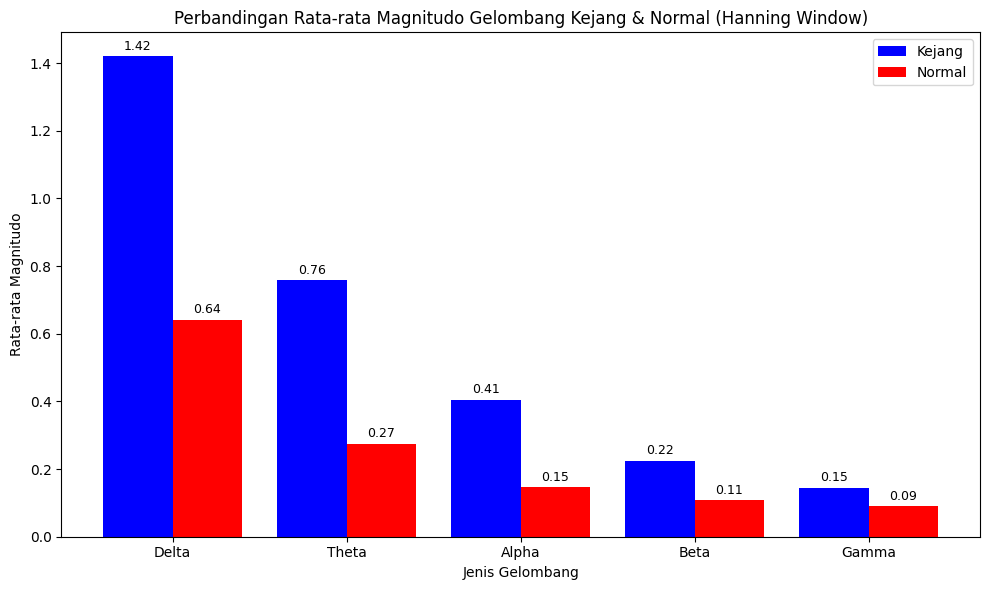

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_mean(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.mean(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai rata-rata untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_mean1 = {band: get_band_mean(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_mean2 = {band: get_band_mean(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, mean_val in band_mean1.items():
    print(f"Rata-rata Amplitudo {band} (Kejang): {mean_val:.4f}")
for band, mean_val in band_mean2.items():
    print(f"Rata-rata Amplitudo {band} (Normal): {mean_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Data bar
means_kejang = list(band_mean1.values())
means_normal = list(band_mean2.values())

# Plot bar
bars1 = plt.bar(index, means_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, means_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai rata-rata di atas bar
for i, val in enumerate(means_kejang):
    plt.text(i, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(means_normal):
    plt.text(i + bar_width, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan layout
plt.xlabel("Jenis Gelombang")
plt.ylabel("Rata-rata Magnitudo")
plt.title("Perbandingan Rata-rata Magnitudo Gelombang Kejang & Normal (Hanning Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()



Rata-rata Amplitudo Delta (Kejang): 1.4333
Rata-rata Amplitudo Theta (Kejang): 0.7667
Rata-rata Amplitudo Alpha (Kejang): 0.4090
Rata-rata Amplitudo Beta (Kejang): 0.2265
Rata-rata Amplitudo Gamma (Kejang): 0.1467
Rata-rata Amplitudo Delta (Normal): 0.6358
Rata-rata Amplitudo Theta (Normal): 0.2751
Rata-rata Amplitudo Alpha (Normal): 0.1463
Rata-rata Amplitudo Beta (Normal): 0.1085
Rata-rata Amplitudo Gamma (Normal): 0.0902


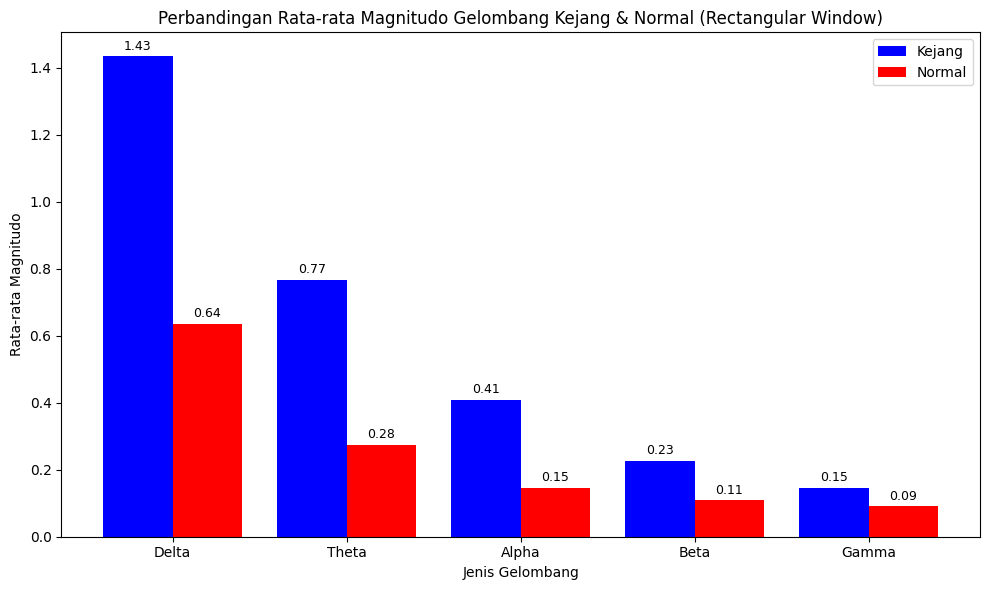

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_mean(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.mean(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai rata-rata untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_mean1 = {band: get_band_mean(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_mean2 = {band: get_band_mean(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, mean_val in band_mean1.items():
    print(f"Rata-rata Amplitudo {band} (Kejang): {mean_val:.4f}")
for band, mean_val in band_mean2.items():
    print(f"Rata-rata Amplitudo {band} (Normal): {mean_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Data bar
means_kejang = list(band_mean1.values())
means_normal = list(band_mean2.values())

# Plot bar
bars1 = plt.bar(index, means_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, means_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai rata-rata di atas bar
for i, val in enumerate(means_kejang):
    plt.text(i, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(means_normal):
    plt.text(i + bar_width, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan layout
plt.xlabel("Jenis Gelombang")
plt.ylabel("Rata-rata Magnitudo")
plt.title("Perbandingan Rata-rata Magnitudo Gelombang Kejang & Normal (Rectangular Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()



Rata-rata Amplitudo Delta (Kejang): 1.4273
Rata-rata Amplitudo Theta (Kejang): 0.7566
Rata-rata Amplitudo Alpha (Kejang): 0.4047
Rata-rata Amplitudo Beta (Kejang): 0.2244
Rata-rata Amplitudo Gamma (Kejang): 0.1454
Rata-rata Amplitudo Delta (Normal): 0.6611
Rata-rata Amplitudo Theta (Normal): 0.2791
Rata-rata Amplitudo Alpha (Normal): 0.1477
Rata-rata Amplitudo Beta (Normal): 0.1080
Rata-rata Amplitudo Gamma (Normal): 0.0894


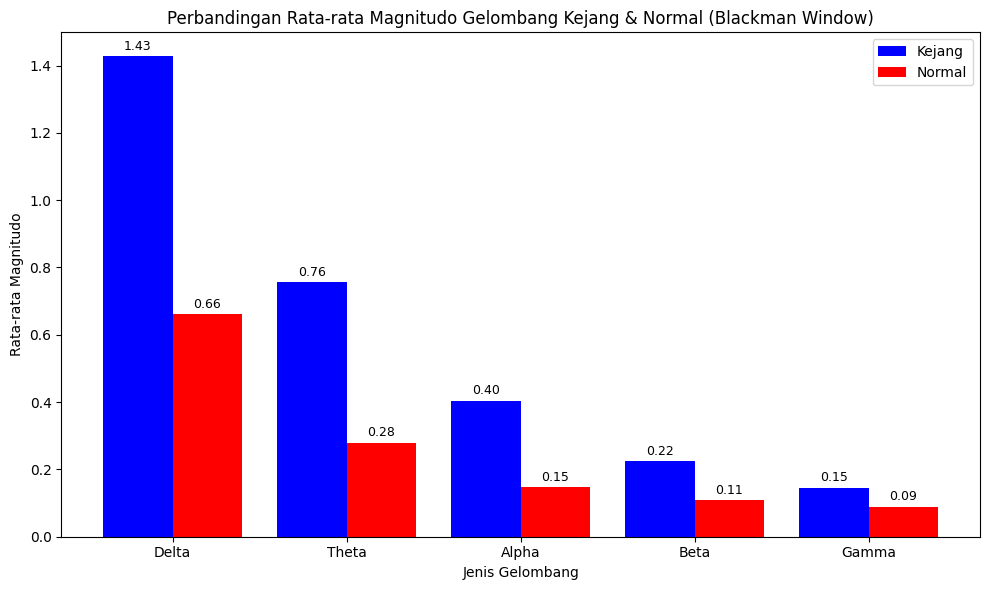

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_mean(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.mean(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai rata-rata untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_mean1 = {band: get_band_mean(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_mean2 = {band: get_band_mean(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, mean_val in band_mean1.items():
    print(f"Rata-rata Amplitudo {band} (Kejang): {mean_val:.4f}")
for band, mean_val in band_mean2.items():
    print(f"Rata-rata Amplitudo {band} (Normal): {mean_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Data bar
means_kejang = list(band_mean1.values())
means_normal = list(band_mean2.values())

# Plot bar
bars1 = plt.bar(index, means_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, means_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai rata-rata di atas bar
for i, val in enumerate(means_kejang):
    plt.text(i, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(means_normal):
    plt.text(i + bar_width, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan layout
plt.xlabel("Jenis Gelombang")
plt.ylabel("Rata-rata Magnitudo")
plt.title("Perbandingan Rata-rata Magnitudo Gelombang Kejang & Normal (Blackman Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()



# maksimal gelombang kejang & tidak kejang

Nilai Maksimum Delta (Kejang): 9.5909
Nilai Maksimum Theta (Kejang): 7.1768
Nilai Maksimum Alpha (Kejang): 3.0841
Nilai Maksimum Beta (Kejang): 1.7883
Nilai Maksimum Gamma (Kejang): 1.4260
Nilai Maksimum Delta (Normal): 3.2319
Nilai Maksimum Theta (Normal): 1.5448
Nilai Maksimum Alpha (Normal): 0.9621
Nilai Maksimum Beta (Normal): 0.8806
Nilai Maksimum Gamma (Normal): 0.9284


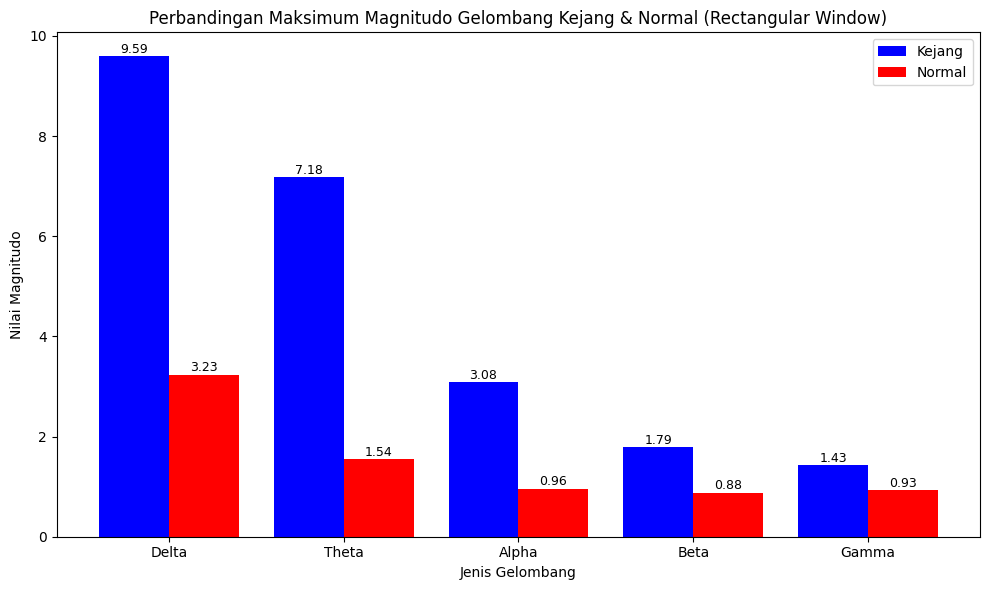

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_max(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.max(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai maksimum untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_max1 = {band: get_band_max(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_max2 = {band: get_band_max(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, max_val in band_max1.items():
    print(f"Nilai Maksimum {band} (Kejang): {max_val:.4f}")
for band, max_val in band_max2.items():
    print(f"Nilai Maksimum {band} (Normal): {max_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Data bar
max_kejang = list(band_max1.values())
max_normal = list(band_max2.values())

# Plot bar
bars1 = plt.bar(index, max_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, max_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai rata-rata di atas bar
for i, val in enumerate(max_kejang):
    plt.text(i, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(max_normal):
    plt.text(i + bar_width, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan layout
plt.xlabel("Jenis Gelombang")
plt.ylabel("Nilai Maksimum Magnitudo")
plt.title("Perbandingan Maksimum Magnitudo Gelombang Kejang & Normal (Rectangular Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()



Nilai Maksimum Delta (Kejang): 8.9406
Nilai Maksimum Theta (Kejang): 7.0413
Nilai Maksimum Alpha (Kejang): 3.0180
Nilai Maksimum Beta (Kejang): 1.7675
Nilai Maksimum Gamma (Kejang): 1.4037
Nilai Maksimum Delta (Normal): 3.3284
Nilai Maksimum Theta (Normal): 1.5116
Nilai Maksimum Alpha (Normal): 0.9459
Nilai Maksimum Beta (Normal): 0.8785
Nilai Maksimum Gamma (Normal): 0.9433


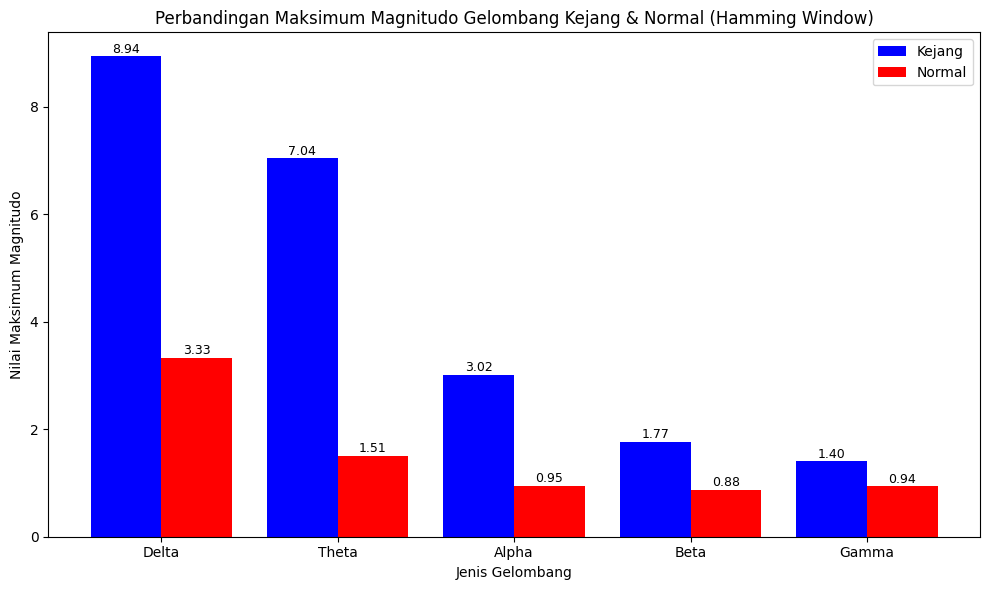

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_max(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.max(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai maksimum untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_max1 = {band: get_band_max(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_max2 = {band: get_band_max(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, max_val in band_max1.items():
    print(f"Nilai Maksimum {band} (Kejang): {max_val:.4f}")
for band, max_val in band_max2.items():
    print(f"Nilai Maksimum {band} (Normal): {max_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Data bar
max_kejang = list(band_max1.values())
max_normal = list(band_max2.values())

# Plot bar
bars1 = plt.bar(index, max_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, max_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai rata-rata di atas bar
for i, val in enumerate(max_kejang):
    plt.text(i, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(max_normal):
    plt.text(i + bar_width, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan layout
plt.xlabel("Jenis Gelombang")
plt.ylabel("Nilai Maksimum Magnitudo")
plt.title("Perbandingan Maksimum Magnitudo Gelombang Kejang & Normal (Hamming Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()



Nilai Maksimum Delta (Kejang): 8.9384
Nilai Maksimum Theta (Kejang): 7.0297
Nilai Maksimum Alpha (Kejang): 3.0141
Nilai Maksimum Beta (Kejang): 1.7595
Nilai Maksimum Gamma (Kejang): 1.4042
Nilai Maksimum Delta (Normal): 3.3359
Nilai Maksimum Theta (Normal): 1.4808
Nilai Maksimum Alpha (Normal): 0.9441
Nilai Maksimum Beta (Normal): 0.8815
Nilai Maksimum Gamma (Normal): 0.9393


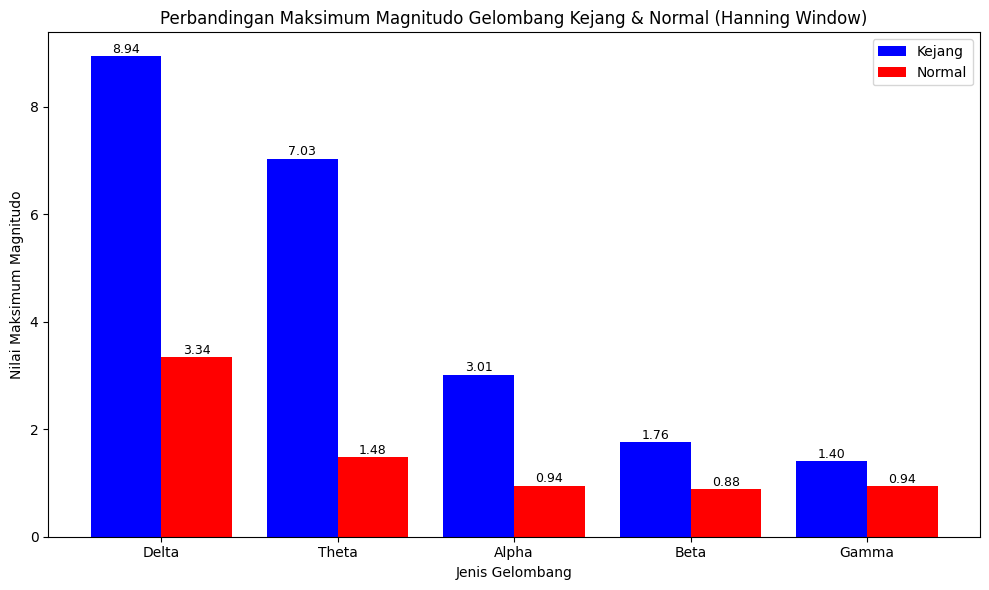

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_max(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.max(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai maksimum untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_max1 = {band: get_band_max(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_max2 = {band: get_band_max(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, max_val in band_max1.items():
    print(f"Nilai Maksimum {band} (Kejang): {max_val:.4f}")
for band, max_val in band_max2.items():
    print(f"Nilai Maksimum {band} (Normal): {max_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Data bar
max_kejang = list(band_max1.values())
max_normal = list(band_max2.values())

# Plot bar
bars1 = plt.bar(index, max_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, max_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai rata-rata di atas bar
for i, val in enumerate(max_kejang):
    plt.text(i, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(max_normal):
    plt.text(i + bar_width, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan layout
plt.xlabel("Jenis Gelombang")
plt.ylabel("Nilai Maksimum Magnitudo")
plt.title("Perbandingan Maksimum Magnitudo Gelombang Kejang & Normal (Hanning Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()



Nilai Maksimum Delta (Kejang): 9.1190
Nilai Maksimum Theta (Kejang): 7.0673
Nilai Maksimum Alpha (Kejang): 3.0316
Nilai Maksimum Beta (Kejang): 1.7549
Nilai Maksimum Gamma (Kejang): 1.4044
Nilai Maksimum Delta (Normal): 3.4493
Nilai Maksimum Theta (Normal): 1.5401
Nilai Maksimum Alpha (Normal): 0.9083
Nilai Maksimum Beta (Normal): 0.8773
Nilai Maksimum Gamma (Normal): 0.9666


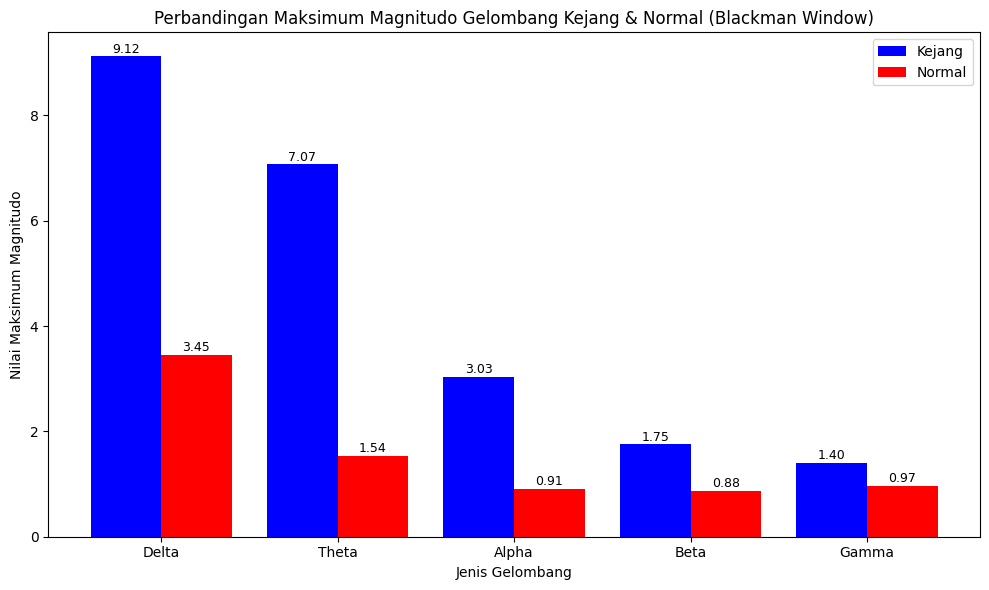

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_max(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.max(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai maksimum untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_max1 = {band: get_band_max(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_max2 = {band: get_band_max(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, max_val in band_max1.items():
    print(f"Nilai Maksimum {band} (Kejang): {max_val:.4f}")
for band, max_val in band_max2.items():
    print(f"Nilai Maksimum {band} (Normal): {max_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Data bar
max_kejang = list(band_max1.values())
max_normal = list(band_max2.values())

# Plot bar
bars1 = plt.bar(index, max_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, max_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai rata-rata di atas bar
for i, val in enumerate(max_kejang):
    plt.text(i, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(max_normal):
    plt.text(i + bar_width, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan layout
plt.xlabel("Jenis Gelombang")
plt.ylabel("Nilai Maksimum Magnitudo")
plt.title("Perbandingan Maksimum Magnitudo Gelombang Kejang & Normal (Blackman Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()



# minimum gelombang kejang & tidak kejang

Nilai Minimum Delta (Kejang): 0.0313
Nilai Minimum Theta (Kejang): 0.0345
Nilai Minimum Alpha (Kejang): 0.0163
Nilai Minimum Beta (Kejang): 0.0064
Nilai Minimum Gamma (Kejang): 0.0014
Nilai Minimum Delta (Normal): 0.0351
Nilai Minimum Theta (Normal): 0.0241
Nilai Minimum Alpha (Normal): 0.0116
Nilai Minimum Beta (Normal): 0.0050
Nilai Minimum Gamma (Normal): 0.0012


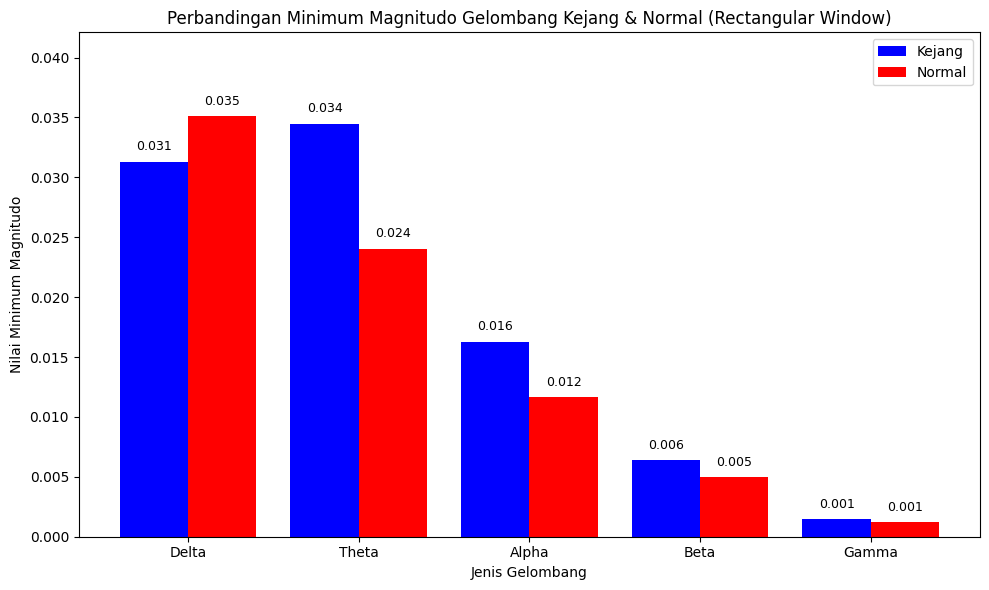

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_min(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.min(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai minimum untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_min1 = {band: get_band_min(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_min2 = {band: get_band_min(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, min_val in band_min1.items():
    print(f"Nilai Minimum {band} (Kejang): {min_val:.4f}")
for band, min_val in band_min2.items():
    print(f"Nilai Minimum {band} (Normal): {min_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Data bar
min_kejang = list(band_min1.values())
min_normal = list(band_min2.values())

# Hitung batas atas untuk sumbu Y (10% lebih tinggi dari nilai tertinggi)
max_val = max(max(min_kejang), max(min_normal))
plt.ylim(0, max_val * 1.2)  # Tambah ruang agar teks tidak keluar

# Plot bar
bars1 = plt.bar(index, min_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, min_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai di atas bar
for i, val in enumerate(min_kejang):
    plt.text(i, val + max_val * 0.02, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(min_normal):
    plt.text(i + bar_width, val + max_val * 0.02, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

# Label dan layout
plt.xlabel("Jenis Gelombang")
plt.ylabel("Nilai Minimum Magnitudo")
plt.title("Perbandingan Minimum Magnitudo Gelombang Kejang & Normal (Rectangular Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()



Nilai Minimum Delta (Kejang): 0.0313
Nilai Minimum Theta (Kejang): 0.0345
Nilai Minimum Alpha (Kejang): 0.0163
Nilai Minimum Beta (Kejang): 0.0064
Nilai Minimum Gamma (Kejang): 0.0014
Nilai Minimum Delta (Normal): 0.0351
Nilai Minimum Theta (Normal): 0.0241
Nilai Minimum Alpha (Normal): 0.0116
Nilai Minimum Beta (Normal): 0.0050
Nilai Minimum Gamma (Normal): 0.0012

Nilai Minimum Delta (Kejang): 0.0401
Nilai Minimum Theta (Kejang): 0.0347
Nilai Minimum Alpha (Kejang): 0.0150
Nilai Minimum Beta (Kejang): 0.0056
Nilai Minimum Gamma (Kejang): 0.0016
Nilai Minimum Delta (Normal): 0.0395
Nilai Minimum Theta (Normal): 0.0231
Nilai Minimum Alpha (Normal): 0.0121
Nilai Minimum Beta (Normal): 0.0047
Nilai Minimum Gamma (Normal): 0.0014


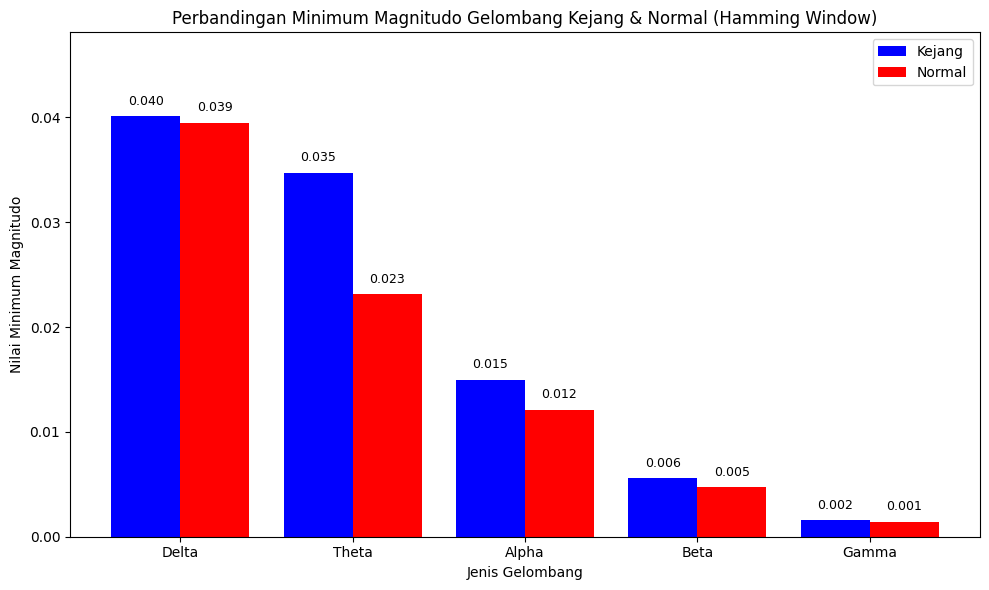

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_min(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.min(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai minimum untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_min1 = {band: get_band_min(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_min2 = {band: get_band_min(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, min_val in band_min1.items():
    print(f"Nilai Minimum {band} (Kejang): {min_val:.4f}")
for band, min_val in band_min2.items():
    print(f"Nilai Minimum {band} (Normal): {min_val:.4f}")


# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Data bar
min_kejang = list(band_min1.values())
min_normal = list(band_min2.values())

# Hitung batas atas untuk sumbu Y (10% lebih tinggi dari nilai tertinggi)
max_val = max(max(min_kejang), max(min_normal))
plt.ylim(0, max_val * 1.2)  # Tambah ruang agar teks tidak keluar

# Plot bar
bars1 = plt.bar(index, min_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, min_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai di atas bar
for i, val in enumerate(min_kejang):
    plt.text(i, val + max_val * 0.02, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(min_normal):
    plt.text(i + bar_width, val + max_val * 0.02, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

# Label dan layout
plt.xlabel("Jenis Gelombang")
plt.ylabel("Nilai Minimum Magnitudo")
plt.title("Perbandingan Minimum Magnitudo Gelombang Kejang & Normal (Hamming Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()




Nilai Minimum Delta (Kejang): 0.0383
Nilai Minimum Theta (Kejang): 0.0358
Nilai Minimum Alpha (Kejang): 0.0154
Nilai Minimum Beta (Kejang): 0.0060
Nilai Minimum Gamma (Kejang): 0.0015
Nilai Minimum Delta (Normal): 0.0357
Nilai Minimum Theta (Normal): 0.0236
Nilai Minimum Alpha (Normal): 0.0121
Nilai Minimum Beta (Normal): 0.0052
Nilai Minimum Gamma (Normal): 0.0014


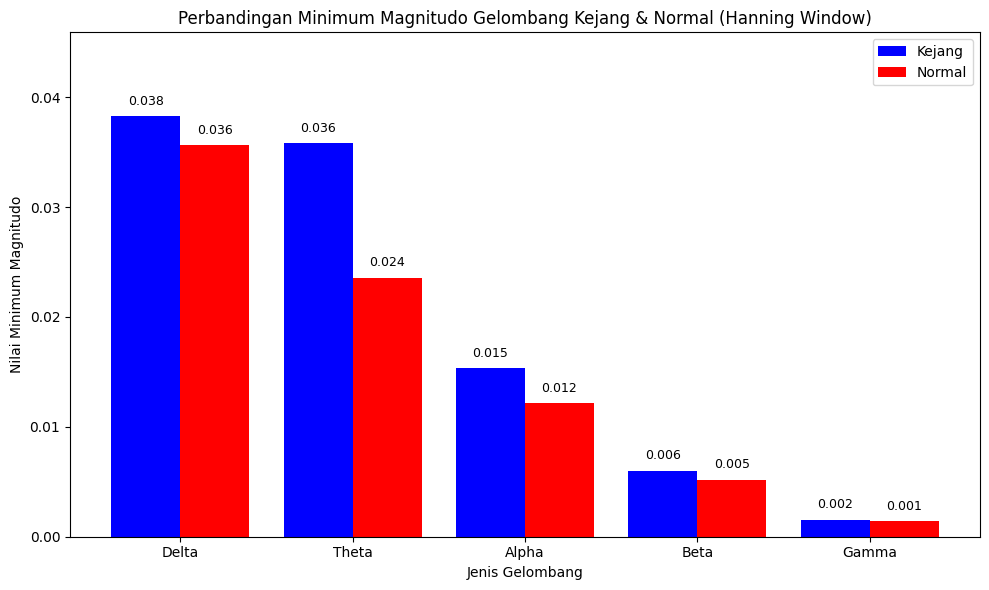

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_min(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.min(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai minimum untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_min1 = {band: get_band_min(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_min2 = {band: get_band_min(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, min_val in band_min1.items():
    print(f"Nilai Minimum {band} (Kejang): {min_val:.4f}")
for band, min_val in band_min2.items():
    print(f"Nilai Minimum {band} (Normal): {min_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Data bar
min_kejang = list(band_min1.values())
min_normal = list(band_min2.values())

# Hitung batas atas untuk sumbu Y (10% lebih tinggi dari nilai tertinggi)
max_val = max(max(min_kejang), max(min_normal))
plt.ylim(0, max_val * 1.2)  # Tambah ruang agar teks tidak keluar

# Plot bar
bars1 = plt.bar(index, min_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, min_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai di atas bar
for i, val in enumerate(min_kejang):
    plt.text(i, val + max_val * 0.02, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(min_normal):
    plt.text(i + bar_width, val + max_val * 0.02, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

# Label dan layout
plt.xlabel("Jenis Gelombang")
plt.ylabel("Nilai Minimum Magnitudo")
plt.title("Perbandingan Minimum Magnitudo Gelombang Kejang & Normal (Hanning Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()




Nilai Minimum Delta (Kejang): 0.0349
Nilai Minimum Theta (Kejang): 0.0382
Nilai Minimum Alpha (Kejang): 0.0157
Nilai Minimum Beta (Kejang): 0.0059
Nilai Minimum Gamma (Kejang): 0.0016
Nilai Minimum Delta (Normal): 0.0398
Nilai Minimum Theta (Normal): 0.0170
Nilai Minimum Alpha (Normal): 0.0128
Nilai Minimum Beta (Normal): 0.0048
Nilai Minimum Gamma (Normal): 0.0015


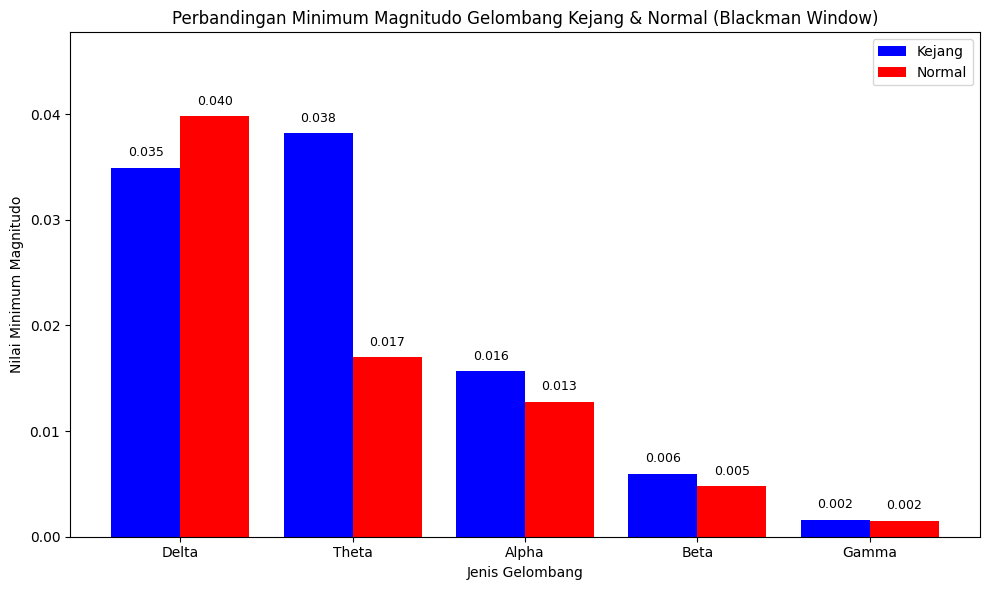

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_min(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.min(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai minimum untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_min1 = {band: get_band_min(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_min2 = {band: get_band_min(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, min_val in band_min1.items():
    print(f"Nilai Minimum {band} (Kejang): {min_val:.4f}")
for band, min_val in band_min2.items():
    print(f"Nilai Minimum {band} (Normal): {min_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Data bar
min_kejang = list(band_min1.values())
min_normal = list(band_min2.values())

# Hitung batas atas untuk sumbu Y (10% lebih tinggi dari nilai tertinggi)
max_val = max(max(min_kejang), max(min_normal))
plt.ylim(0, max_val * 1.2)  # Tambah ruang agar teks tidak keluar

# Plot bar
bars1 = plt.bar(index, min_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, min_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai di atas bar
for i, val in enumerate(min_kejang):
    plt.text(i, val + max_val * 0.02, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(min_normal):
    plt.text(i + bar_width, val + max_val * 0.02, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

# Label dan layout
plt.xlabel("Jenis Gelombang")
plt.ylabel("Nilai Minimum Magnitudo")
plt.title("Perbandingan Minimum Magnitudo Gelombang Kejang & Normal (Blackman Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()


# total gelombang kejang dan tidak kejang

Total Amplitudo Delta (Kejang): 47401.0391
Total Amplitudo Theta (Kejang): 33808.9945
Total Amplitudo Alpha (Kejang): 22542.6328
Total Amplitudo Beta (Kejang): 42450.6605
Total Amplitudo Gamma (Kejang): 32329.4771
Total Amplitudo Delta (Normal): 20907.5366
Total Amplitudo Theta (Normal): 12056.4822
Total Amplitudo Alpha (Normal): 8016.2657
Total Amplitudo Beta (Normal): 20230.2783
Total Amplitudo Gamma (Normal): 19800.3967


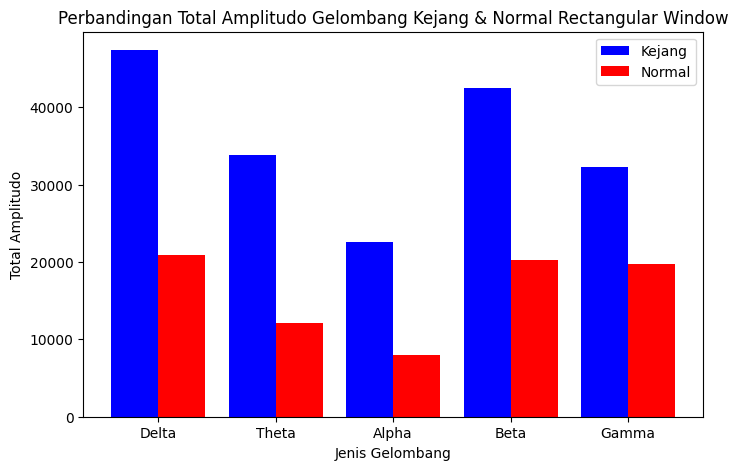

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_total(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.sum(amplitudes[mask]) if np.any(mask) else 0

# Menghitung total amplitudo untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_total1 = {band: get_band_total(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_total2 = {band: get_band_total(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, total_val in band_total1.items():
    print(f"Total Amplitudo {band} (Kejang): {total_val:.4f}")
for band, total_val in band_total2.items():
    print(f"Total Amplitudo {band} (Normal): {total_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_total1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_total2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Total Amplitudo")
plt.title("Perbandingan Total Amplitudo Gelombang Kejang & Normal Rectangular Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


Total Amplitudo Delta (Kejang): 47108.1182
Total Amplitudo Theta (Kejang): 33436.3475
Total Amplitudo Alpha (Kejang): 22332.2594
Total Amplitudo Beta (Kejang): 42087.4576
Total Amplitudo Gamma (Kejang): 32051.6424
Total Amplitudo Delta (Normal): 21225.7054
Total Amplitudo Theta (Normal): 12040.0795
Total Amplitudo Alpha (Normal): 8005.6009
Total Amplitudo Beta (Normal): 20083.4813
Total Amplitudo Gamma (Normal): 19631.4241


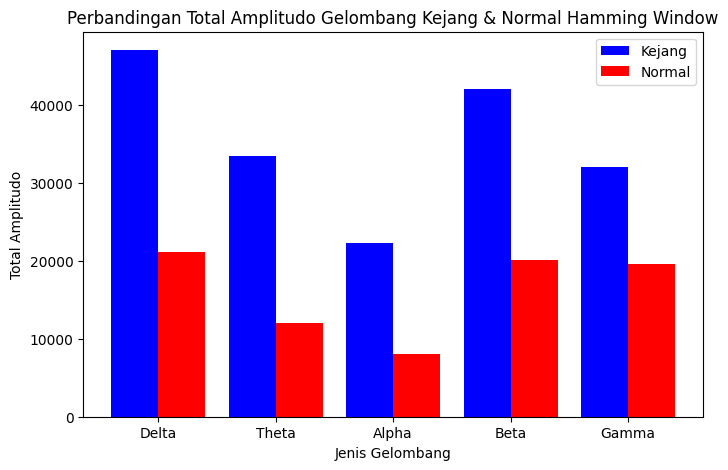

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_total(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.sum(amplitudes[mask]) if np.any(mask) else 0

# Menghitung total amplitudo untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_total1 = {band: get_band_total(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_total2 = {band: get_band_total(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, total_val in band_total1.items():
    print(f"Total Amplitudo {band} (Kejang): {total_val:.4f}")
for band, total_val in band_total2.items():
    print(f"Total Amplitudo {band} (Normal): {total_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_total1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_total2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Total Amplitudo")
plt.title("Perbandingan Total Amplitudo Gelombang Kejang & Normal Hamming Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


Total Amplitudo Delta (Kejang): 46955.6916
Total Amplitudo Theta (Kejang): 33448.3432
Total Amplitudo Alpha (Kejang): 22339.9005
Total Amplitudo Beta (Kejang): 42101.8100
Total Amplitudo Gamma (Kejang): 32054.6163
Total Amplitudo Delta (Normal): 21090.6936
Total Amplitudo Theta (Normal): 12033.3653
Total Amplitudo Alpha (Normal): 8002.7473
Total Amplitudo Beta (Normal): 20084.4248
Total Amplitudo Gamma (Normal): 19628.7660


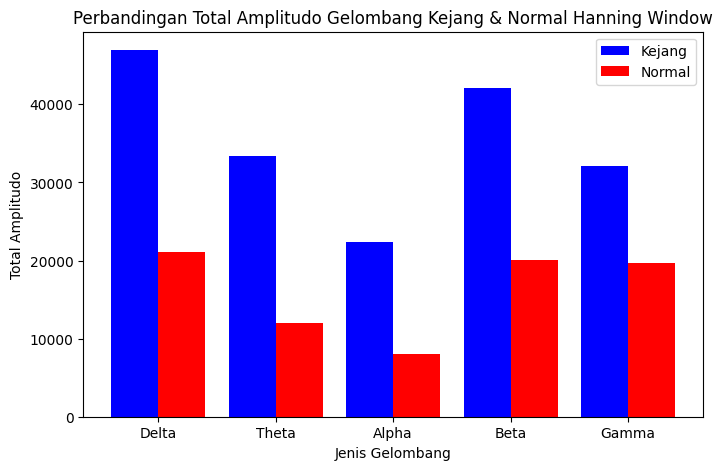

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_total(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.sum(amplitudes[mask]) if np.any(mask) else 0

# Menghitung total amplitudo untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_total1 = {band: get_band_total(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_total2 = {band: get_band_total(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, total_val in band_total1.items():
    print(f"Total Amplitudo {band} (Kejang): {total_val:.4f}")
for band, total_val in band_total2.items():
    print(f"Total Amplitudo {band} (Normal): {total_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_total1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_total2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Total Amplitudo")
plt.title("Perbandingan Total Amplitudo Gelombang Kejang & Normal Hanning Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


Total Amplitudo Delta (Kejang): 47201.6715
Total Amplitudo Theta (Kejang): 33361.3500
Total Amplitudo Alpha (Kejang): 22302.6139
Total Amplitudo Beta (Kejang): 42052.8149
Total Amplitudo Gamma (Kejang): 32039.3972
Total Amplitudo Delta (Normal): 21744.2462
Total Amplitudo Theta (Normal): 12234.8952
Total Amplitudo Alpha (Normal): 8098.4021
Total Amplitudo Beta (Normal): 20133.6465
Total Amplitudo Gamma (Normal): 19619.4739


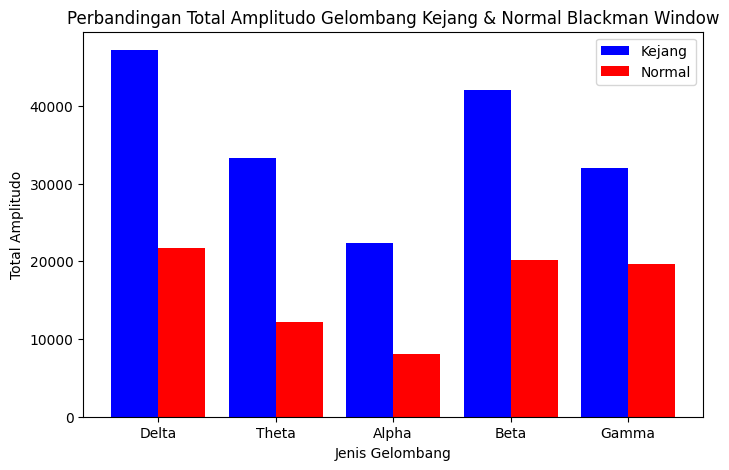

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_total(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.sum(amplitudes[mask]) if np.any(mask) else 0

# Menghitung total amplitudo untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_total1 = {band: get_band_total(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_total2 = {band: get_band_total(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, total_val in band_total1.items():
    print(f"Total Amplitudo {band} (Kejang): {total_val:.4f}")
for band, total_val in band_total2.items():
    print(f"Total Amplitudo {band} (Normal): {total_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(bands))

plt.bar(index, band_total1.values(), bar_width, label='Kejang', color='blue')
plt.bar(index + bar_width, band_total2.values(), bar_width, label='Normal', color='red')

plt.xlabel("Jenis Gelombang")
plt.ylabel("Total Amplitudo")
plt.title("Perbandingan Total Amplitudo Gelombang Kejang & Normal Blackman Window")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.show()


# energi gelombang kejang dan tidak kejang

Energi Delta (Kejang): 130064.0236
Energi Theta (Kejang): 54820.2787
Energi Alpha (Kejang): 19730.7025
Energi Beta (Kejang): 19635.0117
Energi Gamma (Kejang): 10113.4104
Energi Delta (Normal): 20275.2054
Energi Theta (Normal): 5054.3484
Energi Alpha (Normal): 1729.4434
Energi Beta (Normal): 3525.4265
Energi Gamma (Normal): 3465.8850


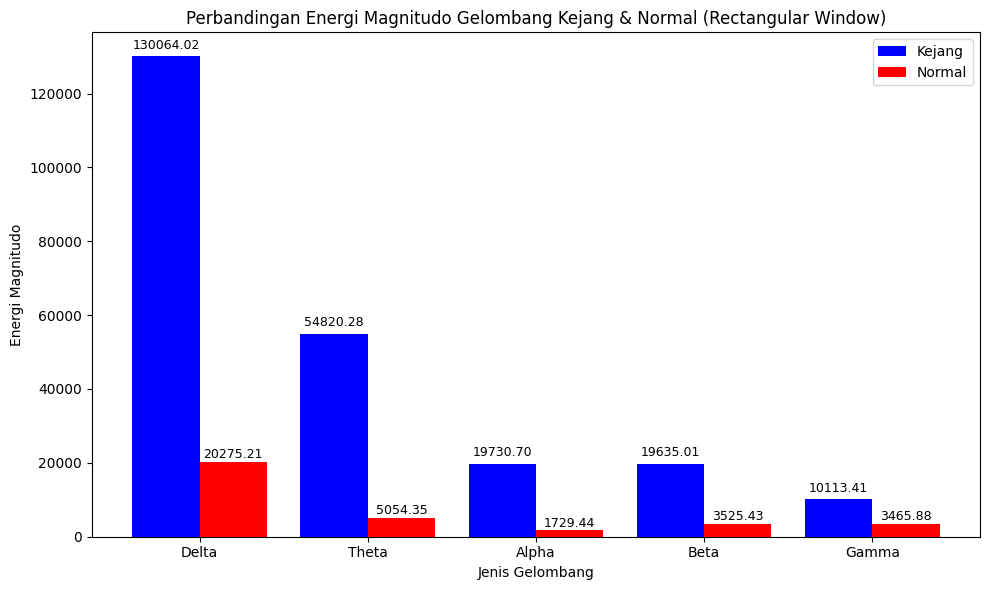

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_energy(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.sum(amplitudes[mask]**2)  # Menghitung energi

# Menghitung energi untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_energies1 = {band: get_band_energy(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_energies2 = {band: get_band_energy(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, energy in band_energies1.items():
    print(f"Energi {band} (Kejang): {energy:.4f}")
for band, energy in band_energies2.items():
    print(f"Energi {band} (Normal): {energy:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Ambil nilai energi dalam list
energi_kejang = list(band_energies1.values())
energi_normal = list(band_energies2.values())

# Plot bar
bars1 = plt.bar(index, energi_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, energi_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai energi di atas bar
for i, val in enumerate(energi_kejang):
    plt.text(i, val + max(energi_kejang)*0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(energi_normal):
    plt.text(i + bar_width, val + max(energi_normal)*0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan tampilan
plt.xlabel("Jenis Gelombang")
plt.ylabel("Energi Magnitudo")
plt.title("Perbandingan Energi Magnitudo Gelombang Kejang & Normal (Rectangular Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()


Energi Delta (Kejang): 130088.1135
Energi Theta (Kejang): 54829.4183
Energi Alpha (Kejang): 19733.0215
Energi Beta (Kejang): 19637.9037
Energi Gamma (Kejang): 10114.2385
Energi Delta (Normal): 20218.2717
Energi Theta (Normal): 5039.1677
Energi Alpha (Normal): 1725.1726
Energi Beta (Normal): 3517.5154
Energi Gamma (Normal): 3459.6944

Energi Delta (Kejang): 127706.9429
Energi Theta (Kejang): 53542.9361
Energi Alpha (Kejang): 19353.9118
Energi Beta (Kejang): 19307.4479
Energi Gamma (Kejang): 9945.0944
Energi Delta (Normal): 20823.7651
Energi Theta (Normal): 5007.1708
Energi Alpha (Normal): 1722.7568
Energi Beta (Normal): 3477.7979
Energi Gamma (Normal): 3402.1716


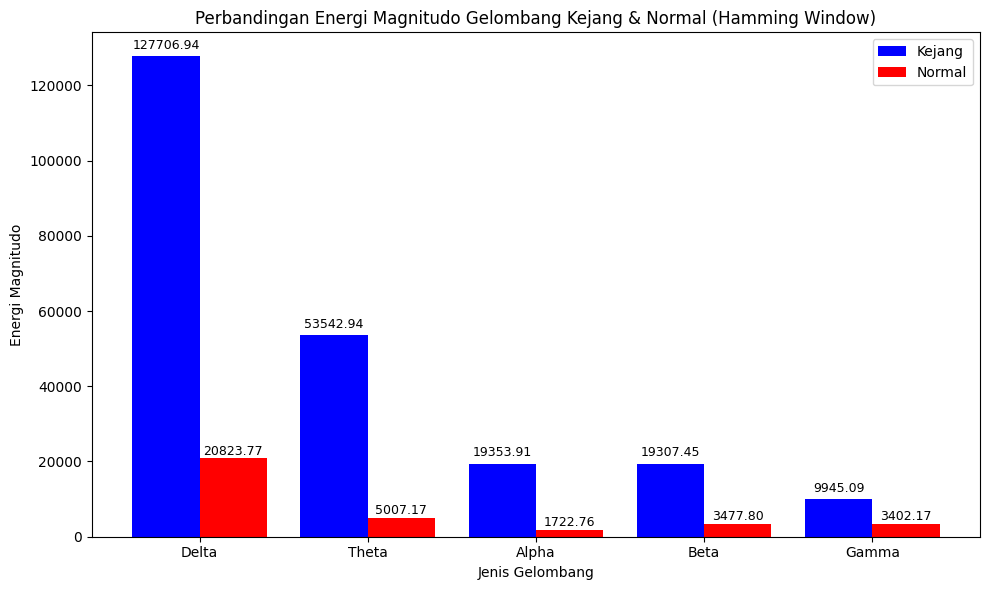

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_energy(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.sum(amplitudes[mask]**2)  # Menghitung energi

# Menghitung energi untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_energies1 = {band: get_band_energy(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_energies2 = {band: get_band_energy(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, energy in band_energies1.items():
    print(f"Energi {band} (Kejang): {energy:.4f}")
for band, energy in band_energies2.items():
    print(f"Energi {band} (Normal): {energy:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Ambil nilai energi dalam list
energi_kejang = list(band_energies1.values())
energi_normal = list(band_energies2.values())

# Plot bar
bars1 = plt.bar(index, energi_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, energi_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai energi di atas bar
for i, val in enumerate(energi_kejang):
    plt.text(i, val + max(energi_kejang)*0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(energi_normal):
    plt.text(i + bar_width, val + max(energi_normal)*0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan tampilan
plt.xlabel("Jenis Gelombang")
plt.ylabel("Energi Magnitudo")
plt.title("Perbandingan Energi Magnitudo Gelombang Kejang & Normal (Hamming Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()



Energi Delta (Kejang): 126919.2097
Energi Theta (Kejang): 53561.8418
Energi Alpha (Kejang): 19363.9815
Energi Beta (Kejang): 19318.8238
Energi Gamma (Kejang): 9948.4319
Energi Delta (Normal): 20537.7824
Energi Theta (Normal): 5001.3288
Energi Alpha (Normal): 1721.9418
Energi Beta (Normal): 3478.2596
Energi Gamma (Normal): 3403.1070


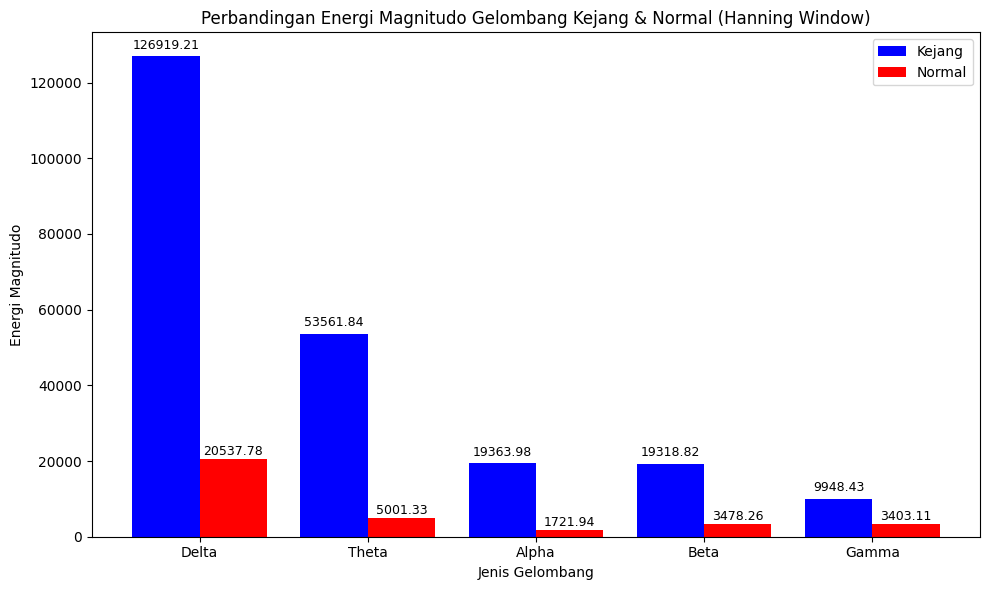

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_energy(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.sum(amplitudes[mask]**2)  # Menghitung energi

# Menghitung energi untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_energies1 = {band: get_band_energy(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_energies2 = {band: get_band_energy(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, energy in band_energies1.items():
    print(f"Energi {band} (Kejang): {energy:.4f}")
for band, energy in band_energies2.items():
    print(f"Energi {band} (Normal): {energy:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Ambil nilai energi dalam list
energi_kejang = list(band_energies1.values())
energi_normal = list(band_energies2.values())

# Plot bar
bars1 = plt.bar(index, energi_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, energi_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai energi di atas bar
for i, val in enumerate(energi_kejang):
    plt.text(i, val + max(energi_kejang)*0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(energi_normal):
    plt.text(i + bar_width, val + max(energi_normal)*0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan tampilan
plt.xlabel("Jenis Gelombang")
plt.ylabel("Energi Magnitudo")
plt.title("Perbandingan Energi Magnitudo Gelombang Kejang & Normal (Hanning Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()



Energi Delta (Kejang): 128202.3152
Energi Theta (Kejang): 53399.0732
Energi Alpha (Kejang): 19316.5575
Energi Beta (Kejang): 19285.0756
Energi Gamma (Kejang): 9940.8959
Energi Delta (Normal): 21836.1093
Energi Theta (Normal): 5146.2870
Energi Alpha (Normal): 1756.0528
Energi Beta (Normal): 3481.2260
Energi Gamma (Normal): 3385.6164


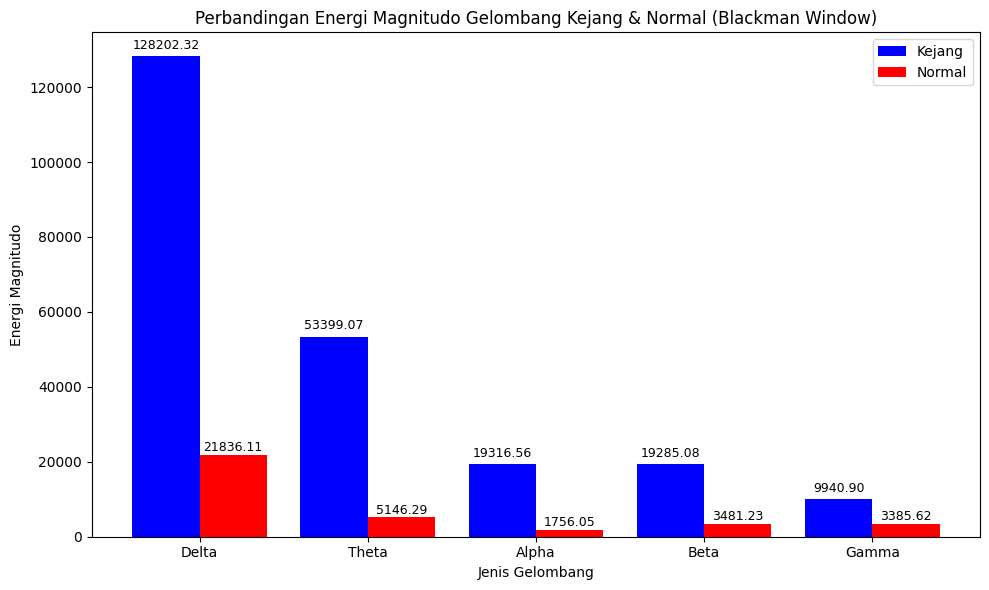

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_energy(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.sum(amplitudes[mask]**2)  # Menghitung energi

# Menghitung energi untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_energies1 = {band: get_band_energy(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_energies2 = {band: get_band_energy(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, energy in band_energies1.items():
    print(f"Energi {band} (Kejang): {energy:.4f}")
for band, energy in band_energies2.items():
    print(f"Energi {band} (Normal): {energy:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Ambil nilai energi dalam list
energi_kejang = list(band_energies1.values())
energi_normal = list(band_energies2.values())

# Plot bar
bars1 = plt.bar(index, energi_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, energi_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai energi di atas bar
for i, val in enumerate(energi_kejang):
    plt.text(i, val + max(energi_kejang)*0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(energi_normal):
    plt.text(i + bar_width, val + max(energi_normal)*0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan tampilan
plt.xlabel("Jenis Gelombang")
plt.ylabel("Energi Magnitudo")
plt.title("Perbandingan Energi Magnitudo Gelombang Kejang & Normal (Blackman Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()



# stdv gelombang kejang dan tidak kejang

Standar Deviasi Delta (Kejang): 1.3717
Standar Deviasi Theta (Kejang): 0.8101
Standar Deviasi Alpha (Kejang): 0.4370
Standar Deviasi Beta (Kejang): 0.2314
Standar Deviasi Gamma (Kejang): 0.1562
Standar Deviasi Delta (Normal): 0.4575
Standar Deviasi Theta (Normal): 0.1976
Standar Deviasi Alpha (Normal): 0.1001
Standar Deviasi Beta (Normal): 0.0840
Standar Deviasi Gamma (Normal): 0.0872


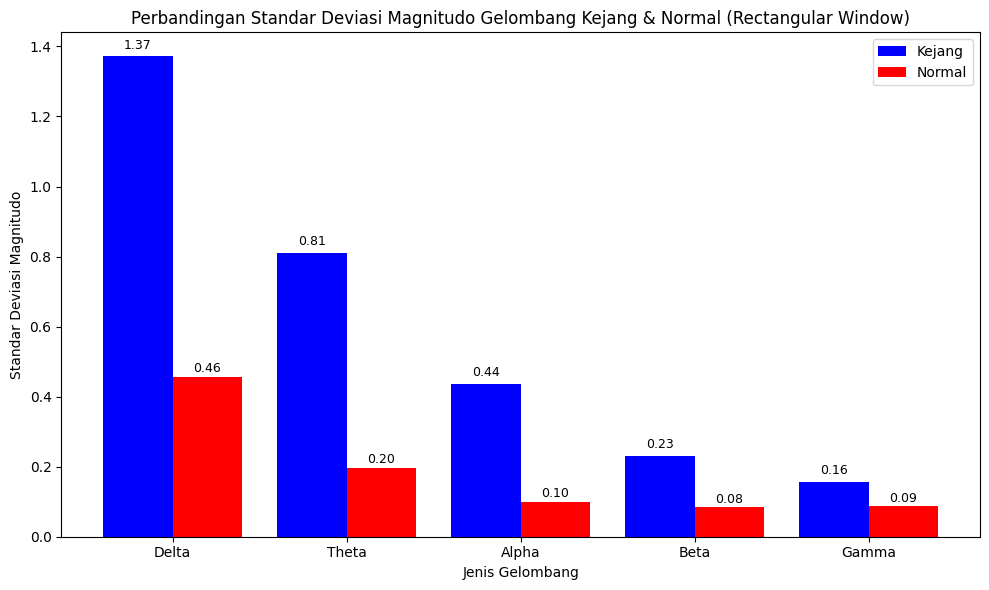

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1 (Kejang)
file_path1 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2 (Normal)
file_path2 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Kolom frekuensi
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Rentang frekuensi tiap band
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

# Fungsi untuk menghitung standar deviasi amplitudo dalam band
def get_band_std(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.std(amplitudes[mask]) if np.any(mask) else 0

# Gabungkan amplitudo semua channel
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

# Hitung standar deviasi untuk masing-masing band
band_std1 = {band: get_band_std(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_std2 = {band: get_band_std(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, std_val in band_std1.items():
    print(f"Standar Deviasi {band} (Kejang): {std_val:.4f}")
for band, std_val in band_std2.items():
    print(f"Standar Deviasi {band} (Normal): {std_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Ambil nilai energi dalam list
std_kejang = list(band_std1.values())
std_normal = list(band_std2.values())

# Plot bar
bars1 = plt.bar(index, std_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, std_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai energi di atas bar
for i, val in enumerate(std_kejang):
    plt.text(i, val + max(std_kejang)*0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(std_normal):
    plt.text(i + bar_width, val + max(std_normal)*0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan tampilan
plt.xlabel("Jenis Gelombang")
plt.ylabel("Standar Deviasi Magnitudo")
plt.title("Perbandingan Standar Deviasi Magnitudo Gelombang Kejang & Normal (Rectangular Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()



Standar Deviasi Delta (Kejang): 1.3545
Standar Deviasi Theta (Kejang): 0.8000
Standar Deviasi Alpha (Kejang): 0.4326
Standar Deviasi Beta (Kejang): 0.2295
Standar Deviasi Gamma (Kejang): 0.1549
Standar Deviasi Delta (Normal): 0.4625
Standar Deviasi Theta (Normal): 0.1955
Standar Deviasi Alpha (Normal): 0.0997
Standar Deviasi Beta (Normal): 0.0835
Standar Deviasi Gamma (Normal): 0.0863


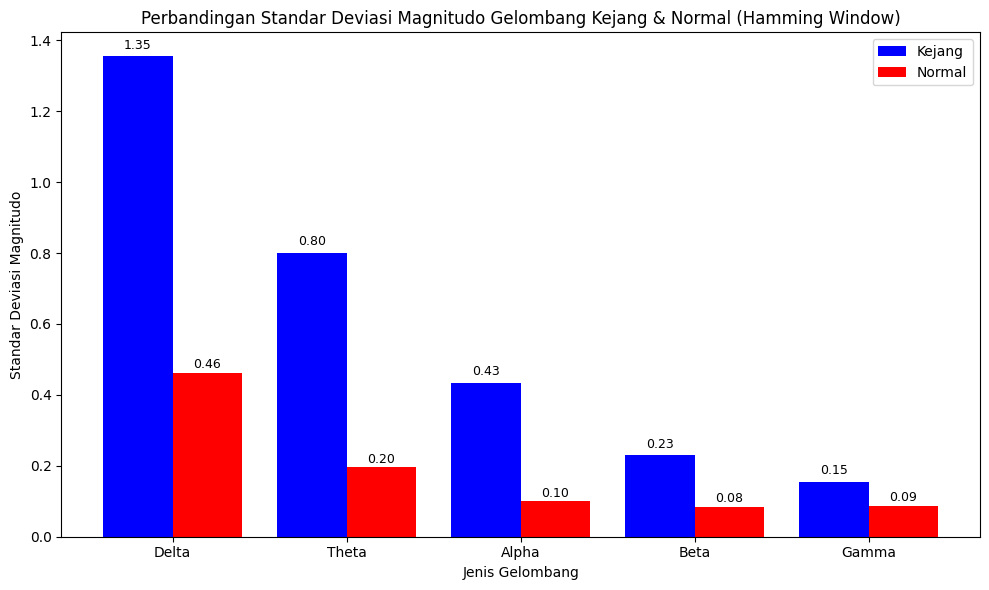

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1 (Kejang)
file_path1 = "/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2 (Normal)
file_path2 = "/content/drive/MyDrive/TA/HAMMING BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Kolom frekuensi
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Rentang frekuensi tiap band
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

# Fungsi untuk menghitung standar deviasi amplitudo dalam band
def get_band_std(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.std(amplitudes[mask]) if np.any(mask) else 0

# Gabungkan amplitudo semua channel
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

# Hitung standar deviasi untuk masing-masing band
band_std1 = {band: get_band_std(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_std2 = {band: get_band_std(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, std_val in band_std1.items():
    print(f"Standar Deviasi {band} (Kejang): {std_val:.4f}")
for band, std_val in band_std2.items():
    print(f"Standar Deviasi {band} (Normal): {std_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Ambil nilai energi dalam list
std_kejang = list(band_std1.values())
std_normal = list(band_std2.values())

# Plot bar
bars1 = plt.bar(index, std_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, std_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai energi di atas bar
for i, val in enumerate(std_kejang):
    plt.text(i, val + max(std_kejang)*0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(std_normal):
    plt.text(i + bar_width, val + max(std_normal)*0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan tampilan
plt.xlabel("Jenis Gelombang")
plt.ylabel("Standar Deviasi Magnitudo")
plt.title("Perbandingan Standar Deviasi Magnitudo Gelombang Kejang & Normal (Hamming Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()



Standar Deviasi Delta (Kejang): 1.3509
Standar Deviasi Theta (Kejang): 0.8001
Standar Deviasi Alpha (Kejang): 0.4327
Standar Deviasi Beta (Kejang): 0.2295
Standar Deviasi Gamma (Kejang): 0.1549
Standar Deviasi Delta (Normal): 0.4587
Standar Deviasi Theta (Normal): 0.1953
Standar Deviasi Alpha (Normal): 0.0998
Standar Deviasi Beta (Normal): 0.0835
Standar Deviasi Gamma (Normal): 0.0863


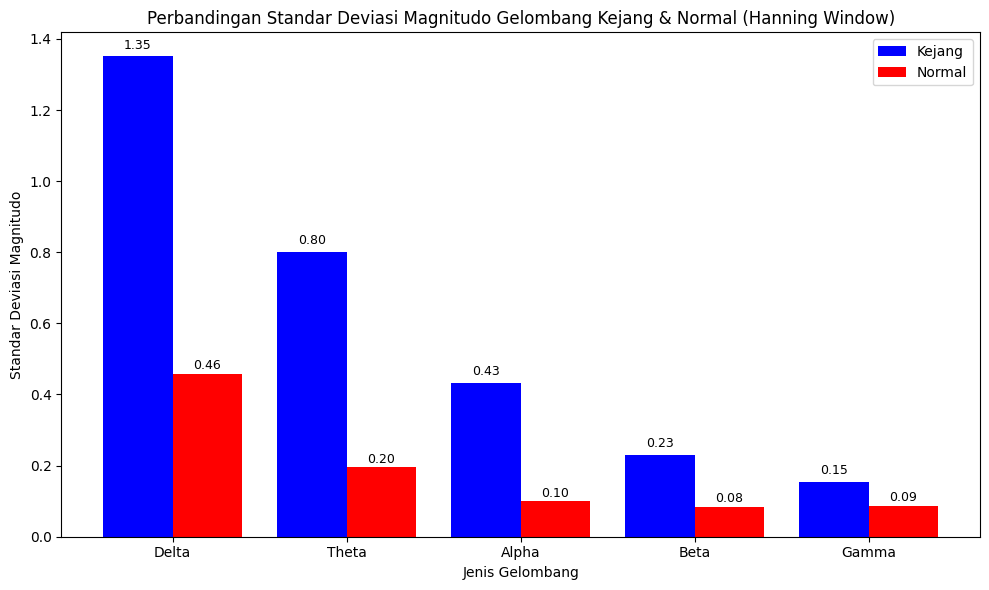

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1 (Kejang)
file_path1 = "/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2 (Normal)
file_path2 = "/content/drive/MyDrive/TA/HANNING BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Kolom frekuensi
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Rentang frekuensi tiap band
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

# Fungsi untuk menghitung standar deviasi amplitudo dalam band
def get_band_std(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.std(amplitudes[mask]) if np.any(mask) else 0

# Gabungkan amplitudo semua channel
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

# Hitung standar deviasi untuk masing-masing band
band_std1 = {band: get_band_std(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_std2 = {band: get_band_std(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, std_val in band_std1.items():
    print(f"Standar Deviasi {band} (Kejang): {std_val:.4f}")
for band, std_val in band_std2.items():
    print(f"Standar Deviasi {band} (Normal): {std_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Ambil nilai energi dalam list
std_kejang = list(band_std1.values())
std_normal = list(band_std2.values())

# Plot bar
bars1 = plt.bar(index, std_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, std_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai energi di atas bar
for i, val in enumerate(std_kejang):
    plt.text(i, val + max(std_kejang)*0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(std_normal):
    plt.text(i + bar_width, val + max(std_normal)*0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan tampilan
plt.xlabel("Jenis Gelombang")
plt.ylabel("Standar Deviasi Magnitudo")
plt.title("Perbandingan Standar Deviasi Magnitudo Gelombang Kejang & Normal (Hanning Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()



Standar Deviasi Delta (Kejang): 1.3574
Standar Deviasi Theta (Kejang): 0.7997
Standar Deviasi Alpha (Kejang): 0.4324
Standar Deviasi Beta (Kejang): 0.2294
Standar Deviasi Gamma (Kejang): 0.1549
Standar Deviasi Delta (Normal): 0.4730
Standar Deviasi Theta (Normal): 0.1973
Standar Deviasi Alpha (Normal): 0.1003
Standar Deviasi Beta (Normal): 0.0833
Standar Deviasi Gamma (Normal): 0.0859


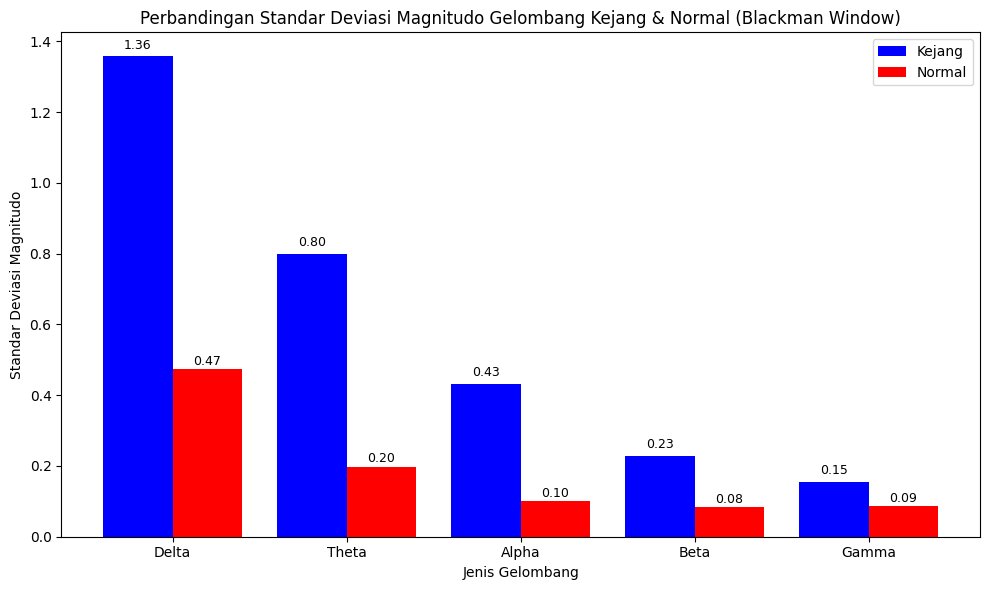

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1 (Kejang)
file_path1 = "/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2 (Normal)
file_path2 = "/content/drive/MyDrive/TA/BLACKMAN BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Kolom frekuensi
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Rentang frekuensi tiap band
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

# Fungsi untuk menghitung standar deviasi amplitudo dalam band
def get_band_std(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.std(amplitudes[mask]) if np.any(mask) else 0

# Gabungkan amplitudo semua channel
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

# Hitung standar deviasi untuk masing-masing band
band_std1 = {band: get_band_std(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_std2 = {band: get_band_std(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, std_val in band_std1.items():
    print(f"Standar Deviasi {band} (Kejang): {std_val:.4f}")
for band, std_val in band_std2.items():
    print(f"Standar Deviasi {band} (Normal): {std_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Ambil nilai energi dalam list
std_kejang = list(band_std1.values())
std_normal = list(band_std2.values())

# Plot bar
bars1 = plt.bar(index, std_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, std_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai energi di atas bar
for i, val in enumerate(std_kejang):
    plt.text(i, val + max(std_kejang)*0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(std_normal):
    plt.text(i + bar_width, val + max(std_normal)*0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan tampilan
plt.xlabel("Jenis Gelombang")
plt.ylabel("Standar Deviasi Magnitudo")
plt.title("Perbandingan Standar Deviasi Magnitudo Gelombang Kejang & Normal (Blackman Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()

